In [1]:
import numpy as np
import pandas as pd
import sys
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/hakunahahannah/Documents/Projects/Spiking3.0/Analysis/SpikeAnalysisToolbox/")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.firing_rates as firing
import spikeAnalysisToolsV2.helper as helper
import spikeAnalysisToolsV2.overviews as overview
import spikeAnalysisToolsV2.plotting as spikeplot


In [2]:
#copies over stimuli filelist into experiment folder as testing_list.txt
os.popen('cp /Users/hakunahahannah/Documents/Projects/Spiking3.0/Data/MatlabGaborFilter/obj150face150test/FileList_test.txt /Users/hakunahahannah/Documents/Projects/Spiking/Build/output/obj150face450_fantest_230_epochs/testing_list.txt')

In [3]:
masterpath = "/Users/hakunahahannah/Documents/Projects/Spiking3.0/Build/output"
## set the subfolder to the Simulation you want to analyse 

subfolders = [
    #"12_27-18_57_all_no_trace"
    "obj150face450_fantest_230_epochs"
    #"01_06-17_49_long_test_no_trace"
            ]
## if more than the inital epoch is needed *1 needs to be run
extensions = ["initial"]
#extensions = ["testing/epoch100"]


object_list = data.load_testing_stimuli_info(masterpath+"/" + subfolders[0]) #assuming all the subfolders have the same
stimuli_names = data.load_testing_stimuli_names(masterpath+"/" + subfolders[0])
n_stimuli = np.sum(obj['count'] for obj in object_list)
object_indices = [obj['indices'] for obj in object_list]

# info_neurons is just an array of the information from above. This makes it easier to run the functions and pass the information. 
# info_times same for times
network_architecture = dict(
    num_exc_neurons_per_layer = 64*64,
    num_inh_neurons_per_layer = 32*32,
    num_layers = 4
)

info_times = dict(
    length_of_stimulus = 2.0,
    num_stimuli = n_stimuli,
    time_start = 1.5,
    time_end = 1.9
)

print(object_list)
print(stimuli_names)

[{'count': 150, 'elements': {'download-120', 'download-163', 'download-41', 'download-75', 'download-34', 'download-132', 'download-23', 'download-143', 'download-33', 'download-48', 'download-100', 'download-92', 'download-147', 'download-20', 'download-13', 'download-108', 'download-167', 'download-168', 'download-102', 'download-35', 'download-116', 'download-44', 'download-9', 'download-51', 'download-125', 'download-135', 'download-107', 'download-91', 'download-152', 'download-121', 'download-155', 'download-146', 'download-101', 'download-2', 'download-98', 'download-113', 'download-122', 'download-166', 'download-117', 'download-36', 'download-46', 'download-68', 'download-134', 'download-148', 'download-49', 'download-133', 'download-67', 'download-97', 'download-63', 'download-31', 'download-149', 'download-19', 'download-126', 'download-25', 'download-157', 'download-88', 'download-161', 'download-140', 'download-145', 'download-65', 'download-58', 'download-76', 'download-1

In [5]:
spikes = data.load_spikes_from_subfolders(masterpath, subfolders, extensions, False)
print("loading done")

start = timer()
rates_subfolders = firing.calculate_rates_subfolder(
    spikes,
    network_architecture, 
    info_times)
print("Multiprocessing version took {}".format(timer() - start))

Start
loading done
Multiprocessing version took 18.505685977637768


initial


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


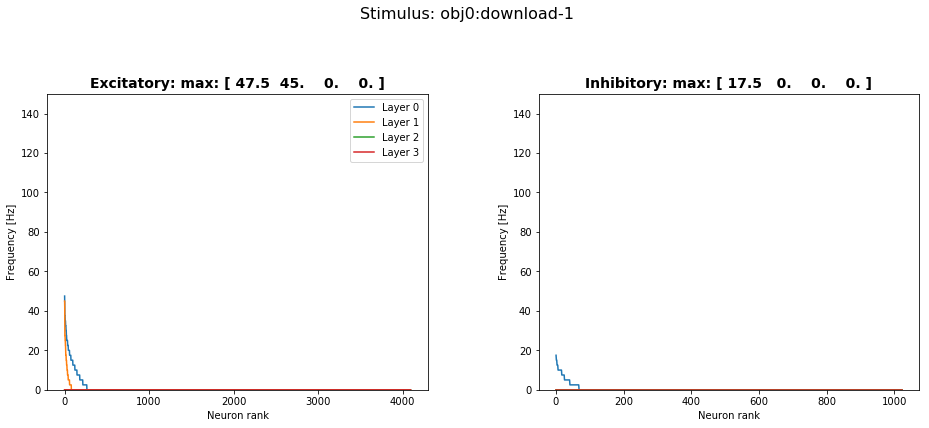

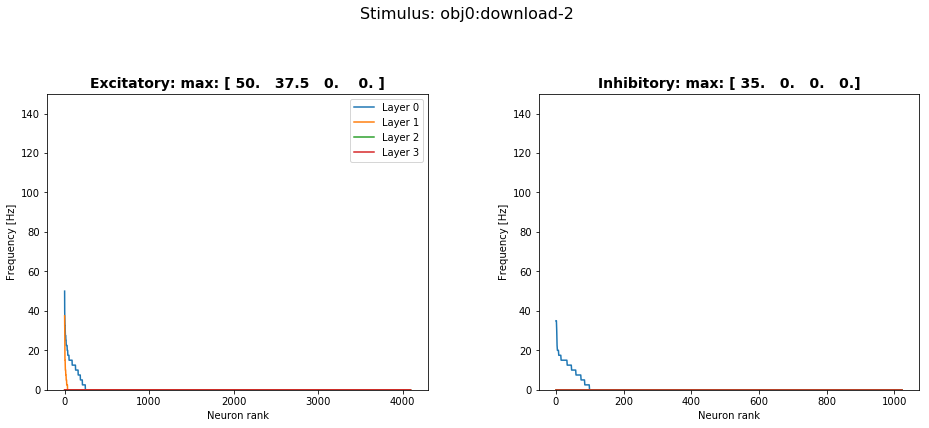

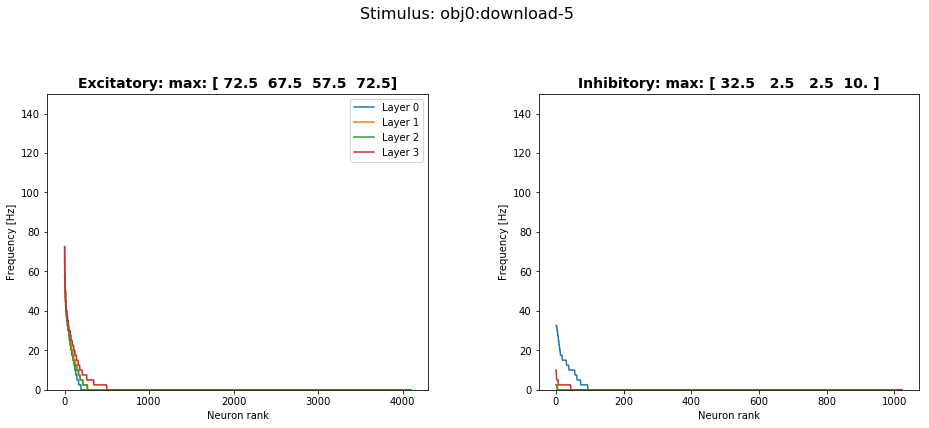

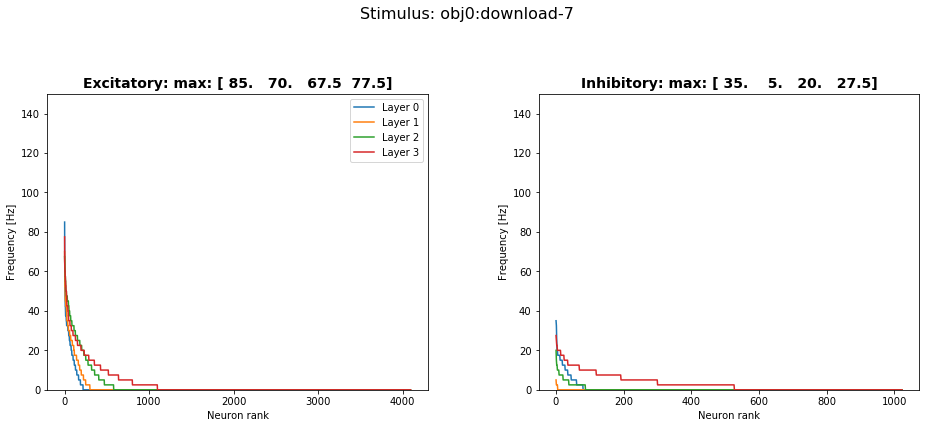

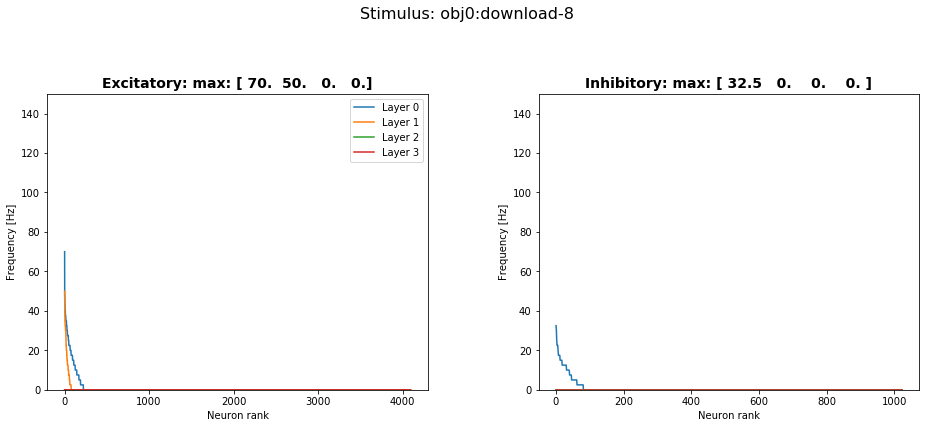

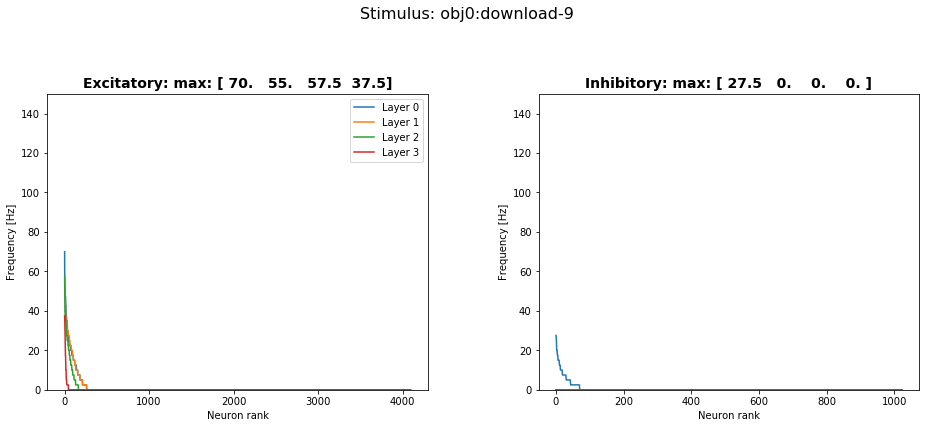

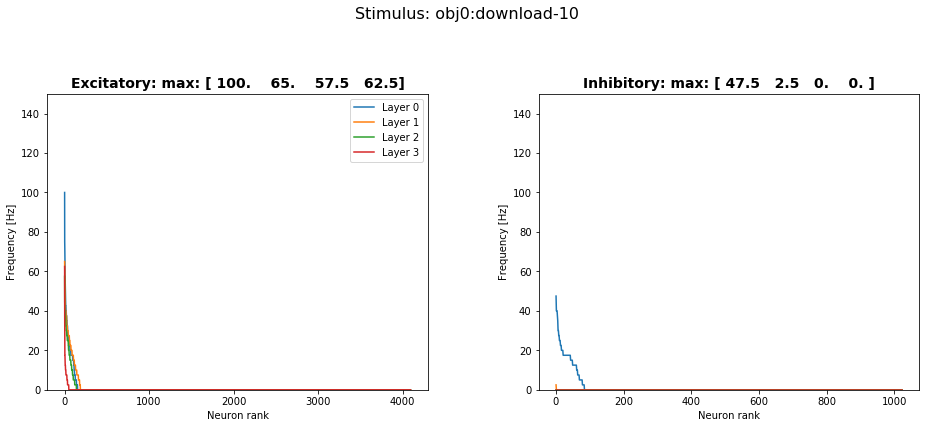

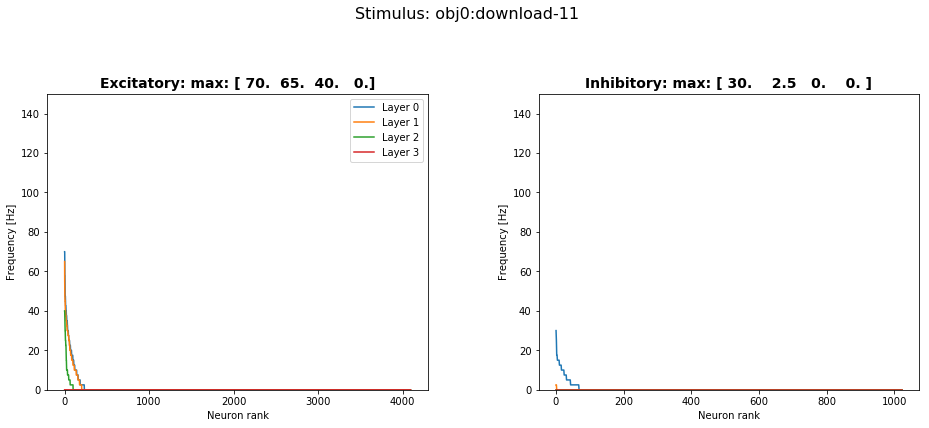

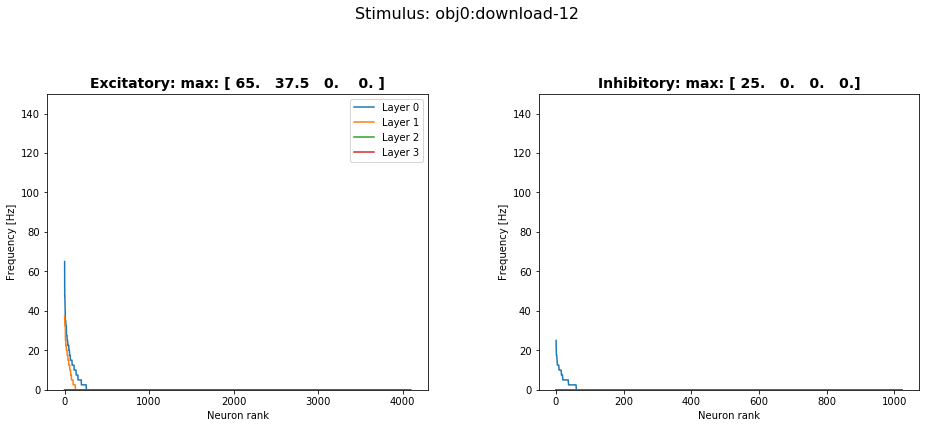

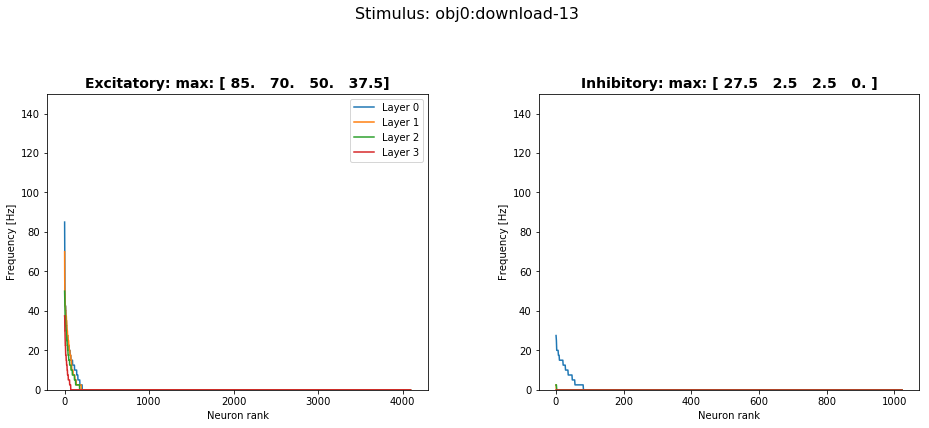

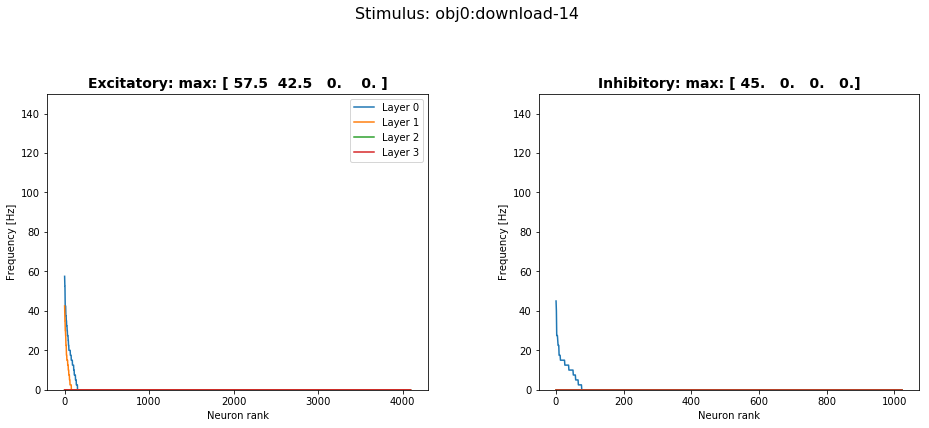

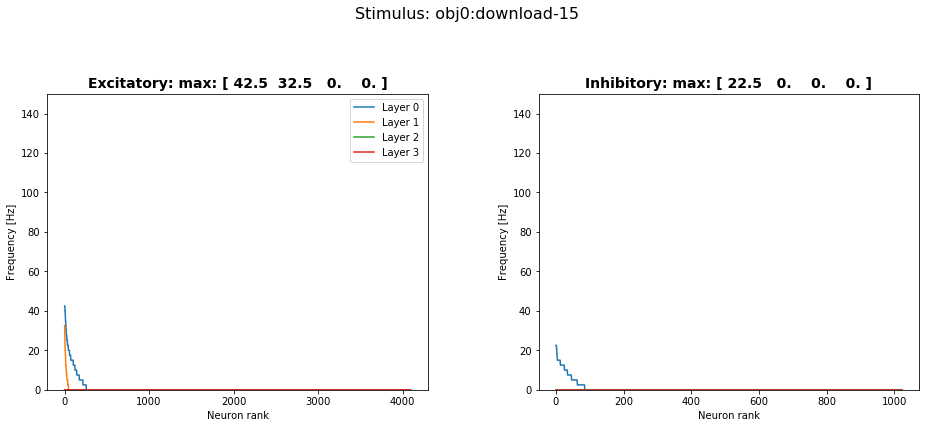

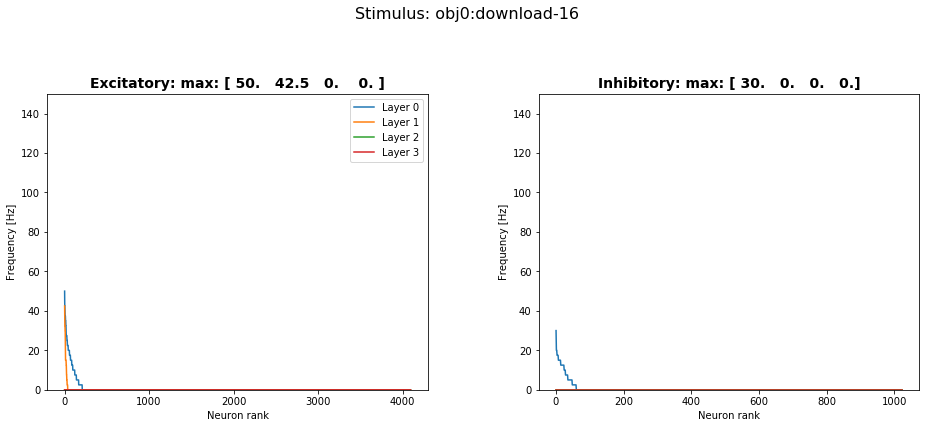

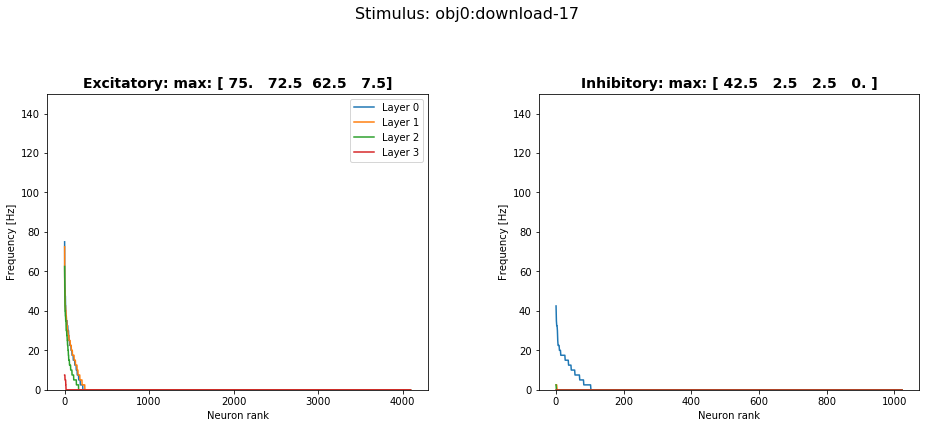

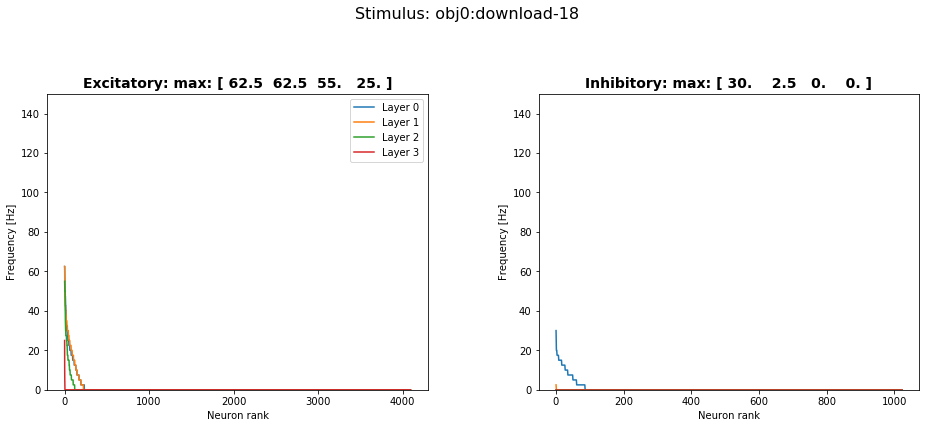

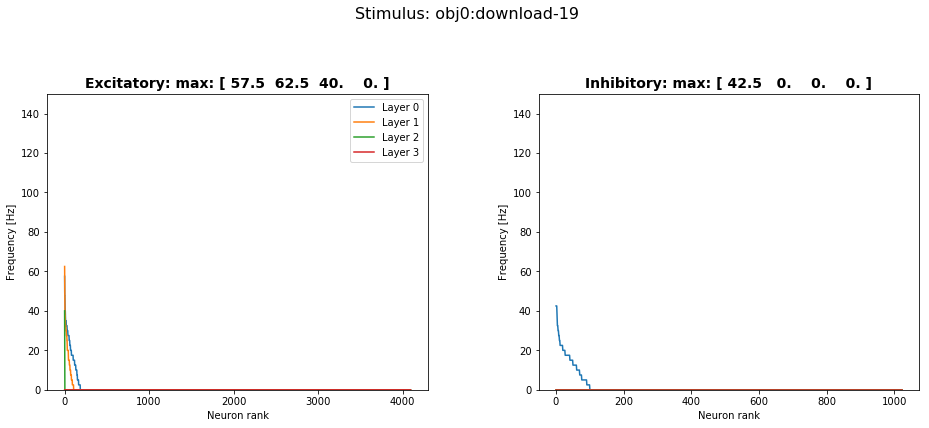

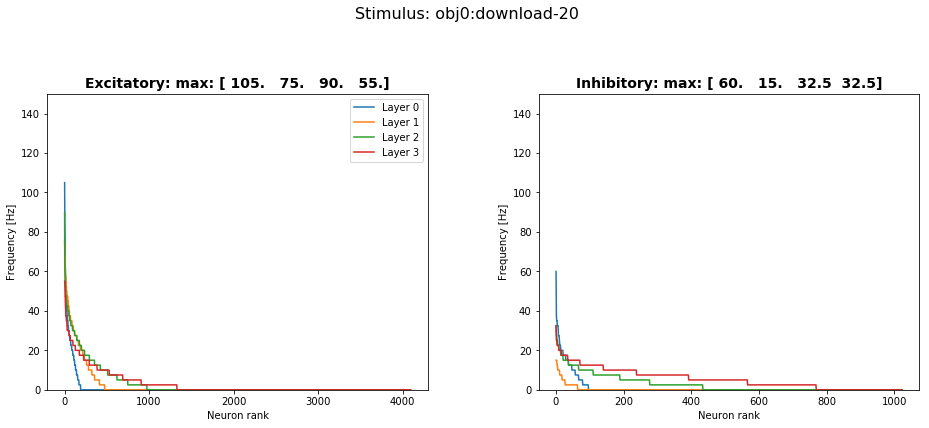

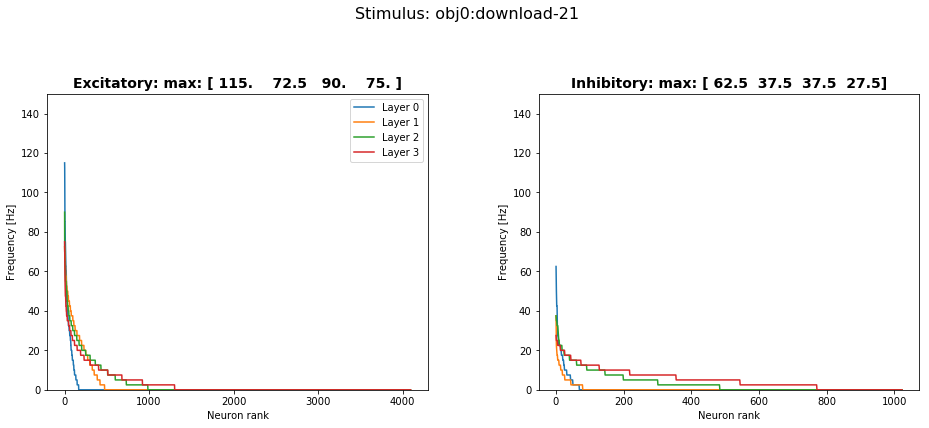

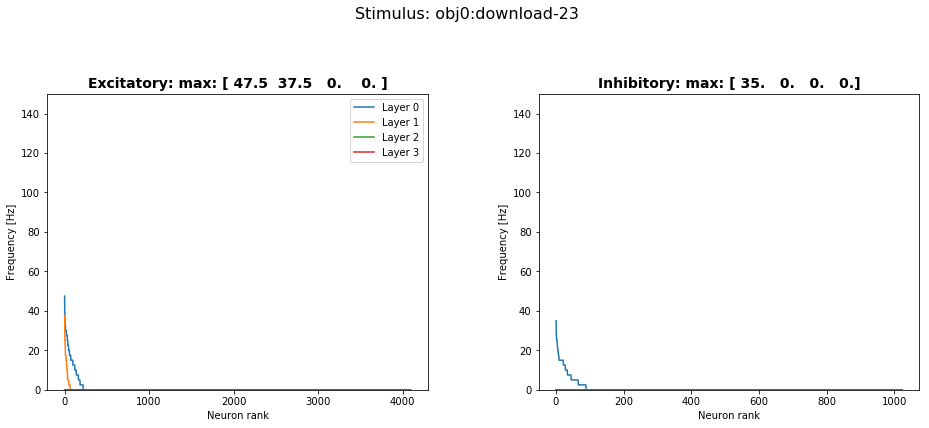

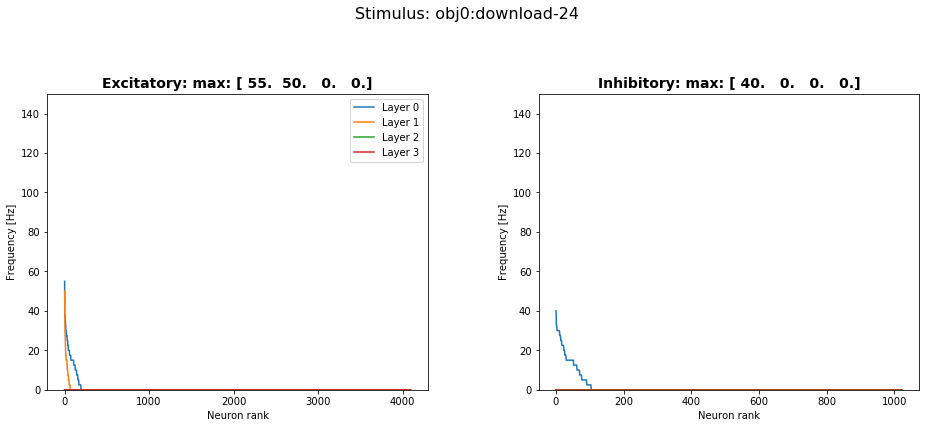

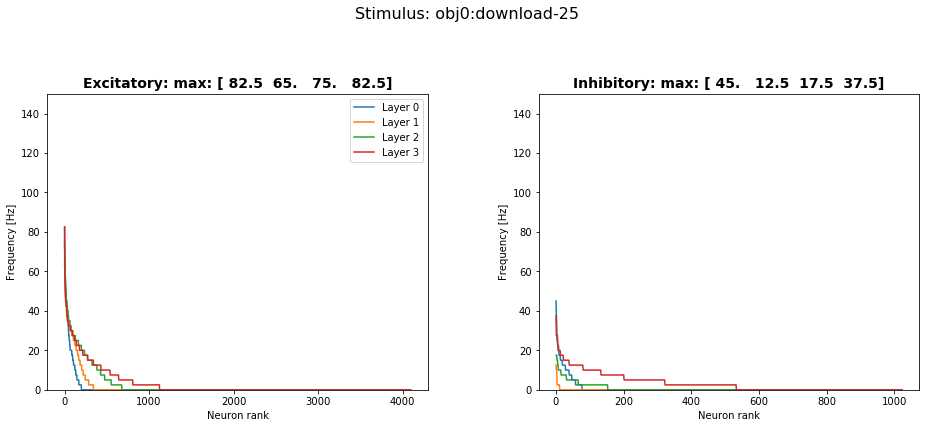

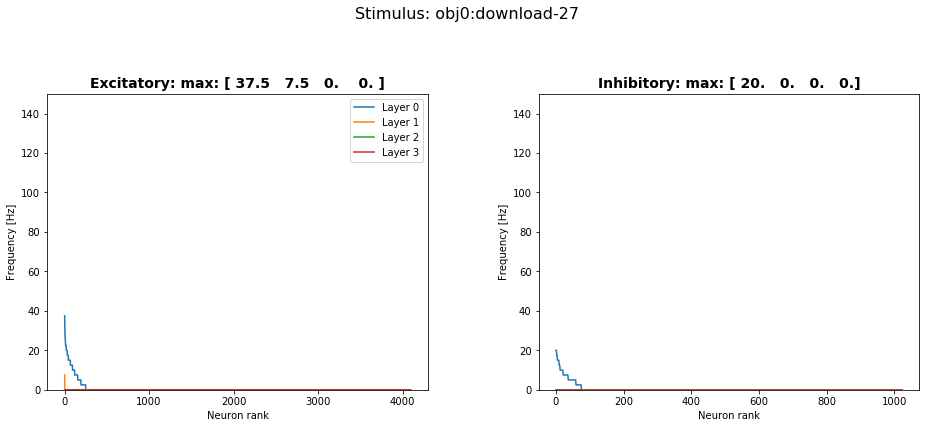

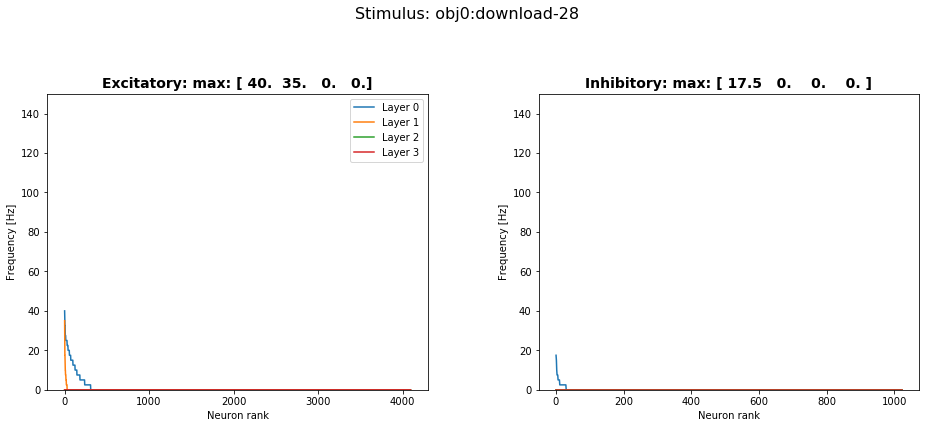

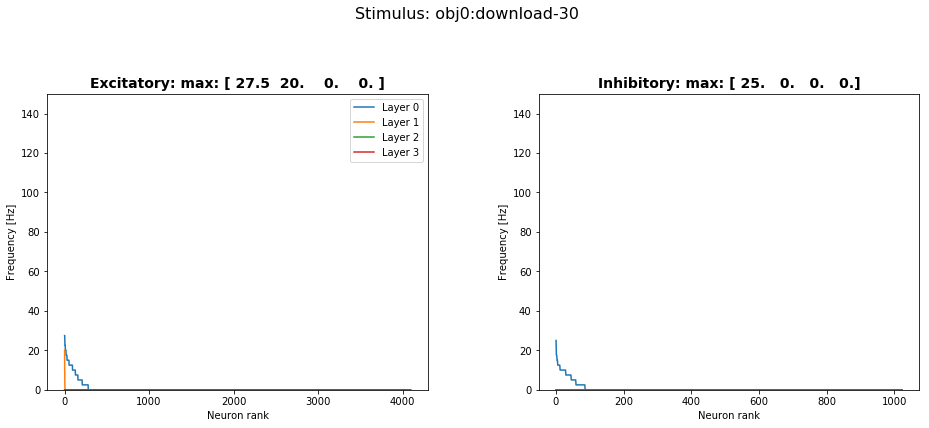

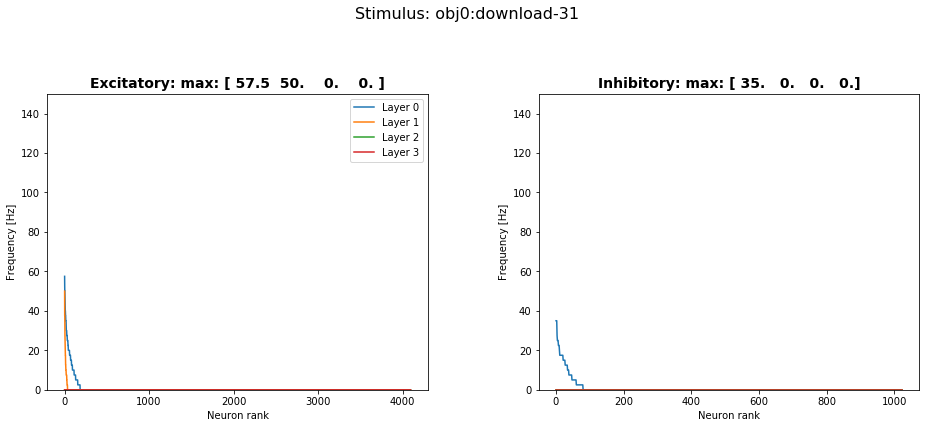

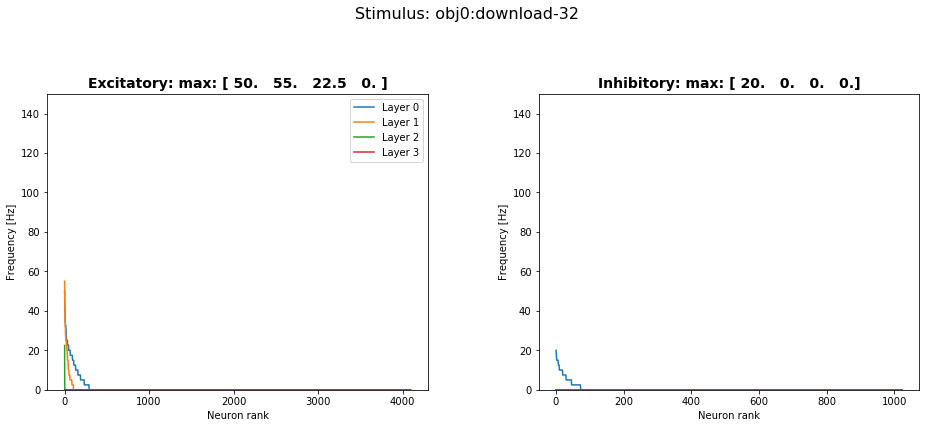

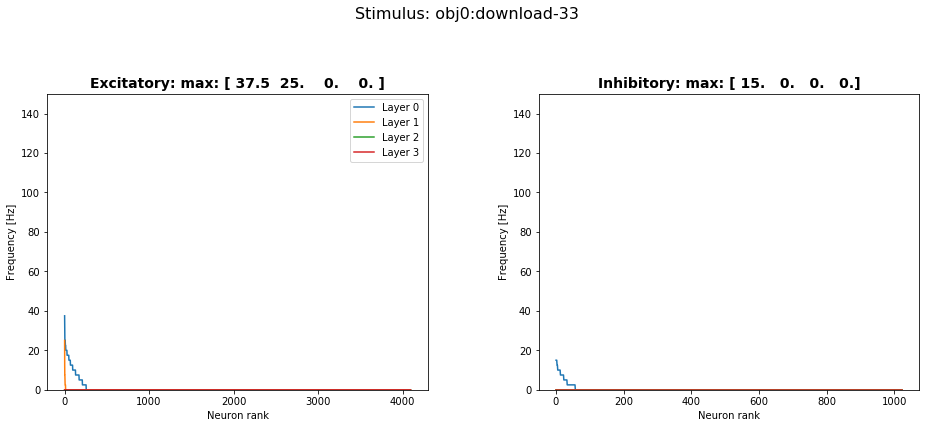

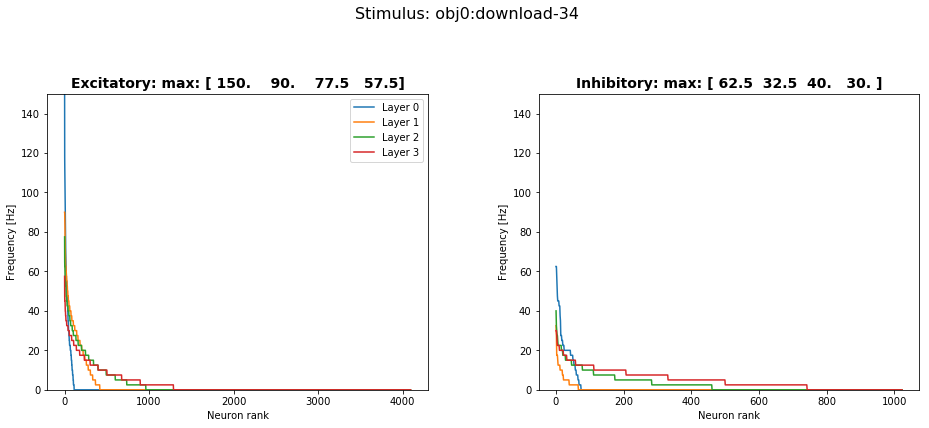

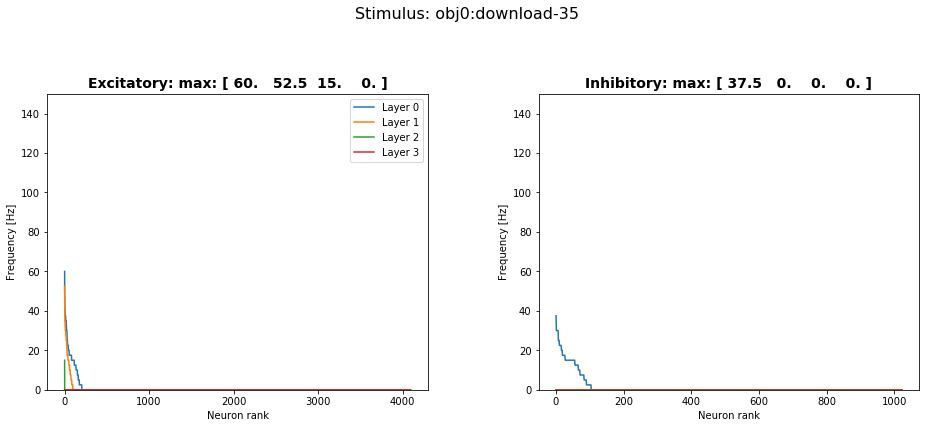

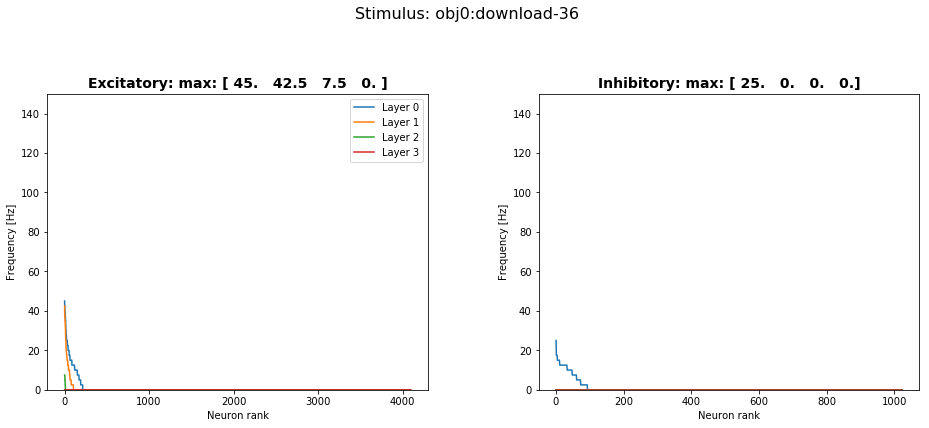

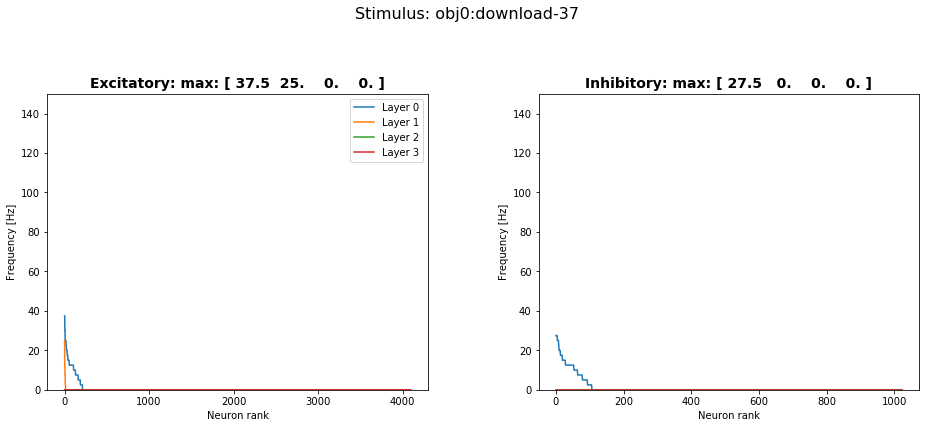

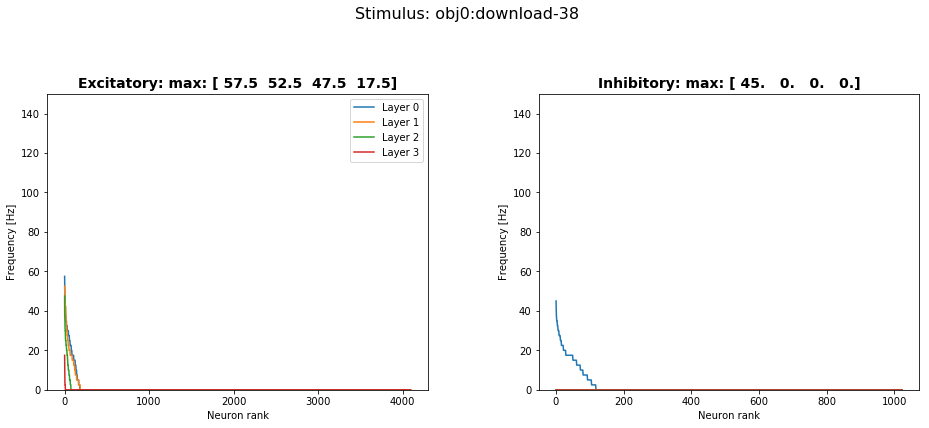

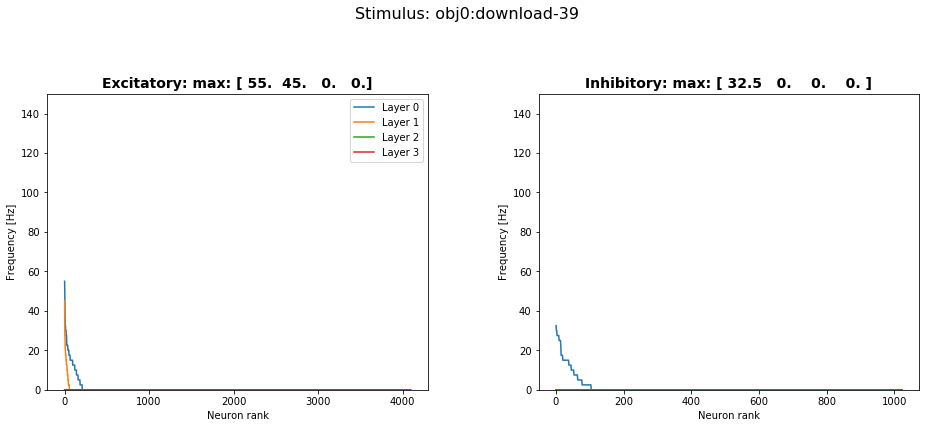

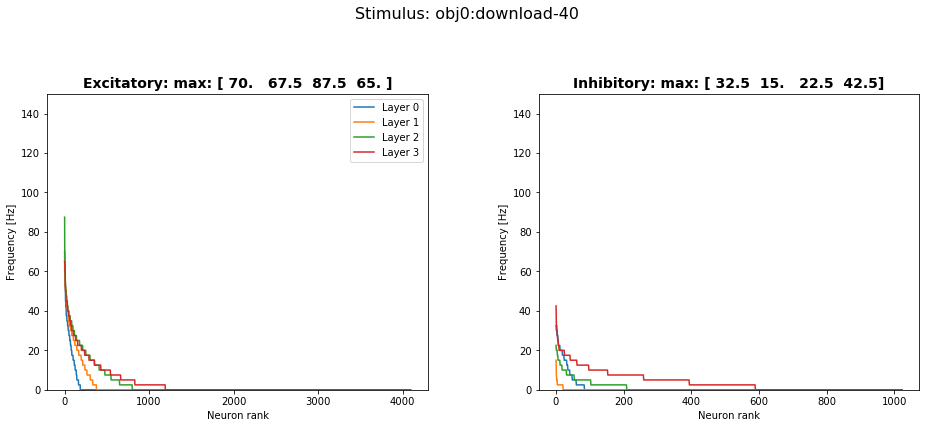

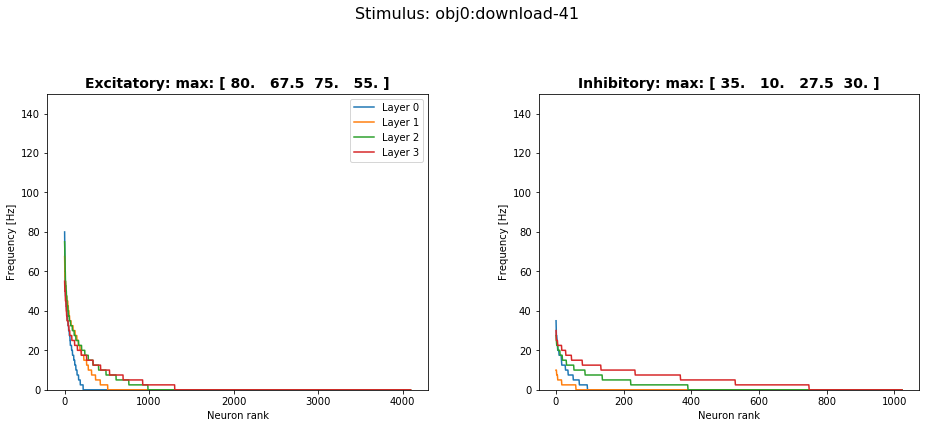

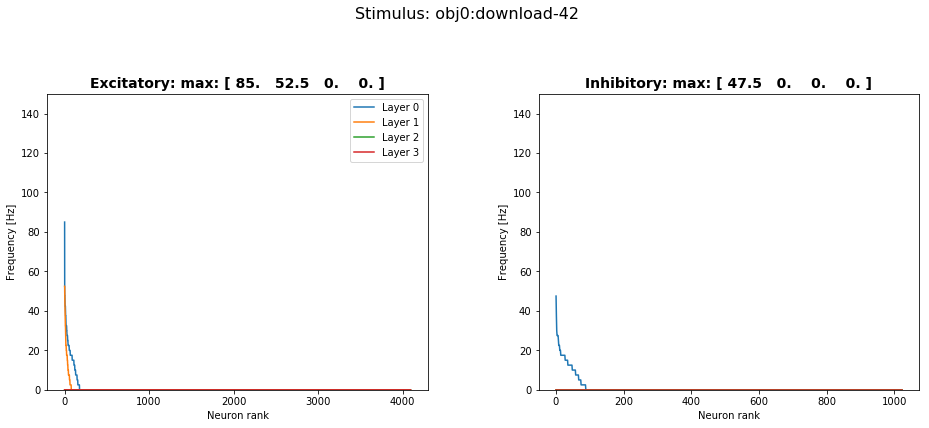

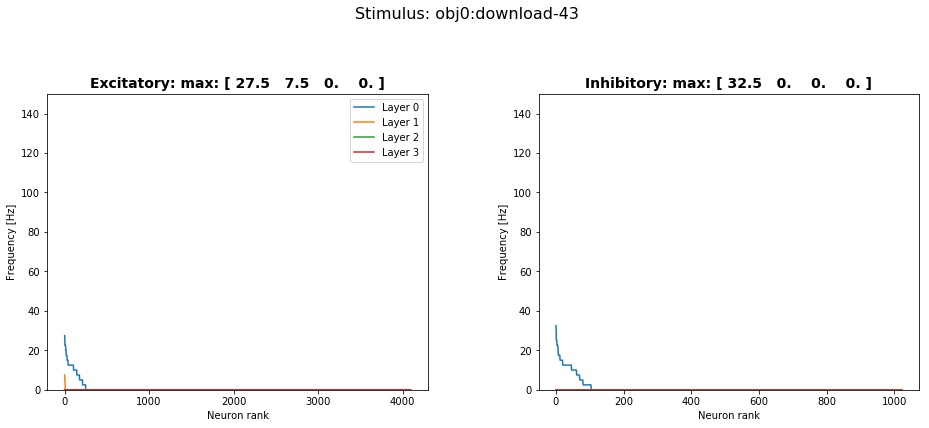

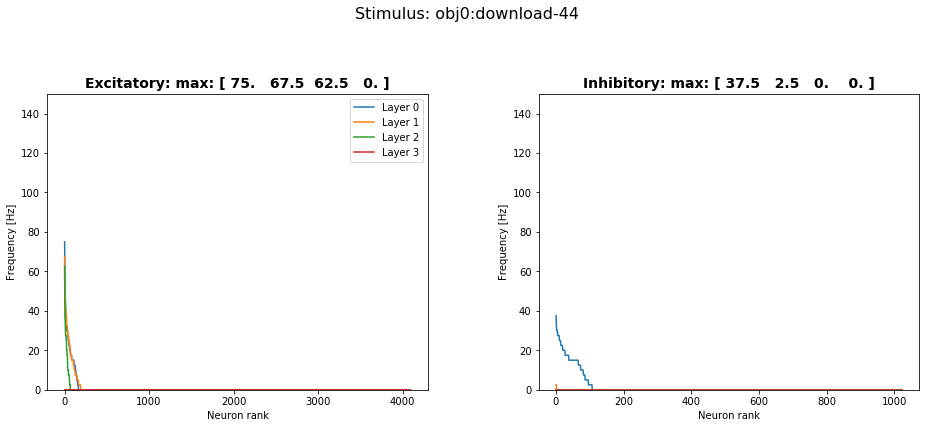

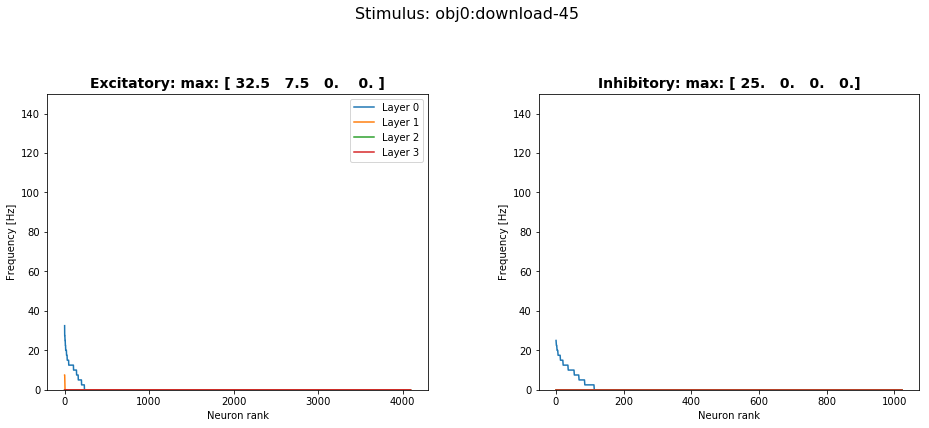

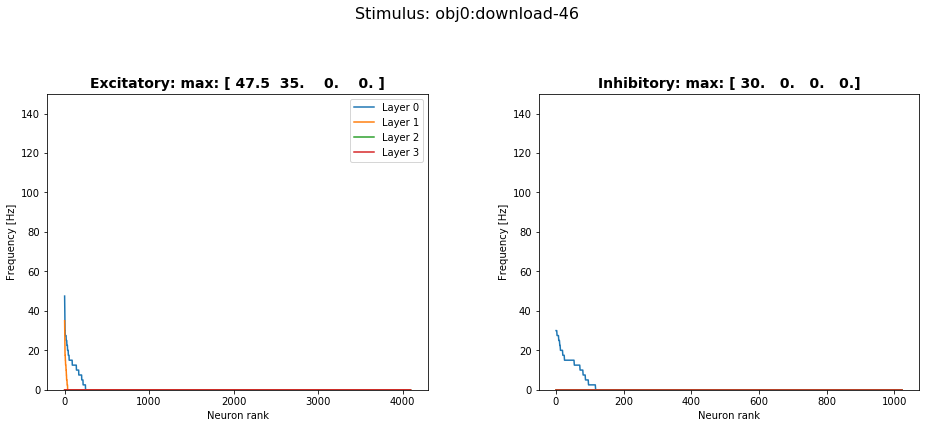

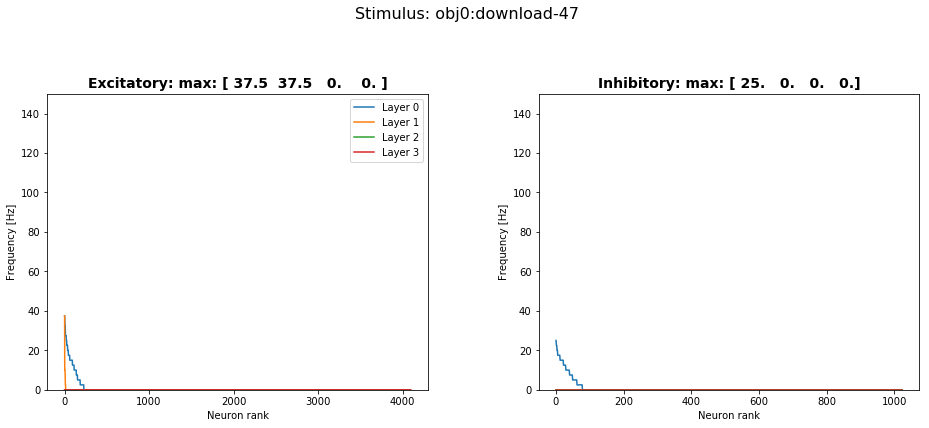

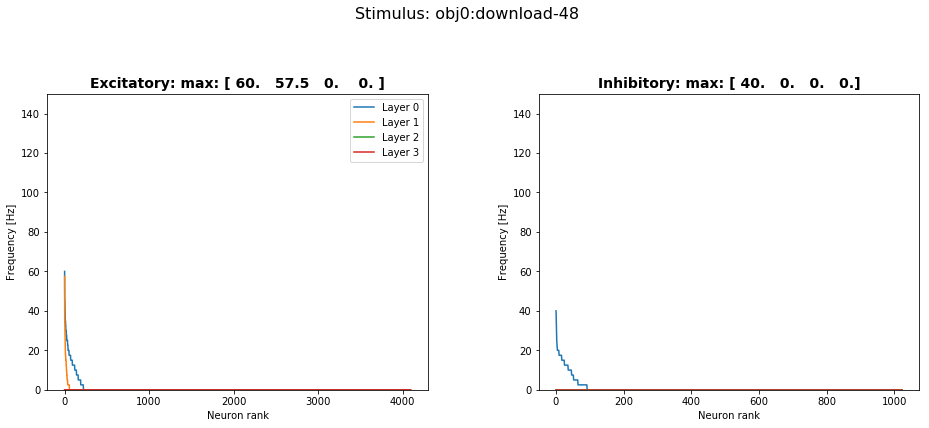

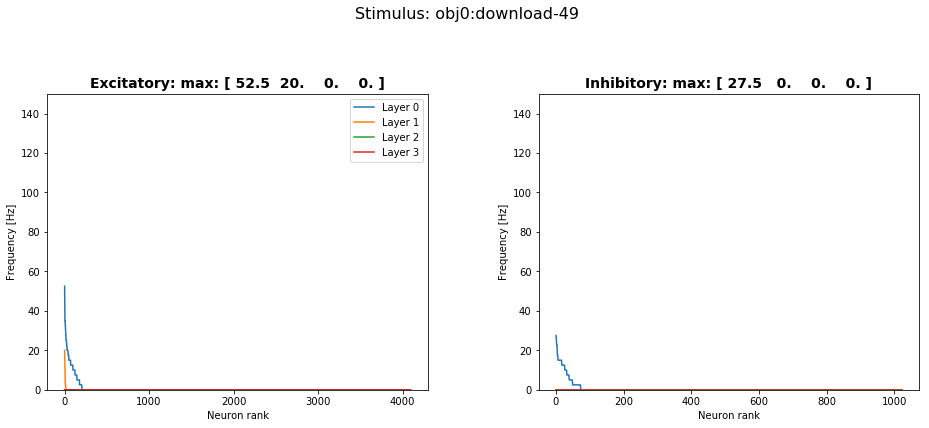

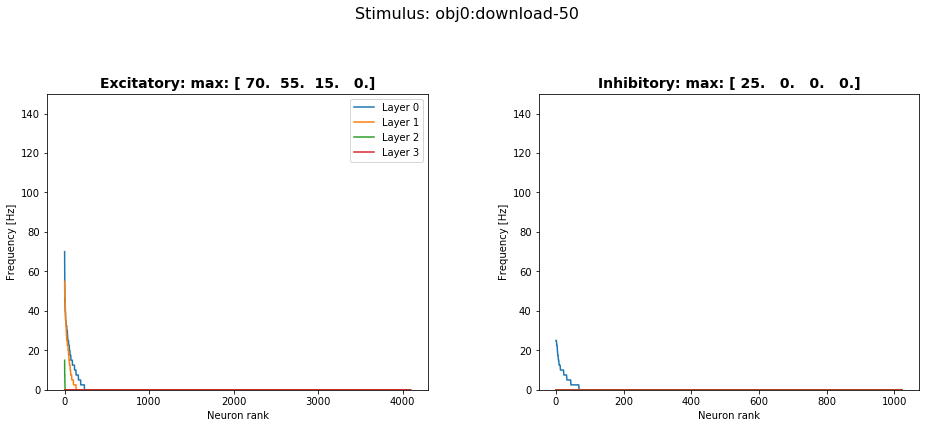

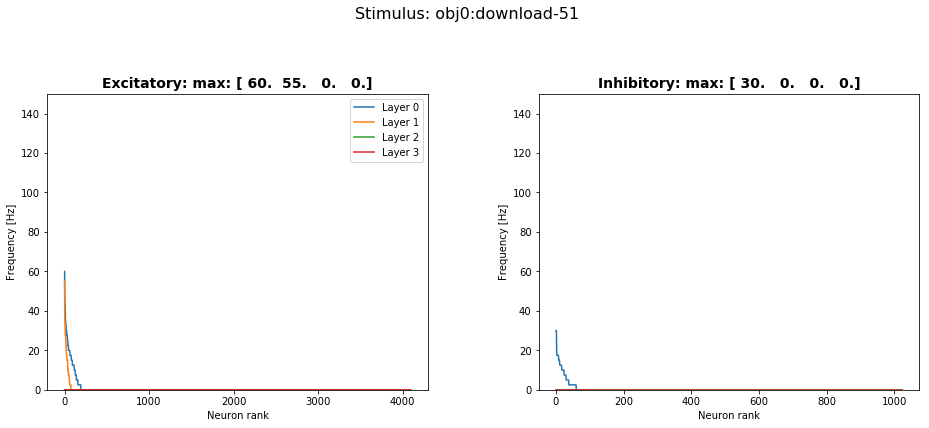

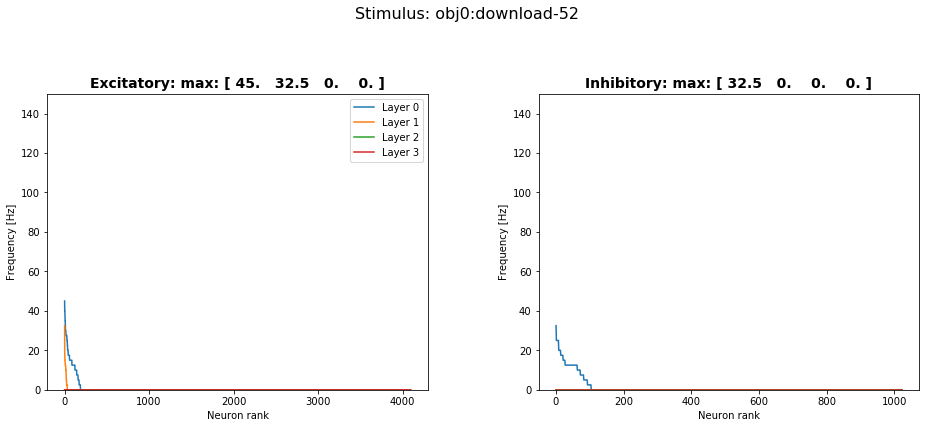

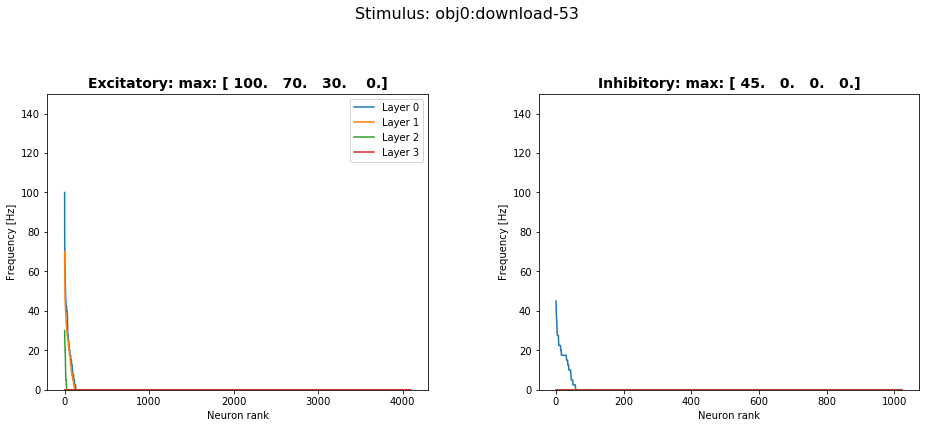

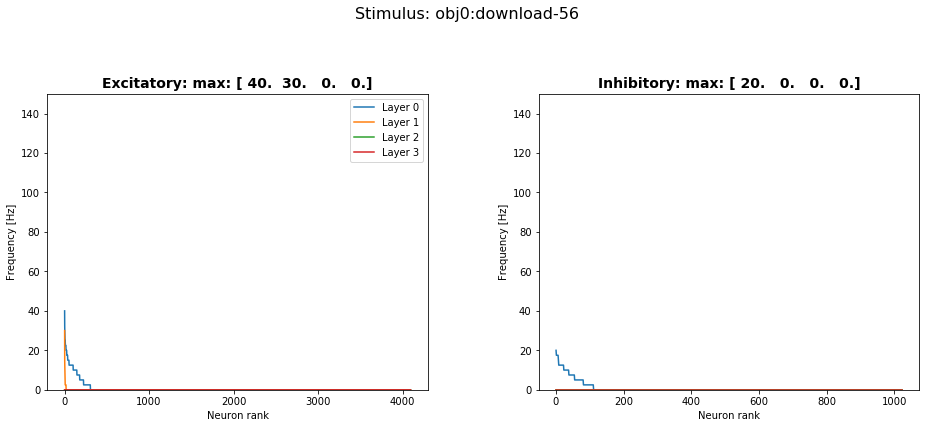

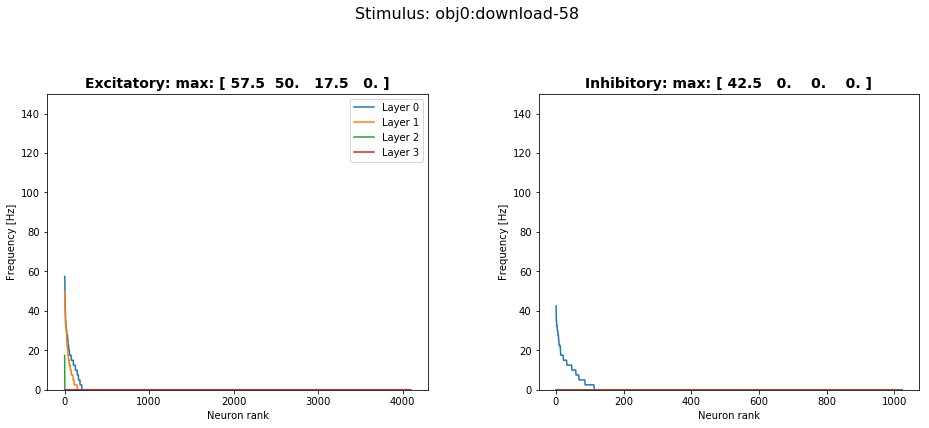

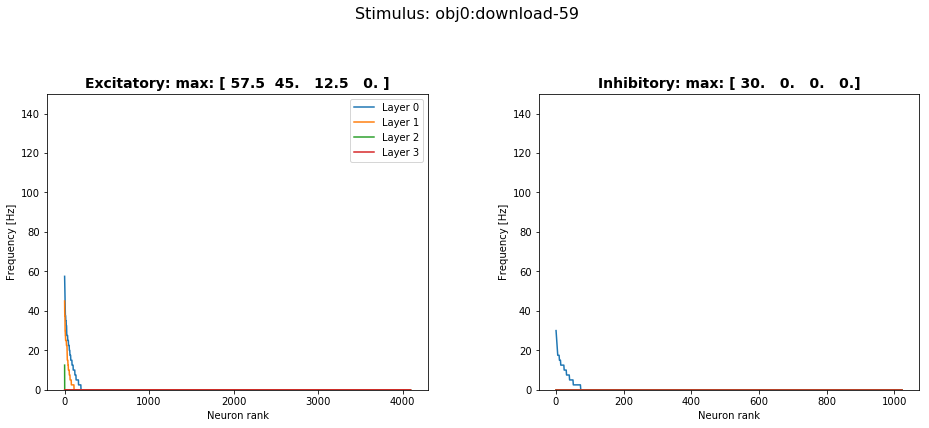

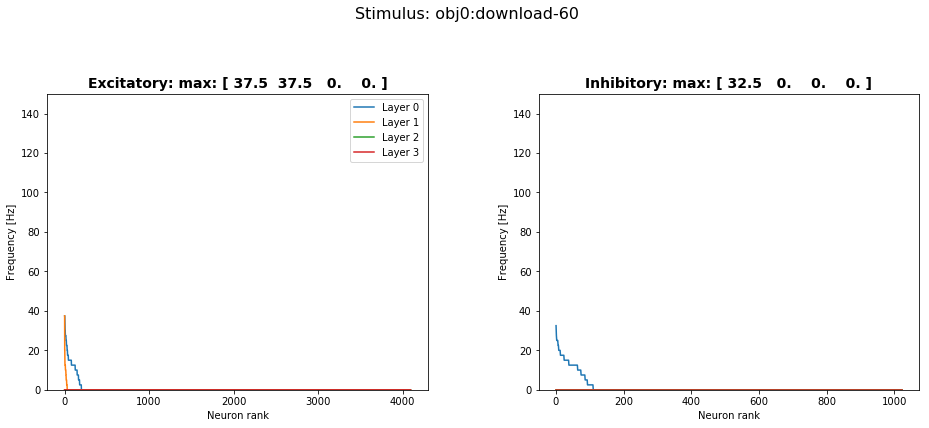

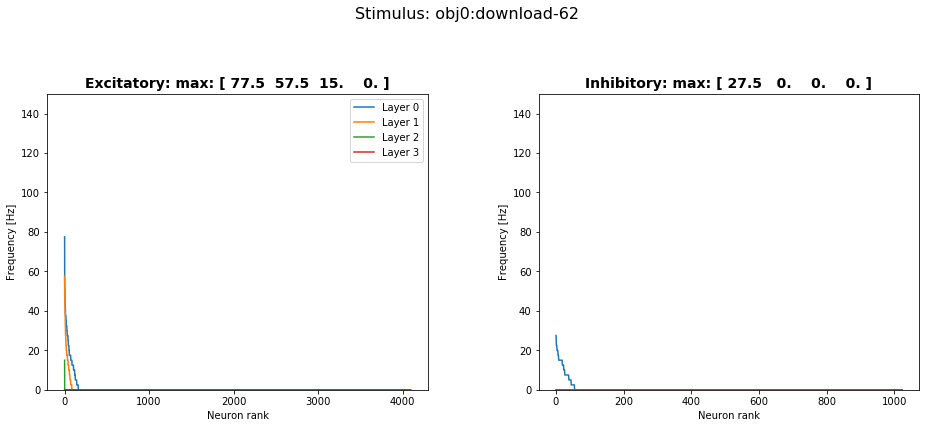

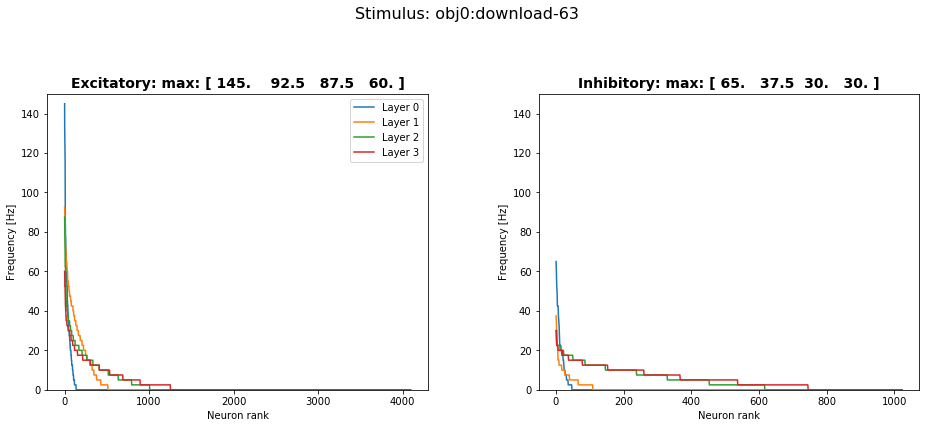

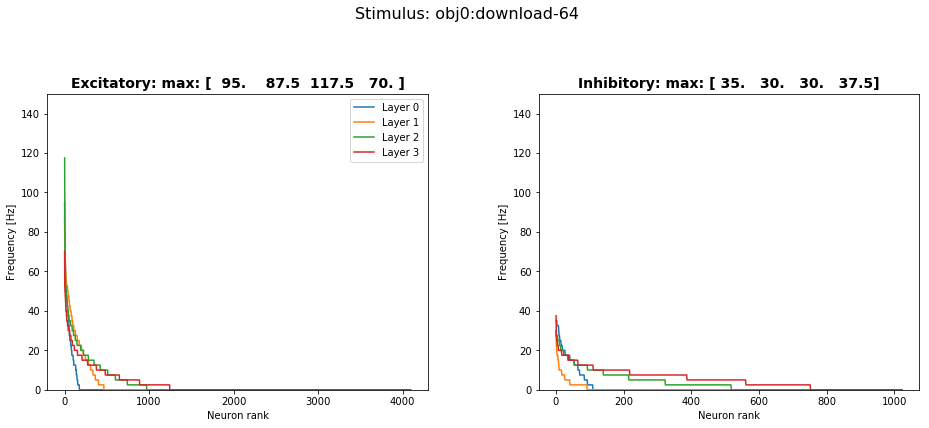

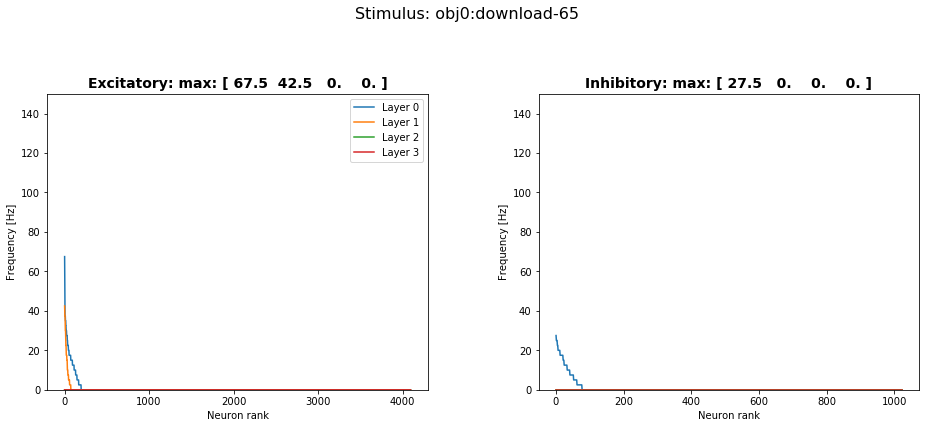

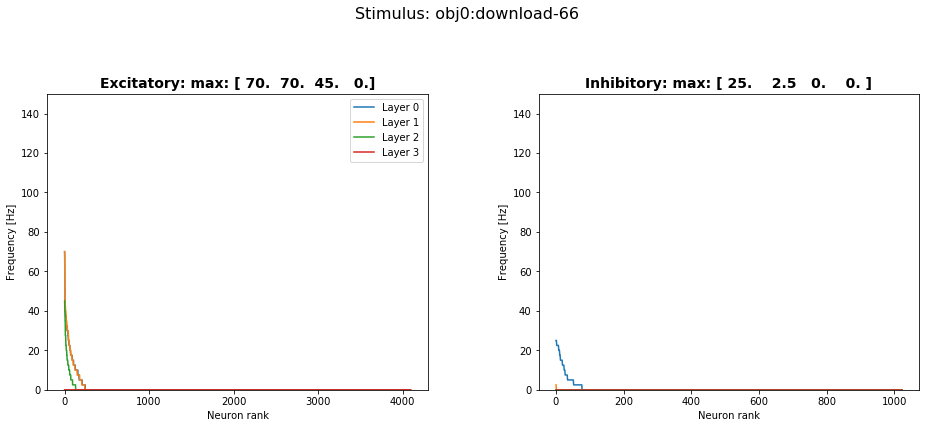

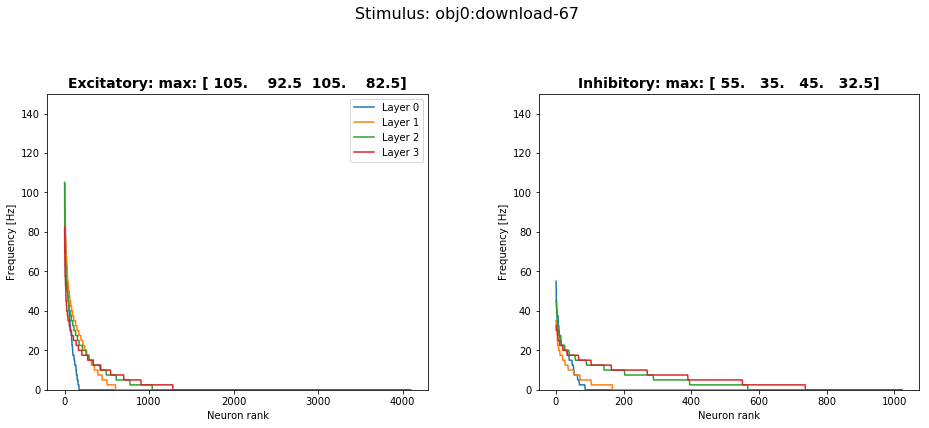

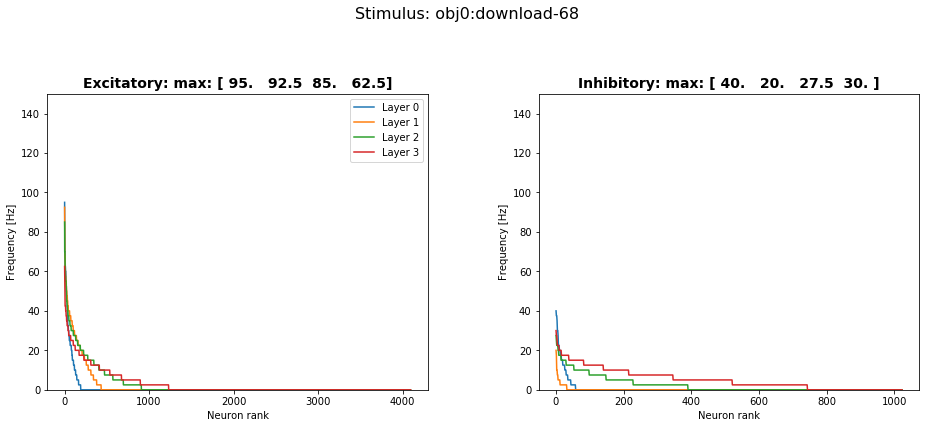

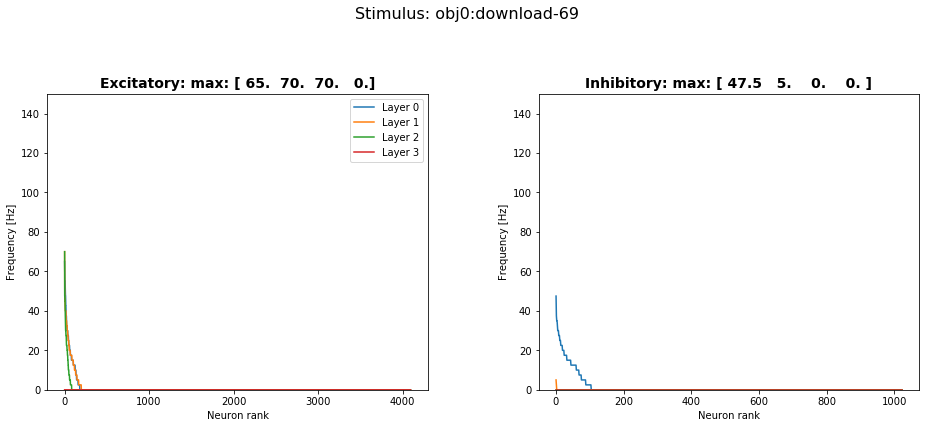

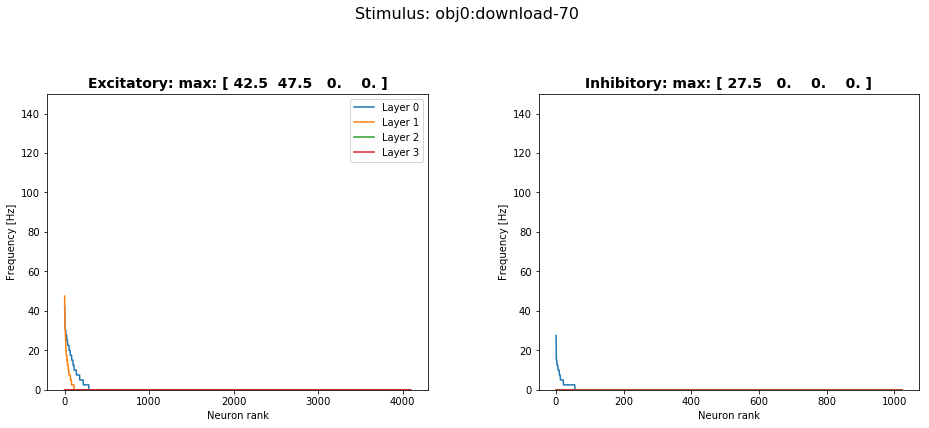

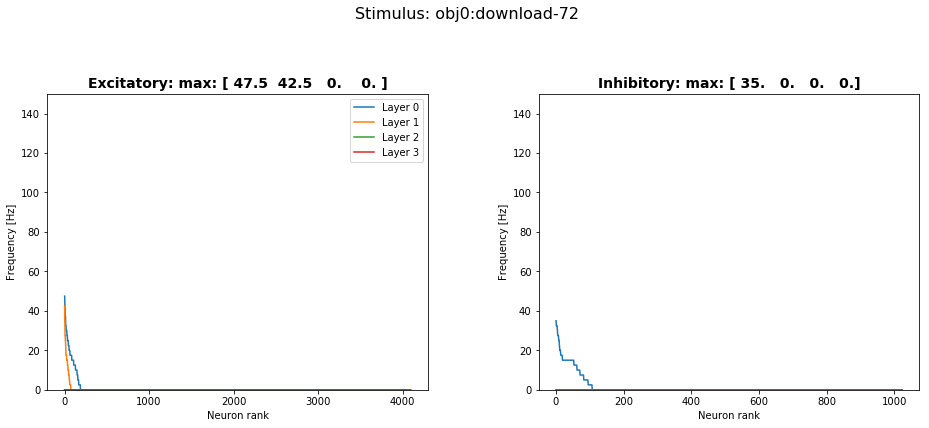

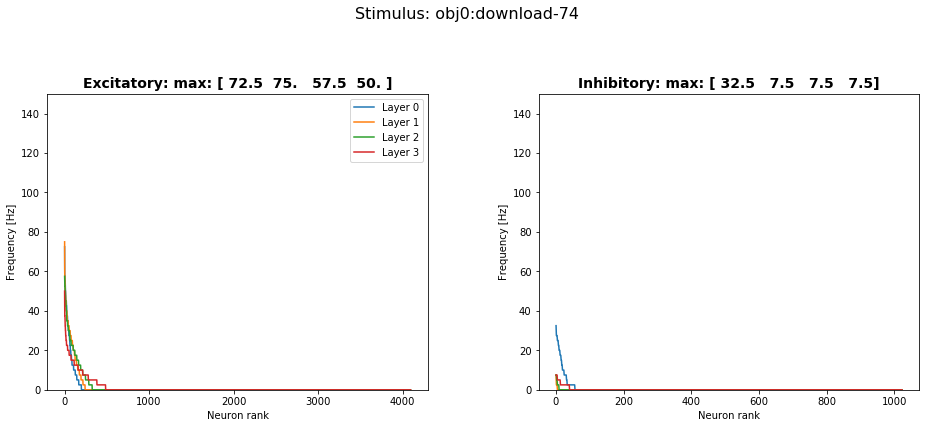

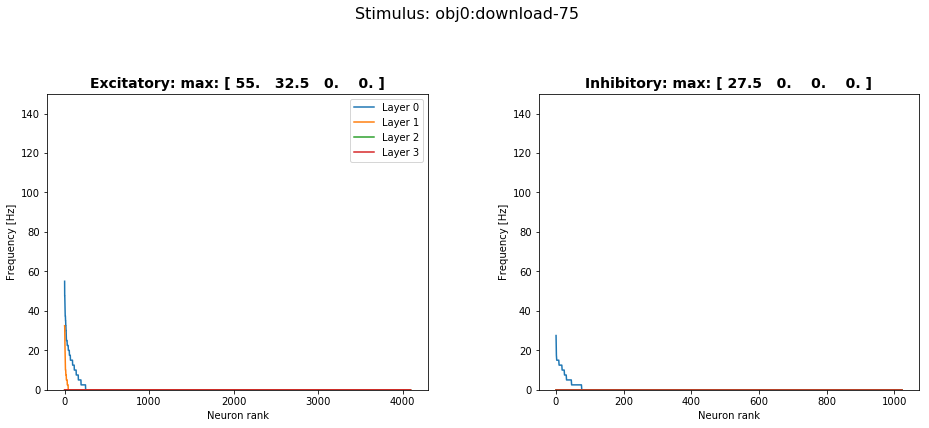

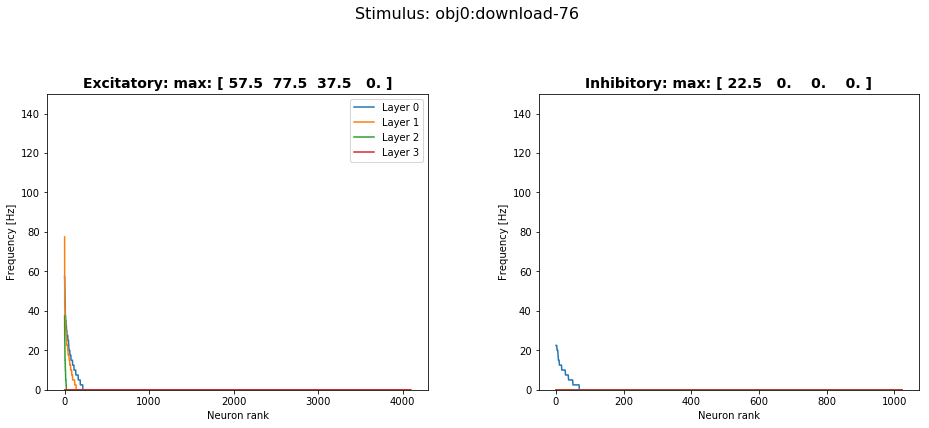

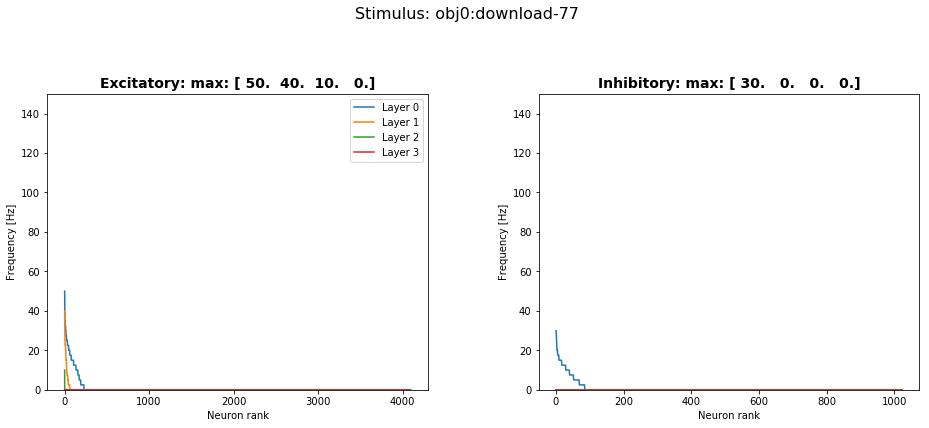

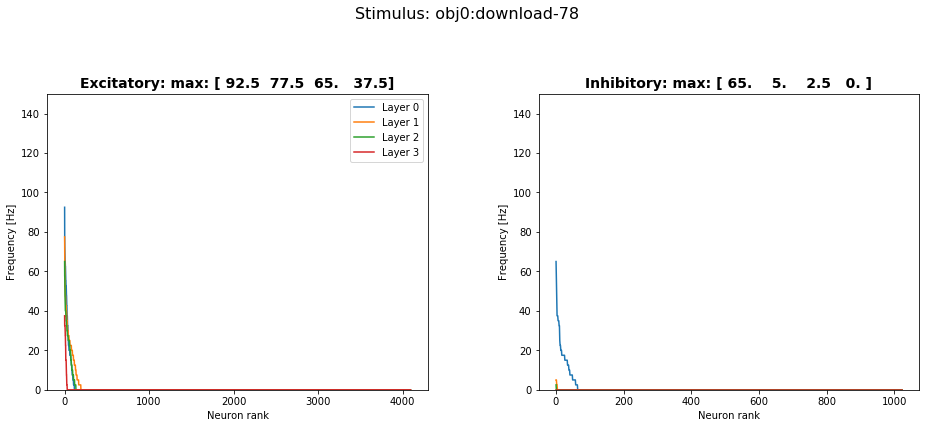

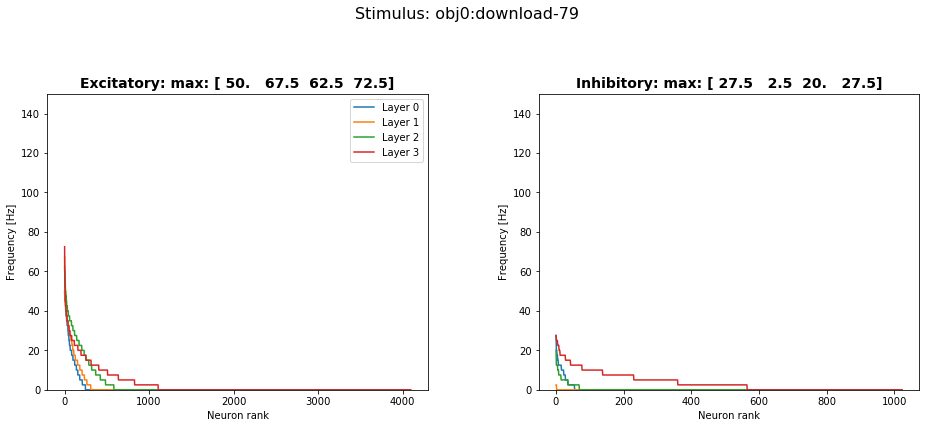

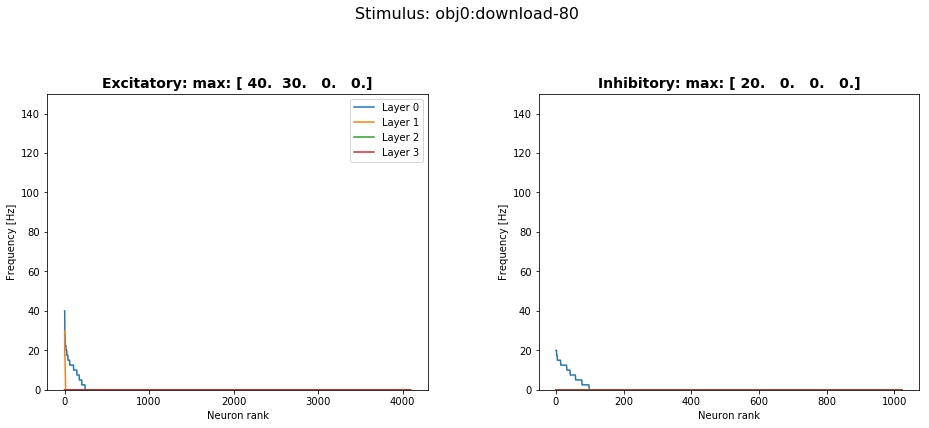

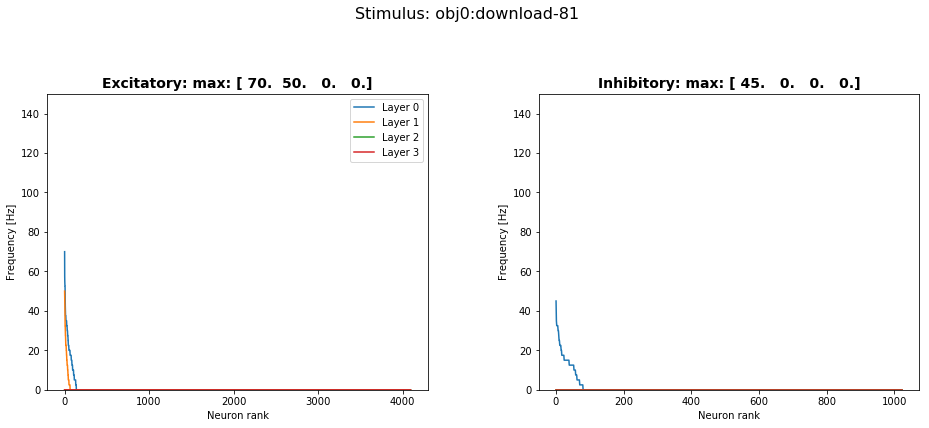

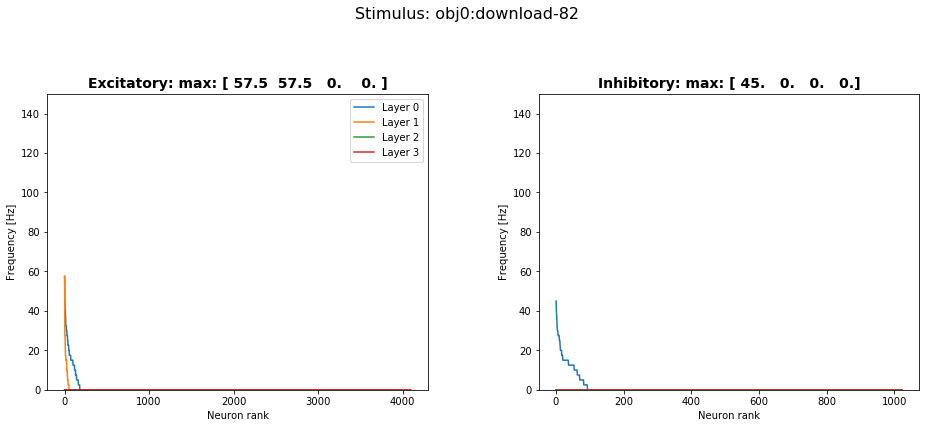

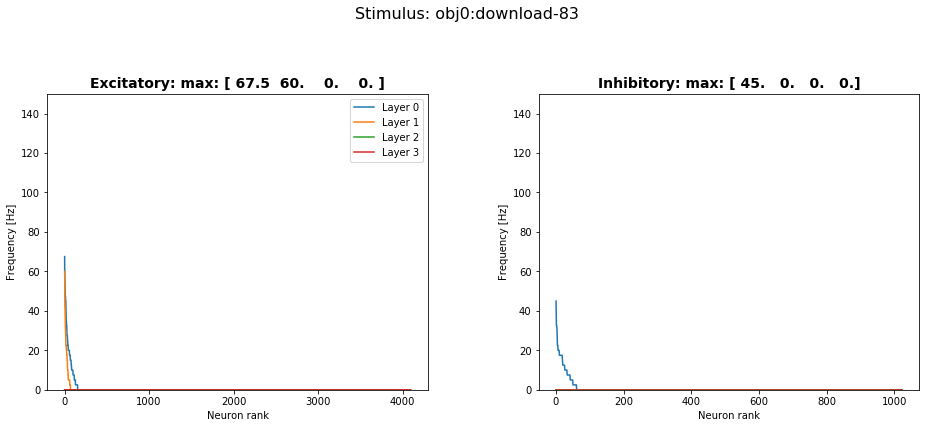

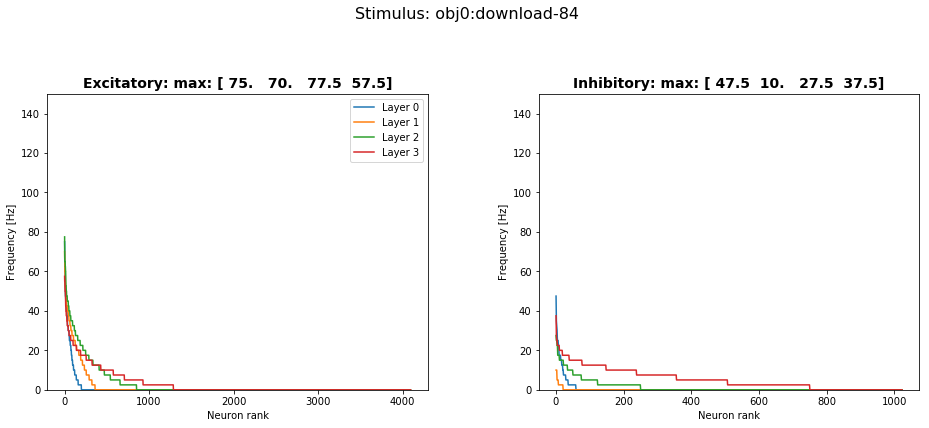

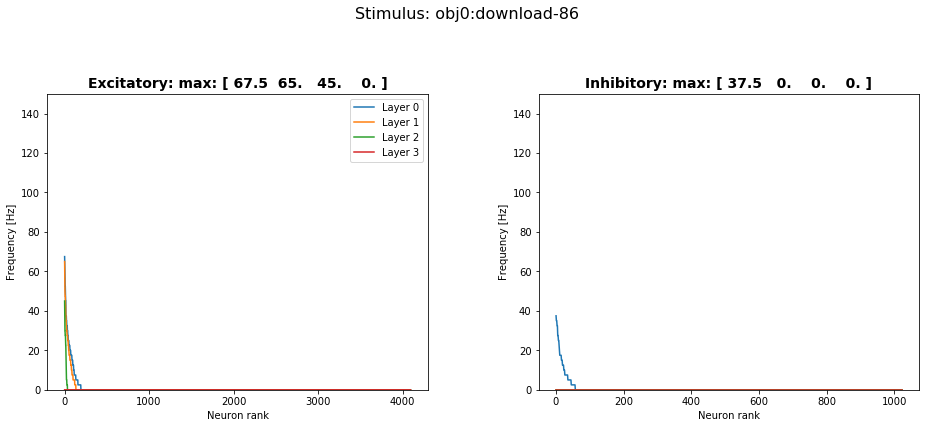

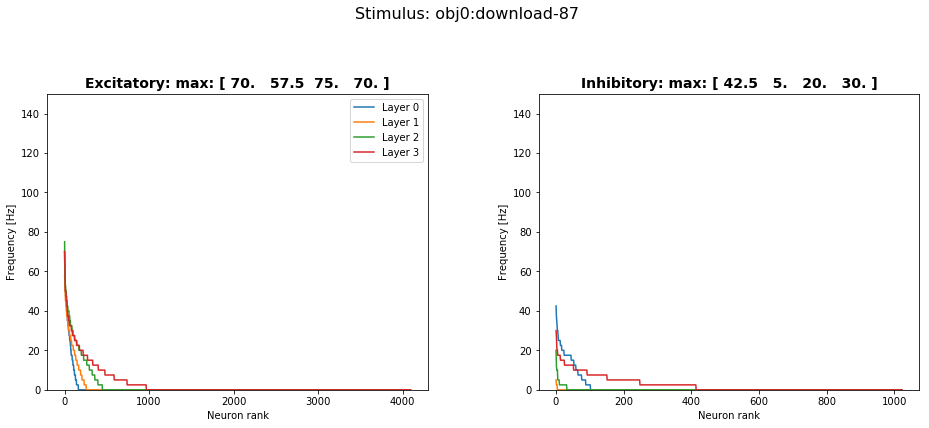

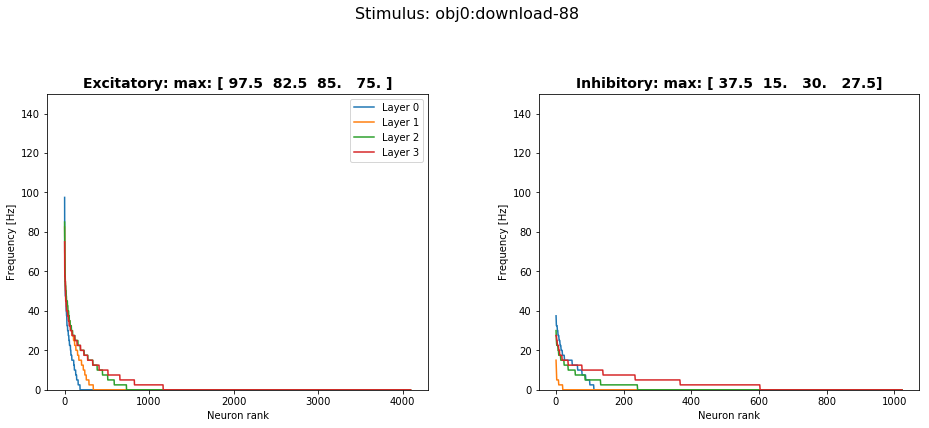

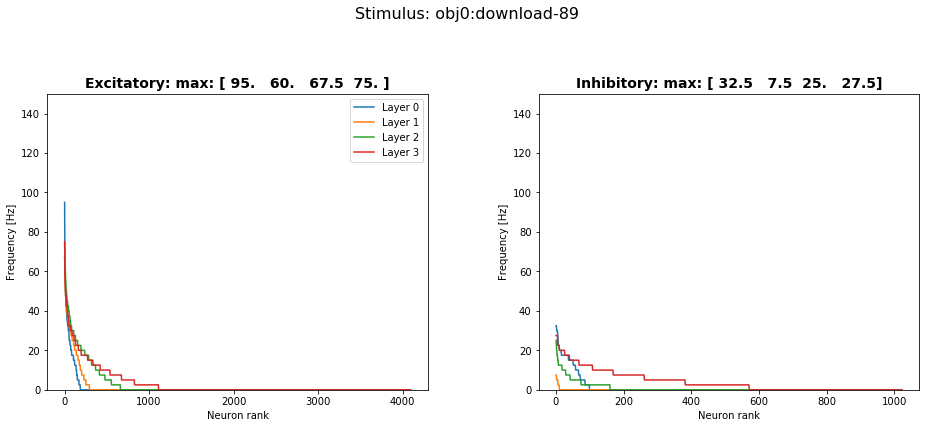

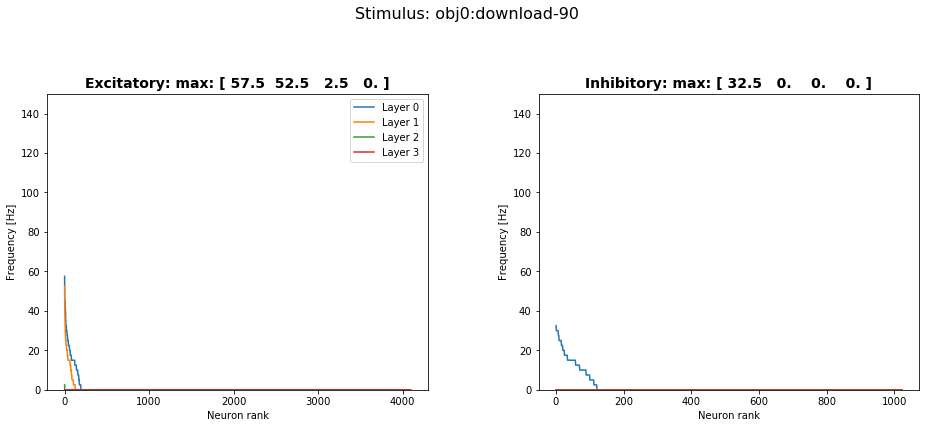

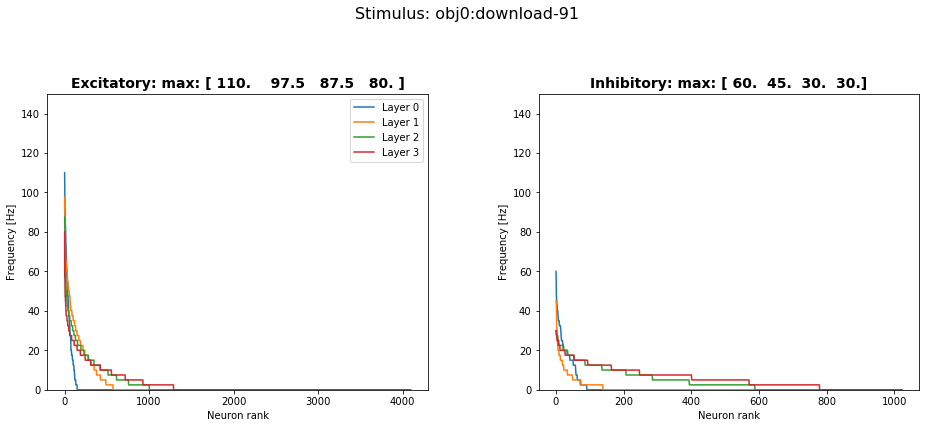

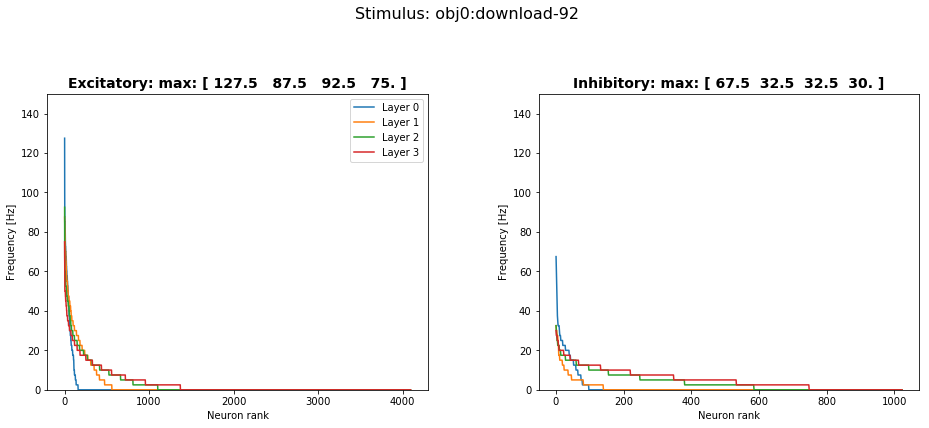

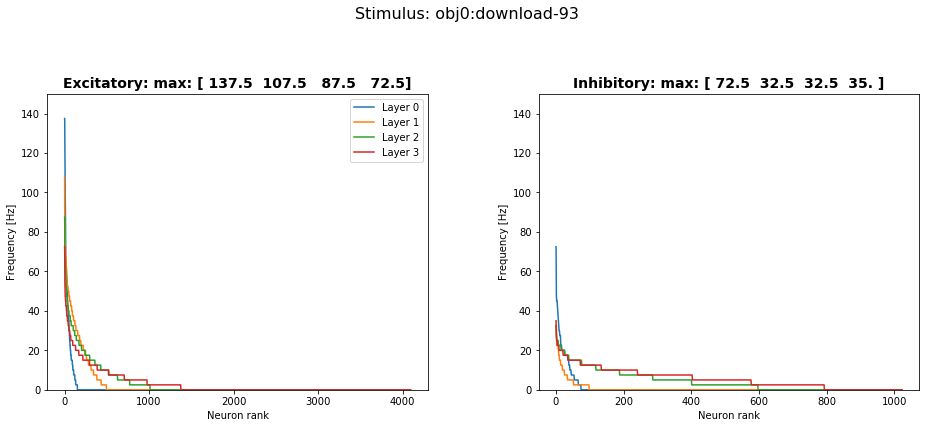

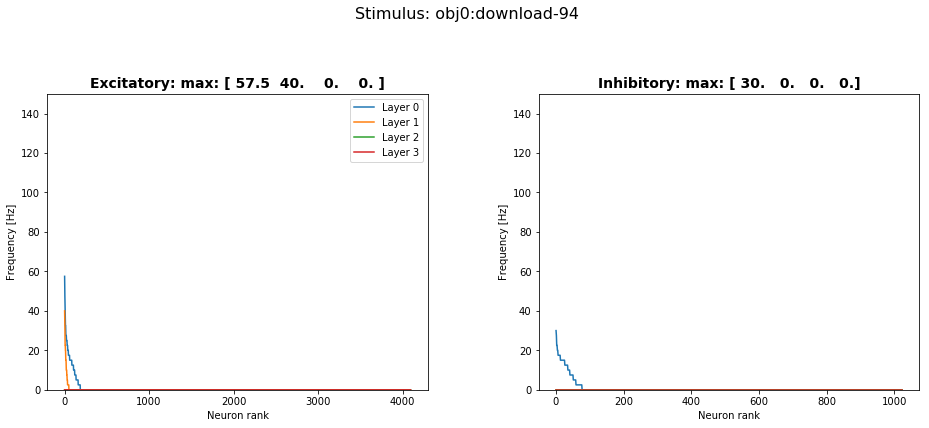

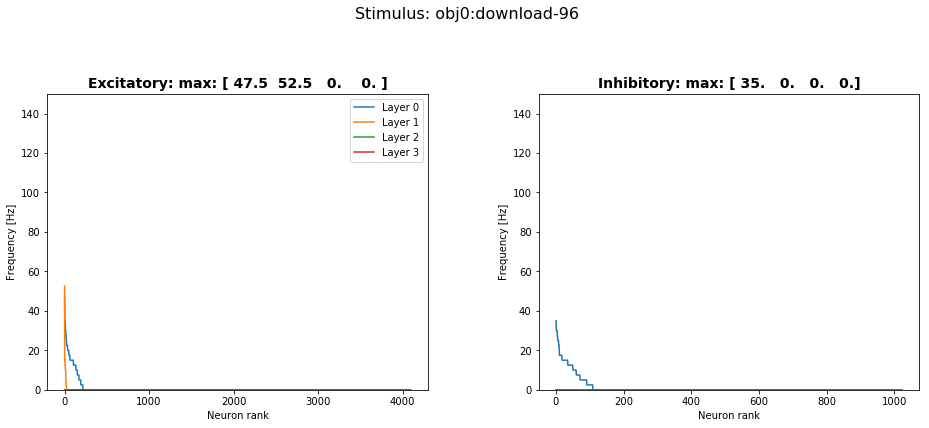

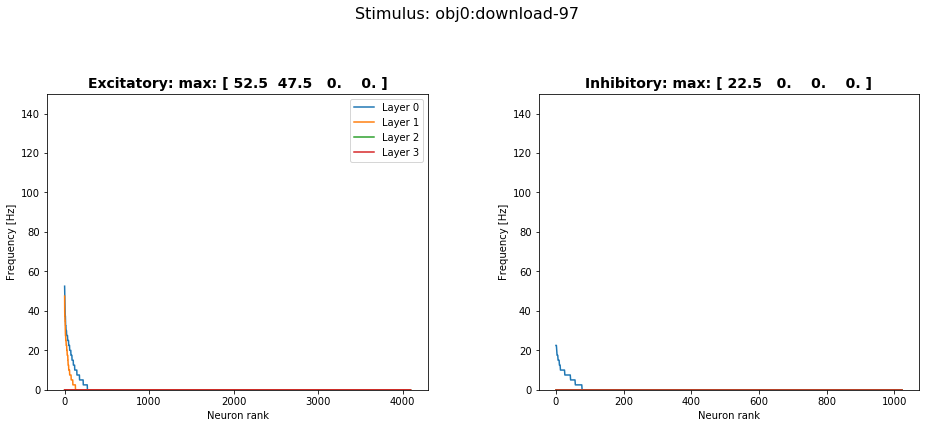

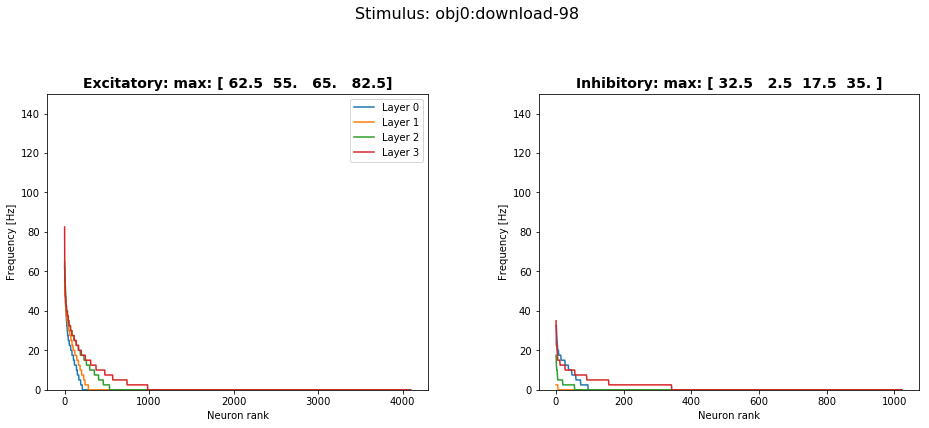

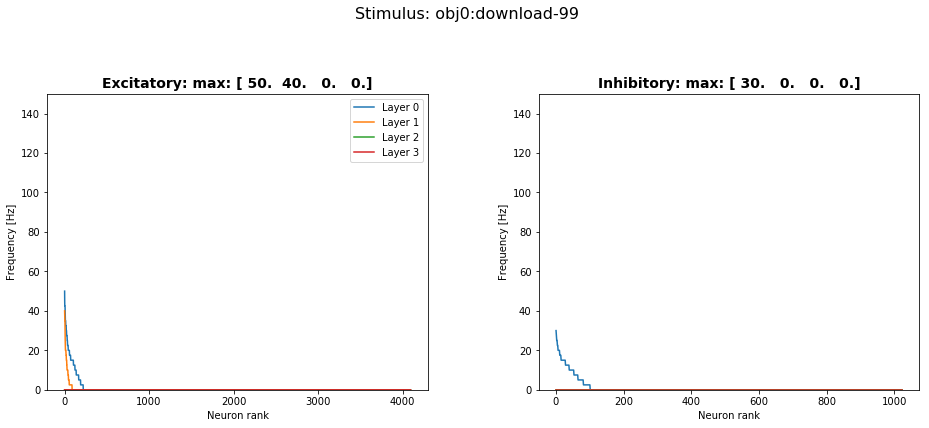

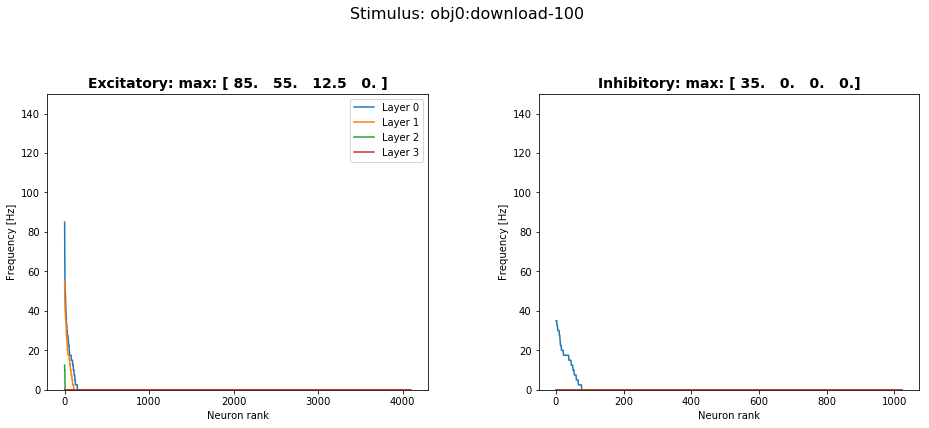

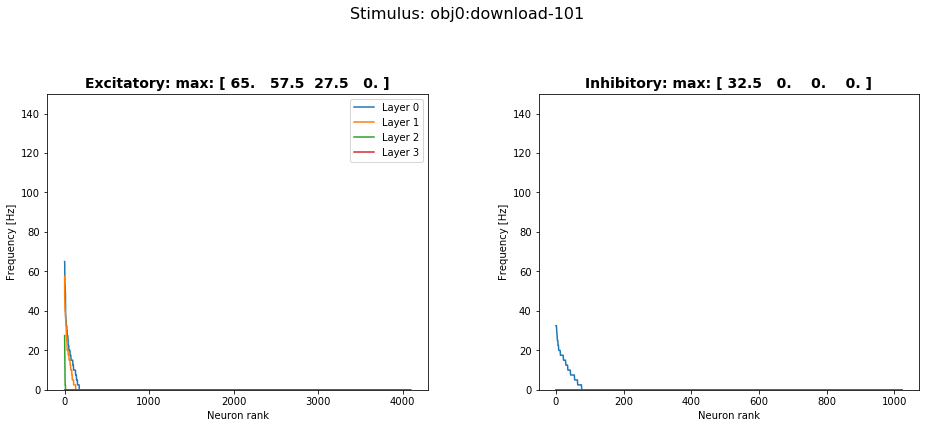

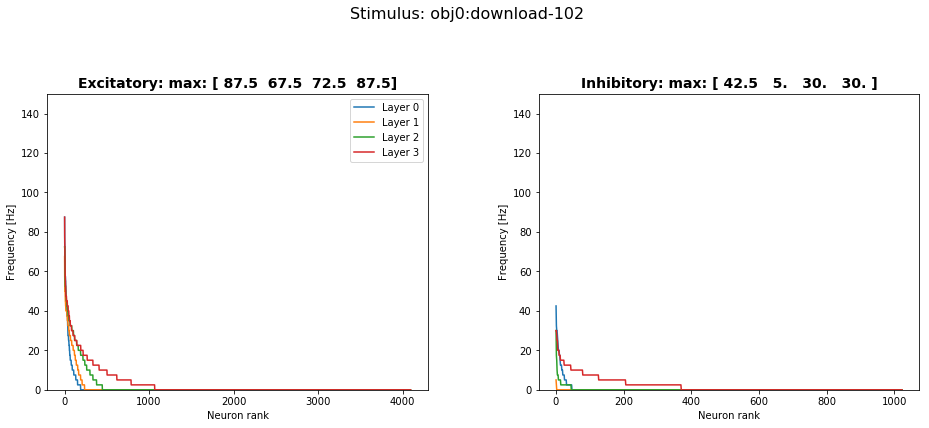

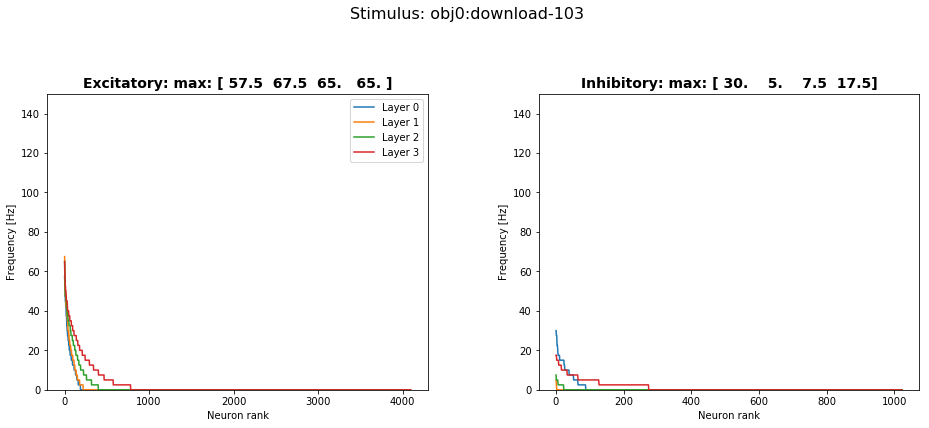

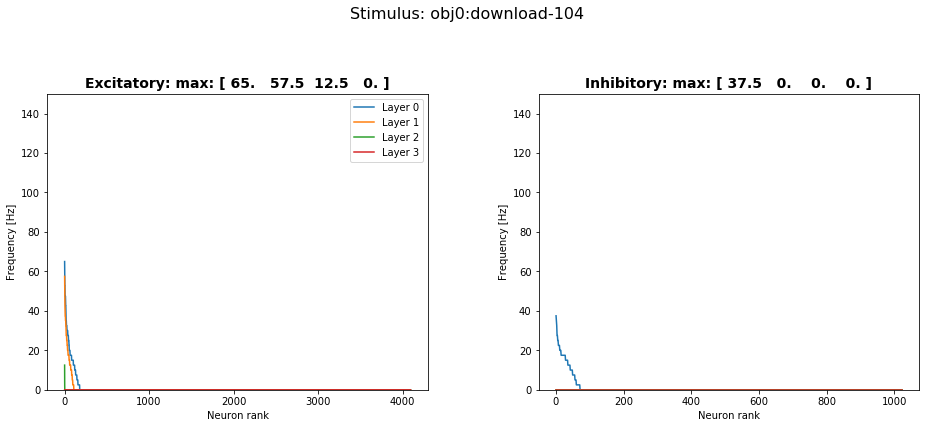

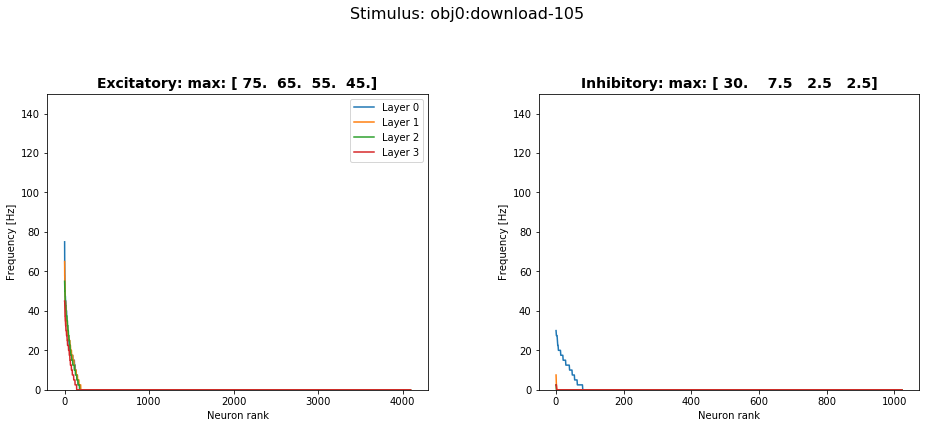

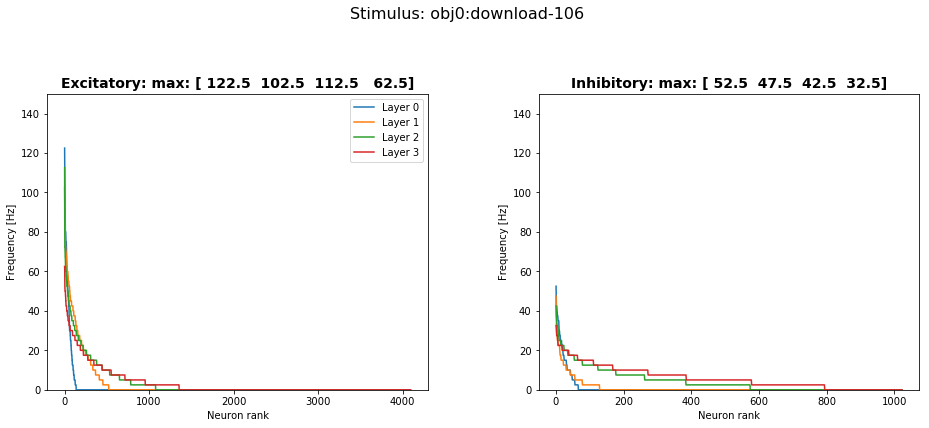

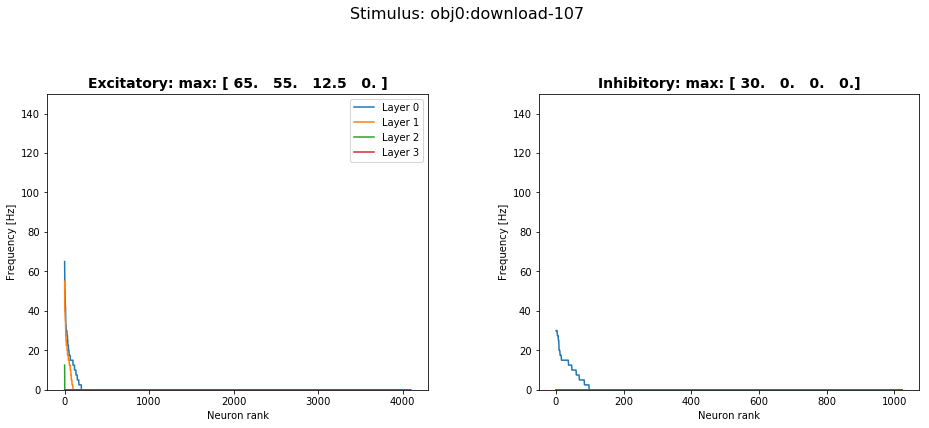

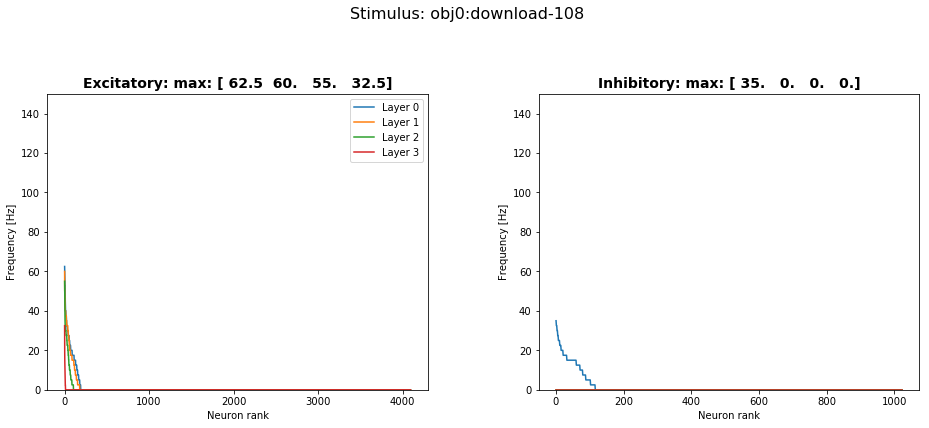

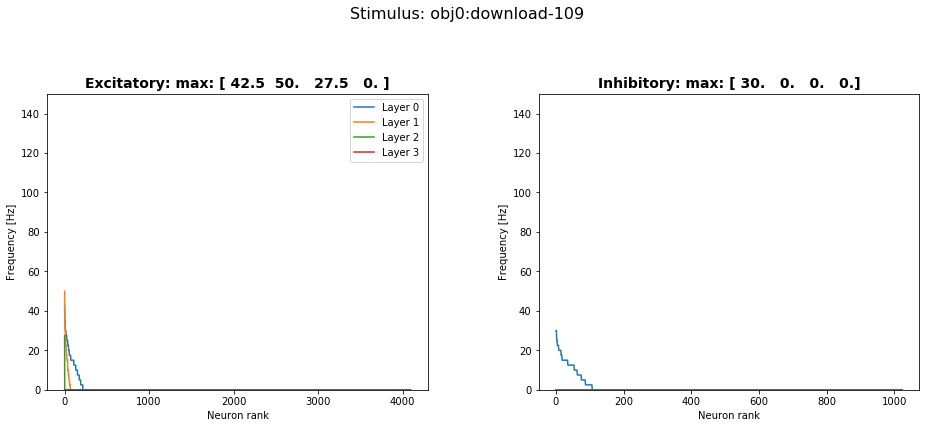

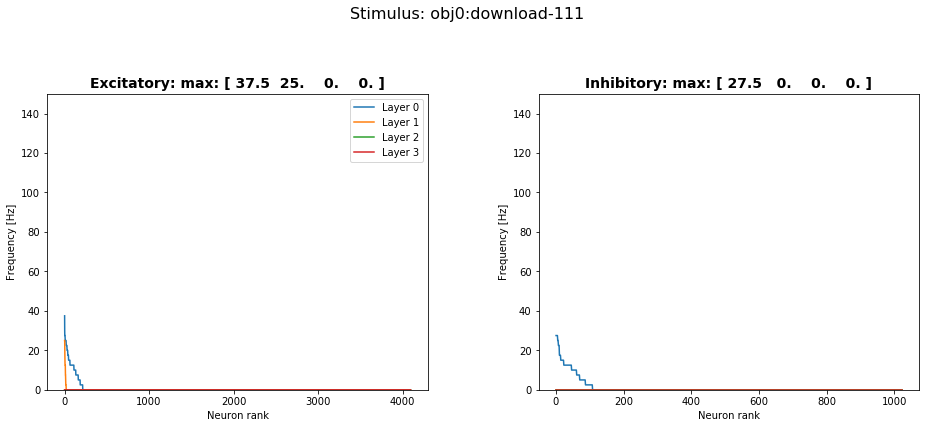

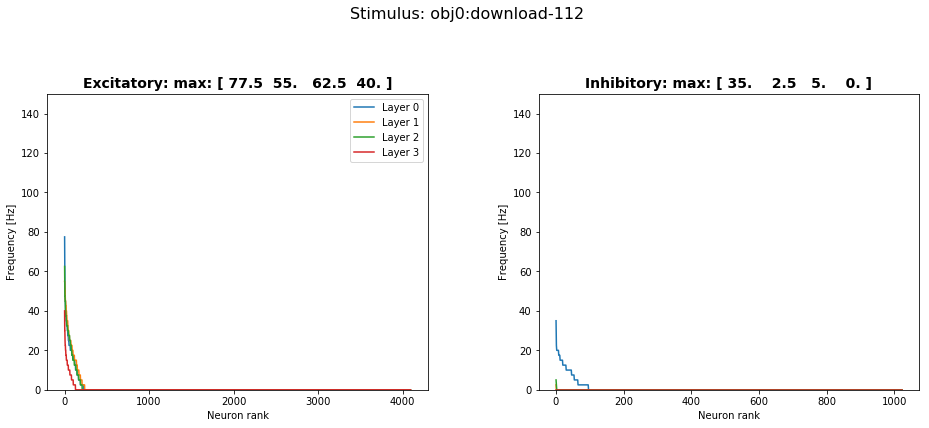

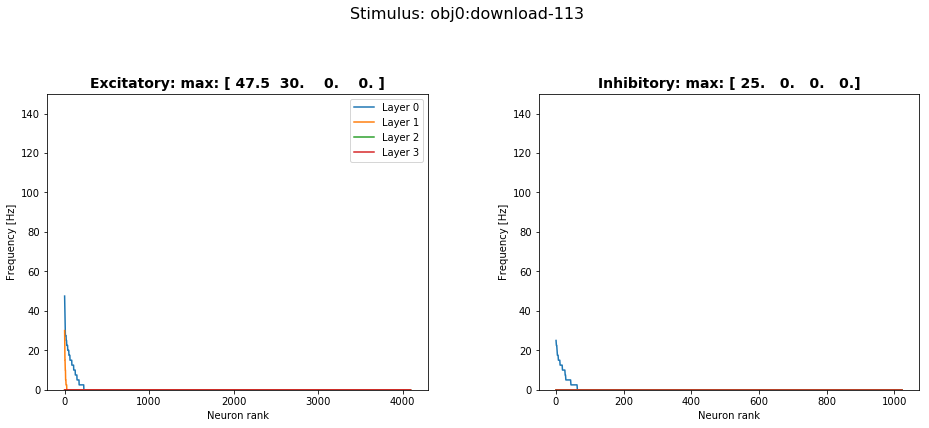

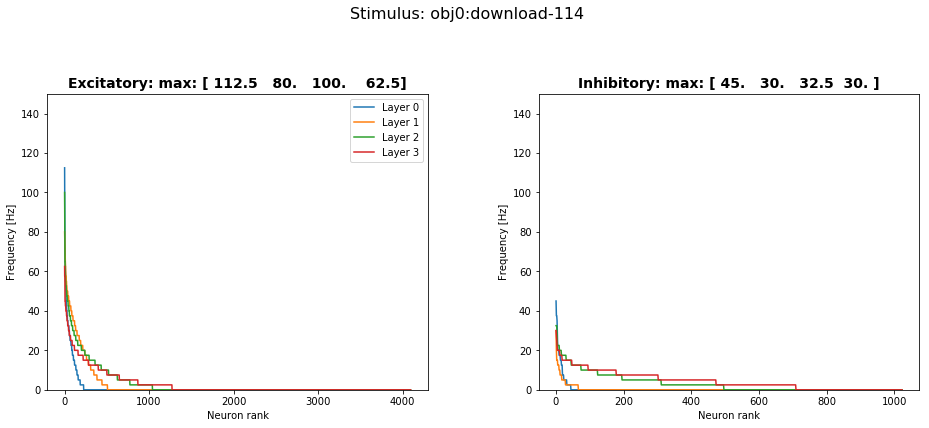

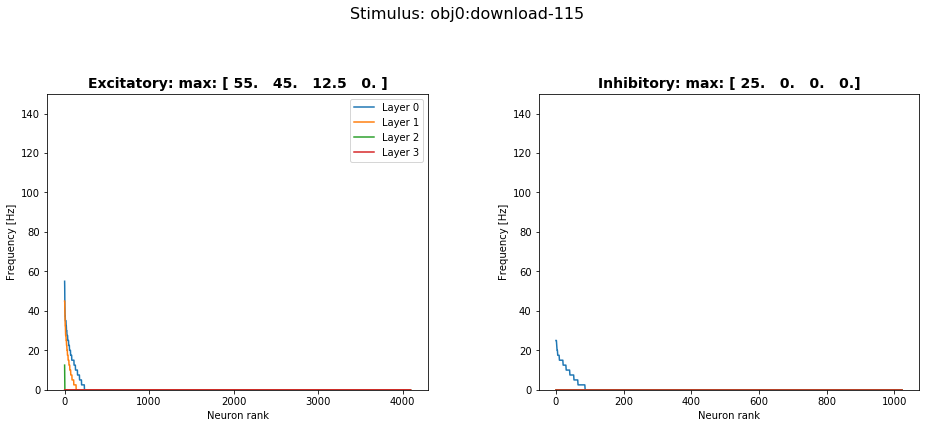

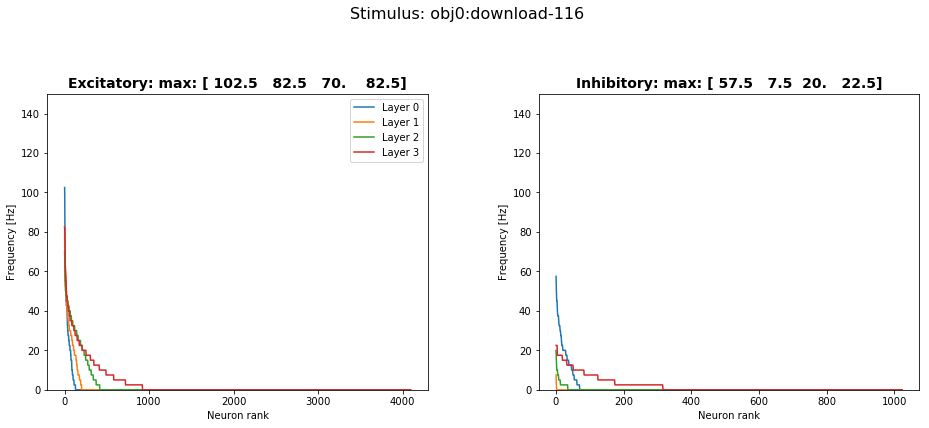

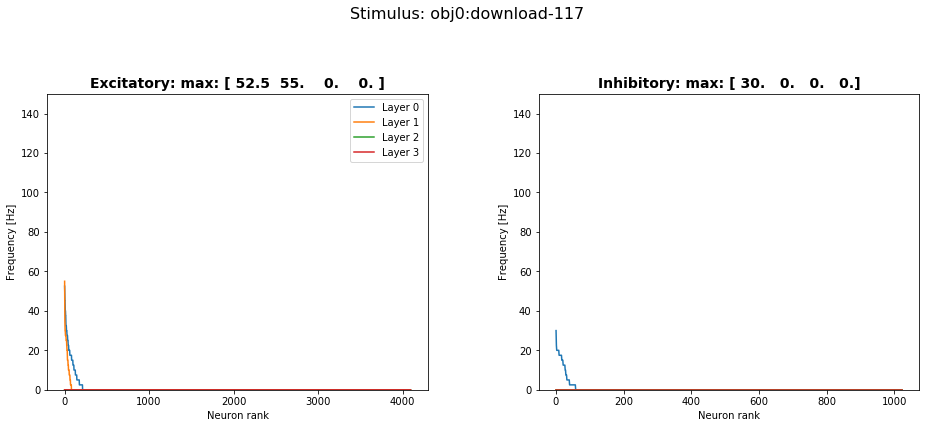

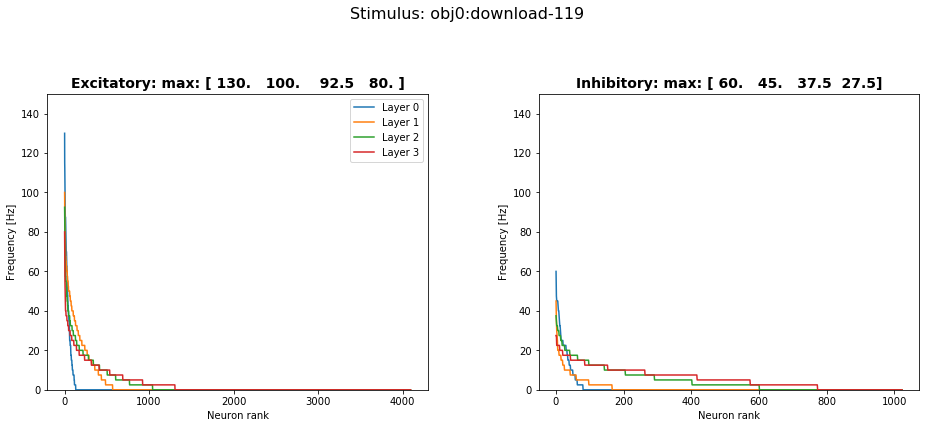

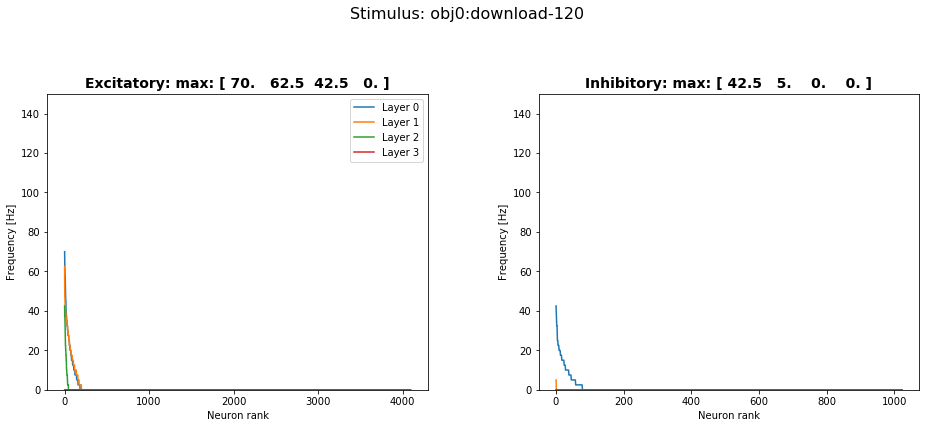

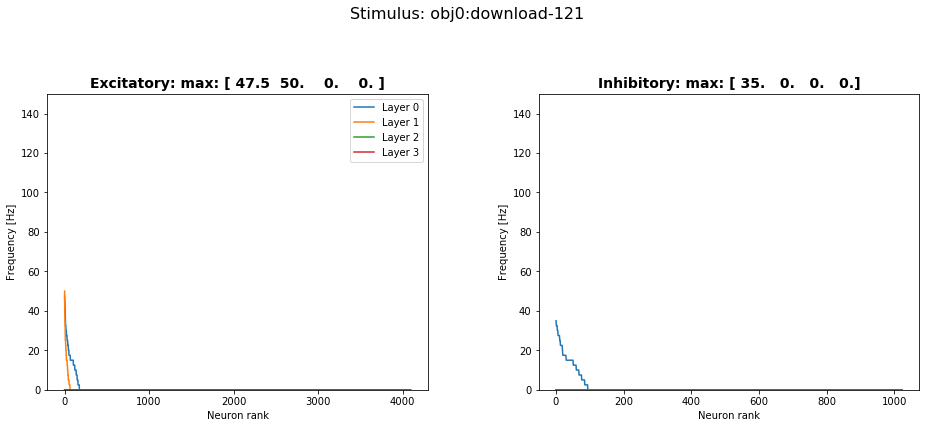

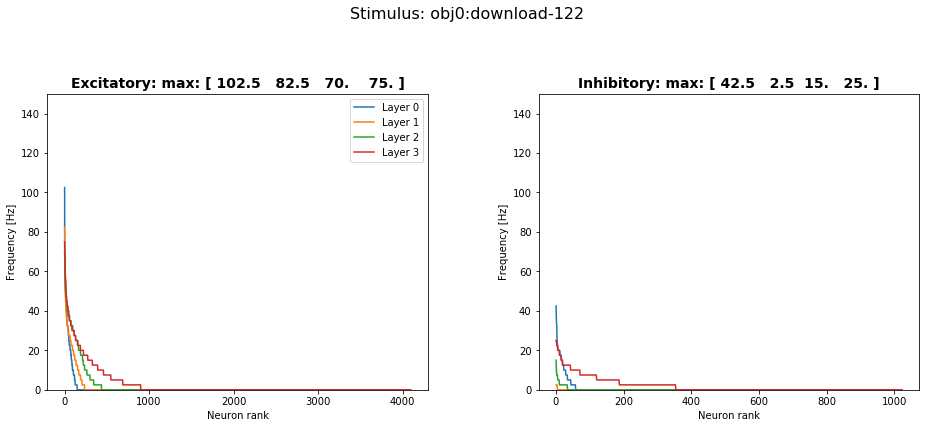

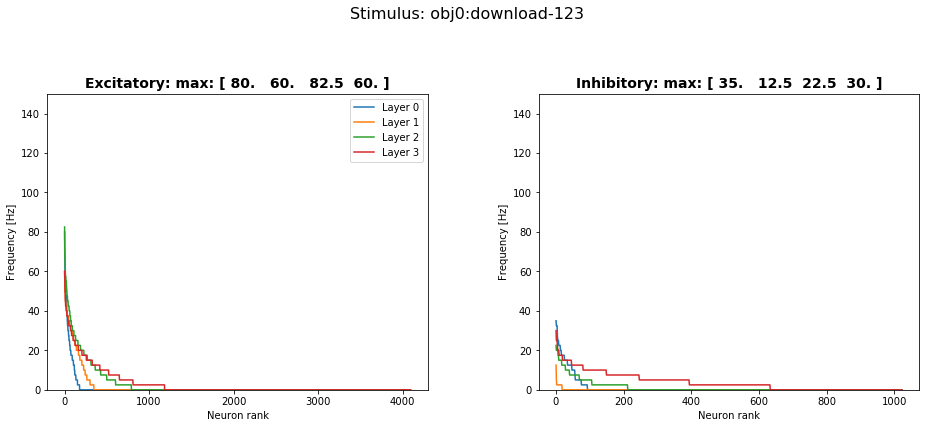

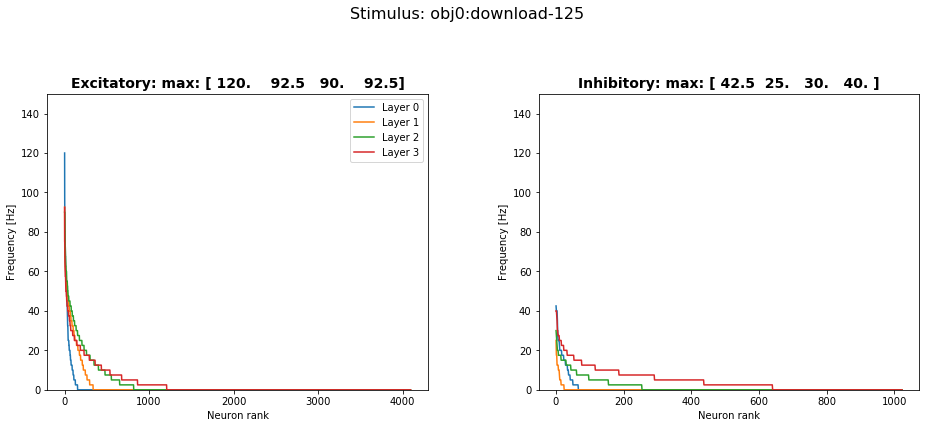

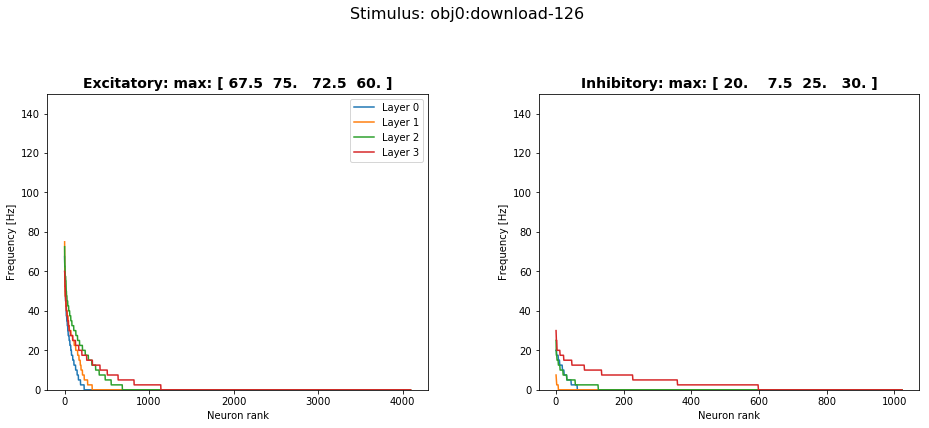

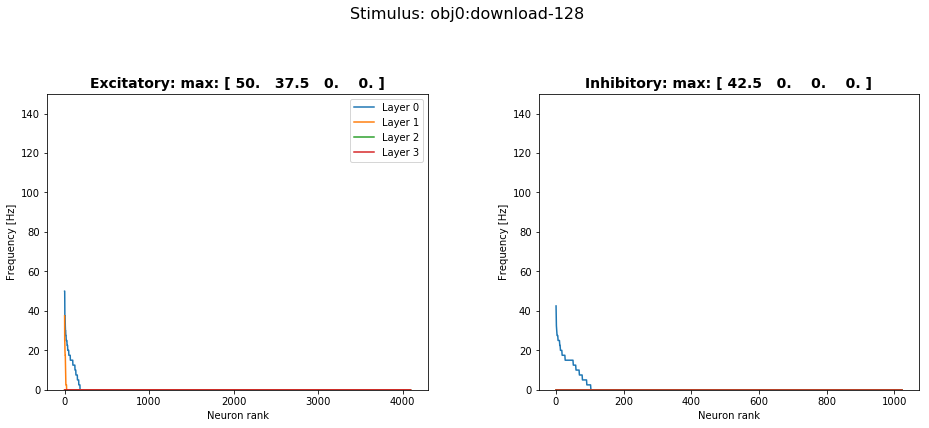

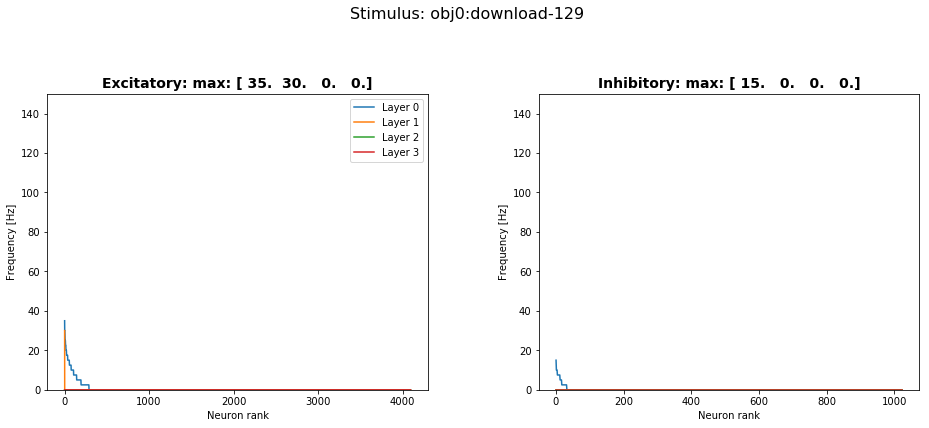

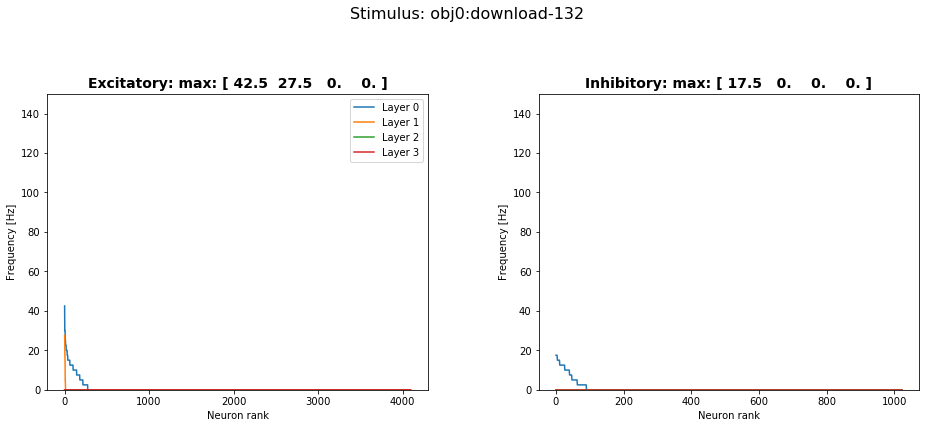

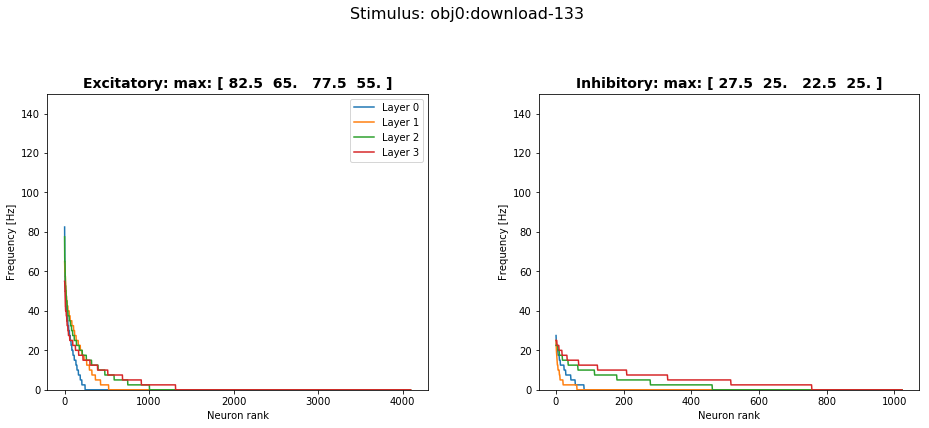

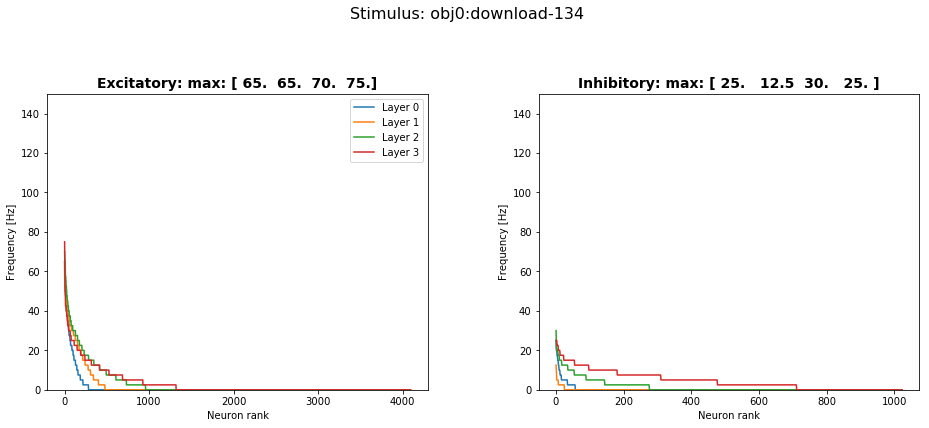

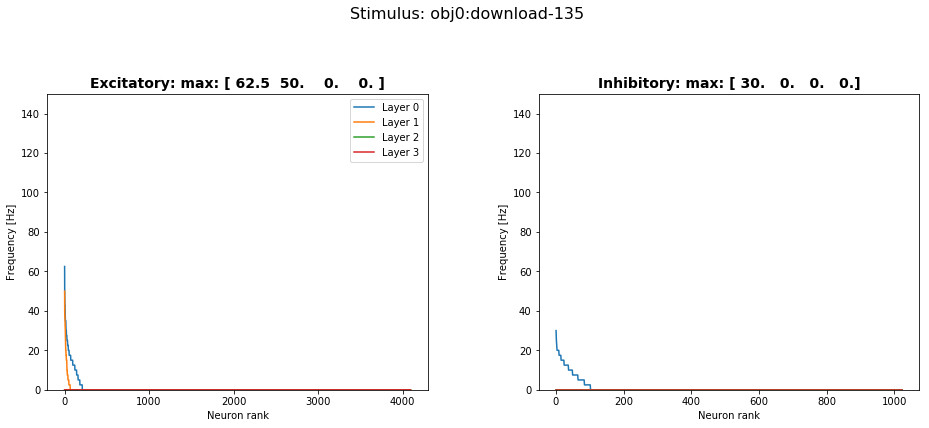

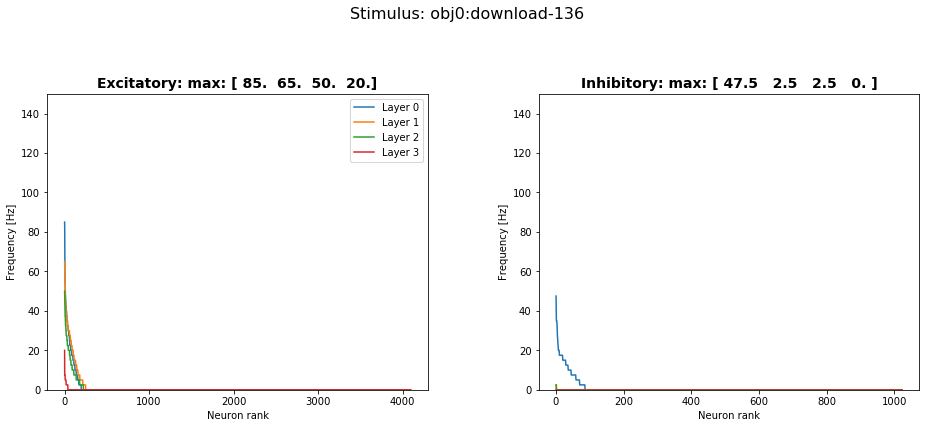

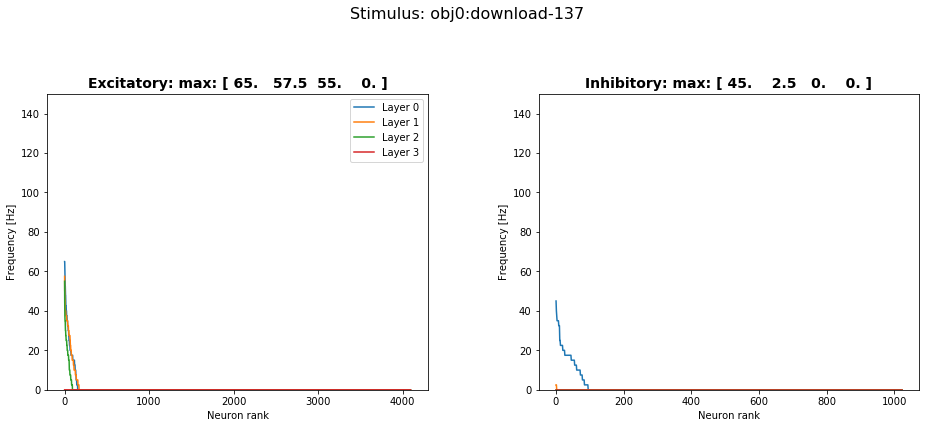

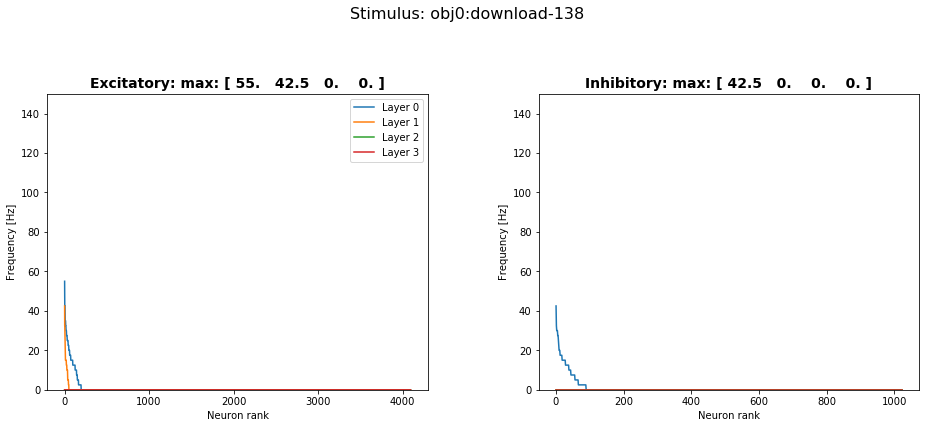

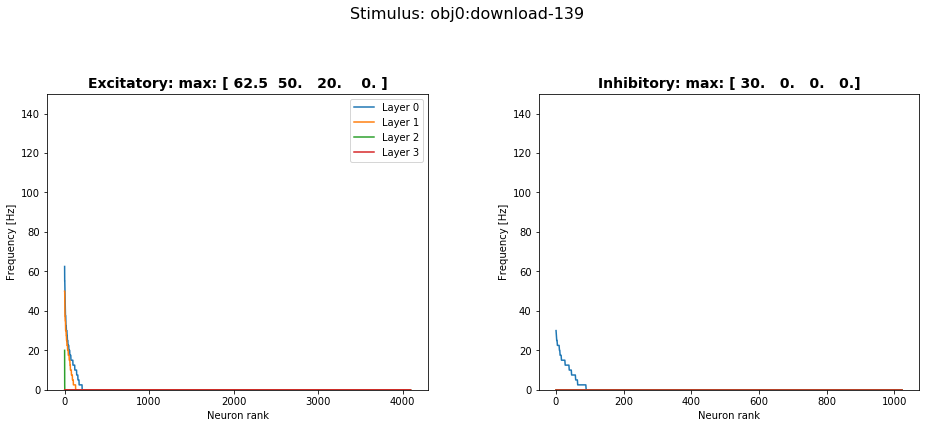

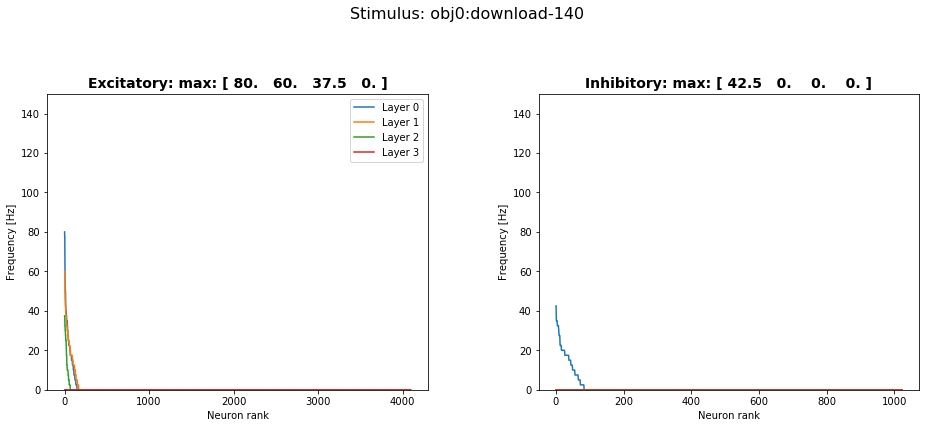

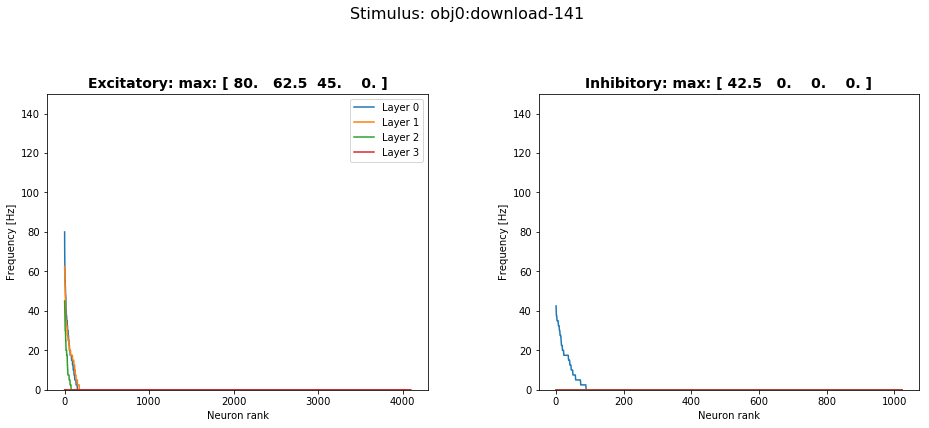

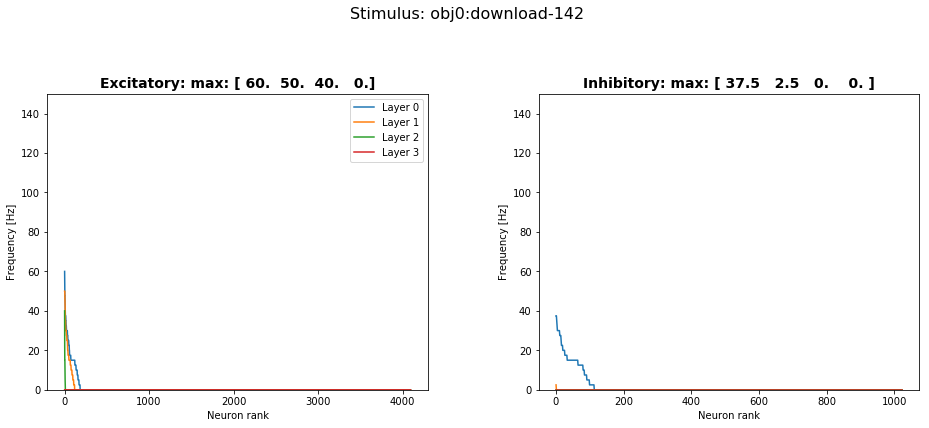

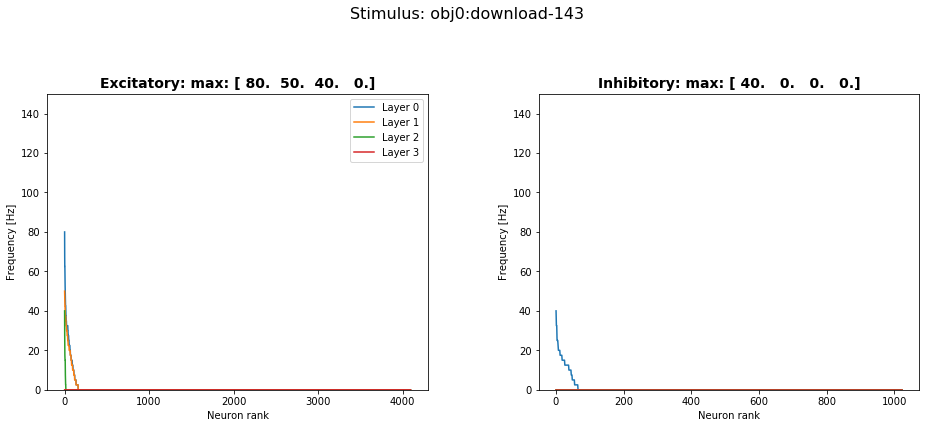

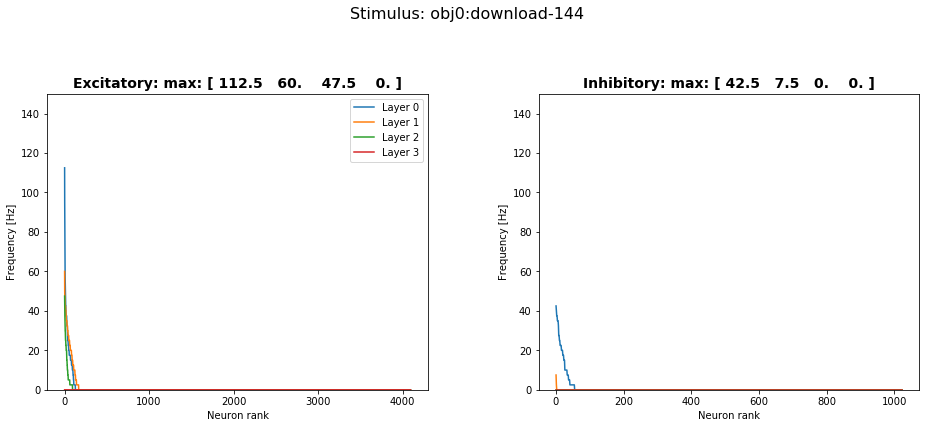

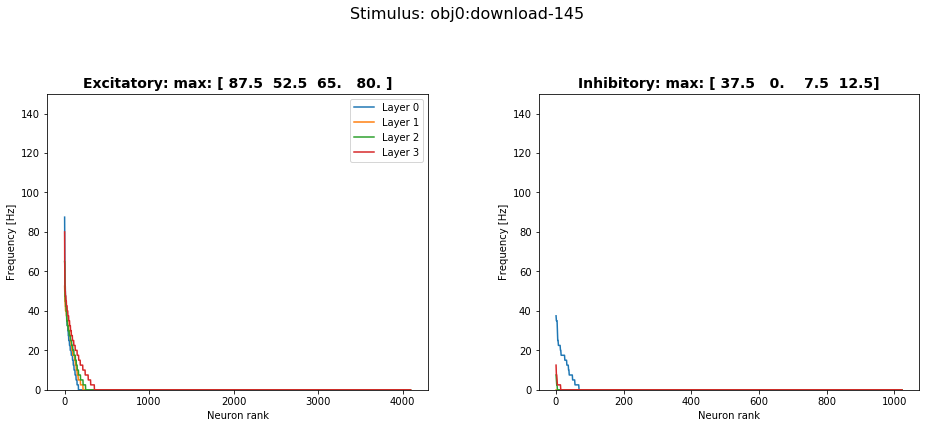

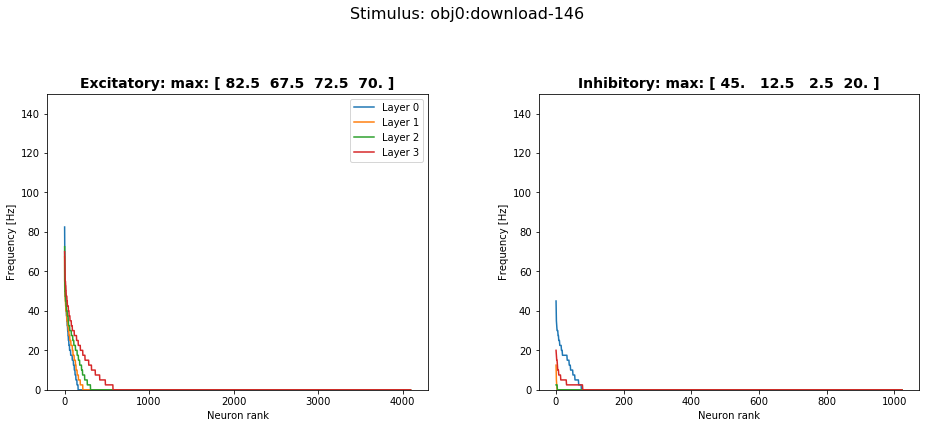

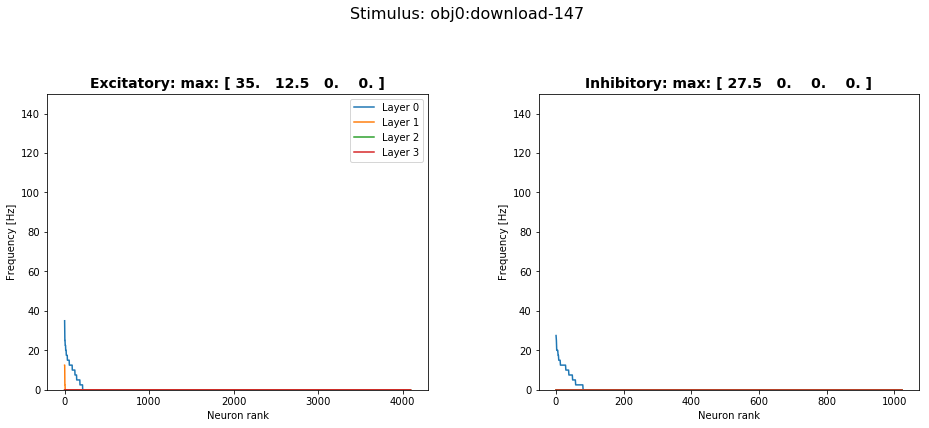

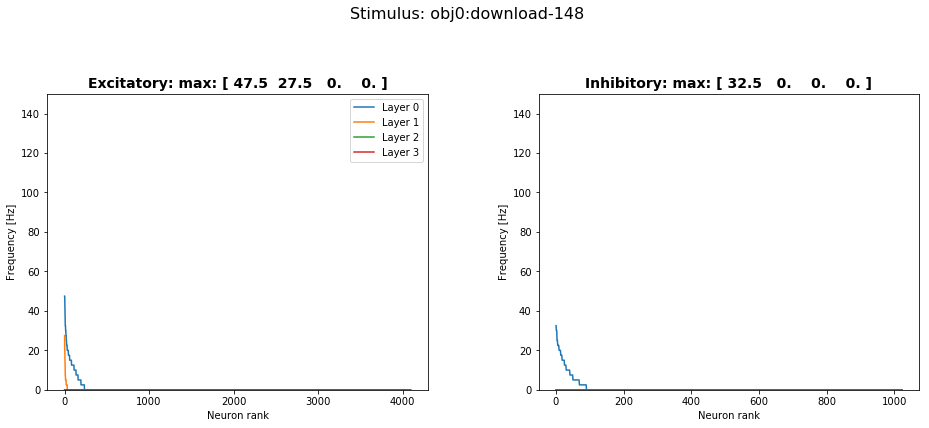

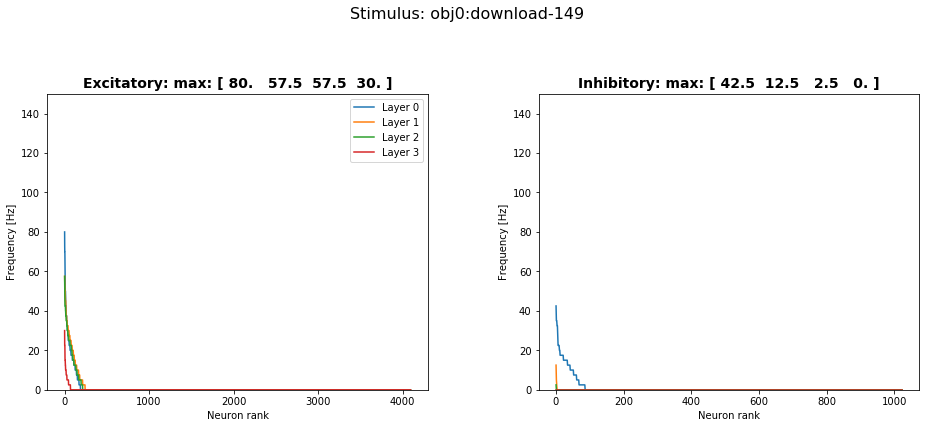

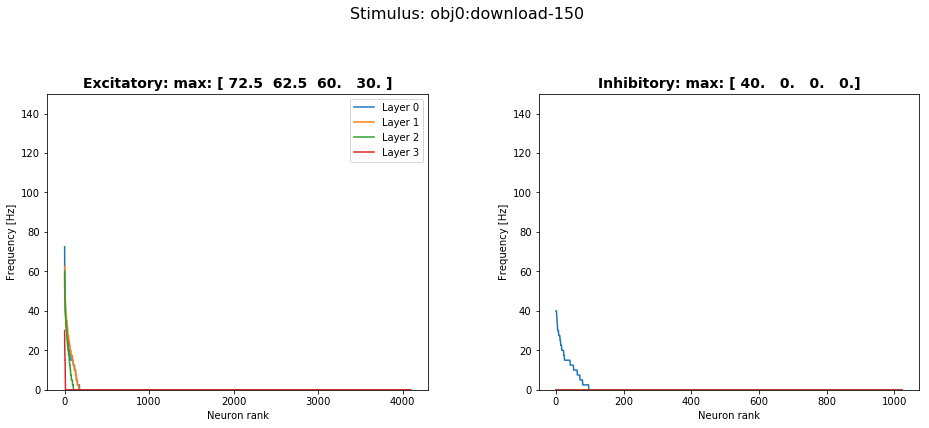

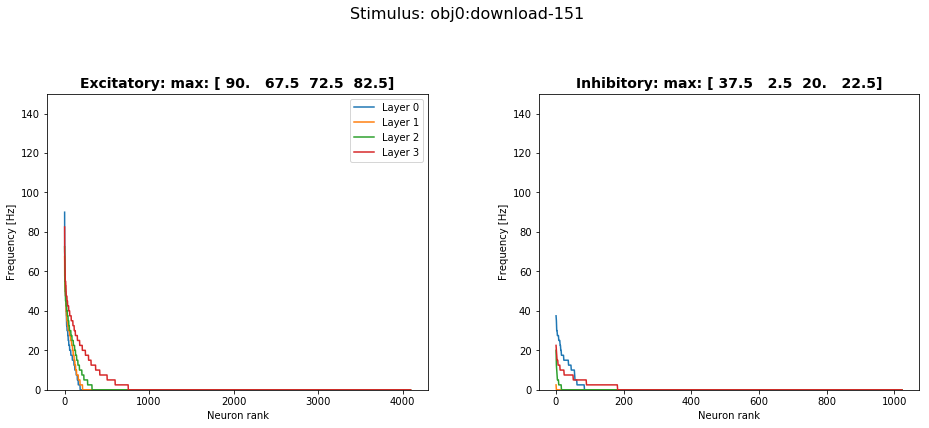

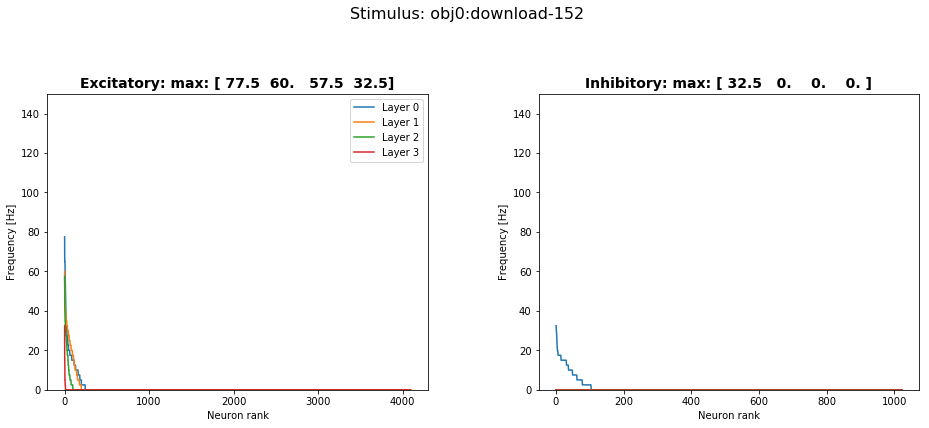

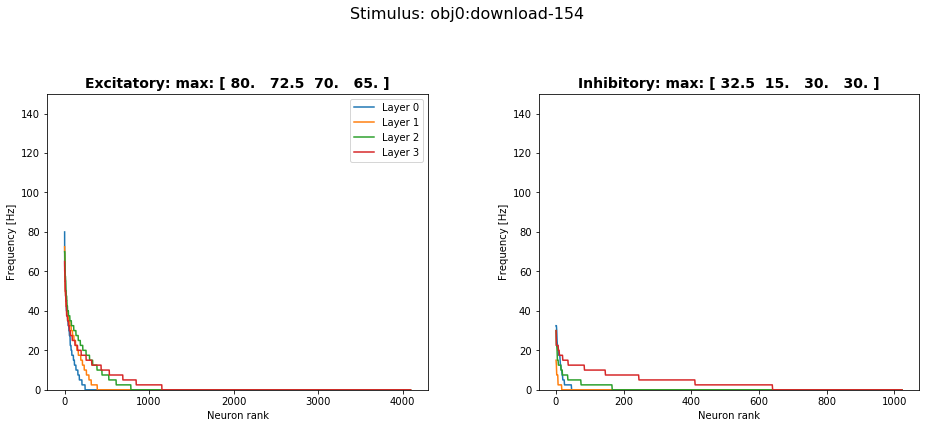

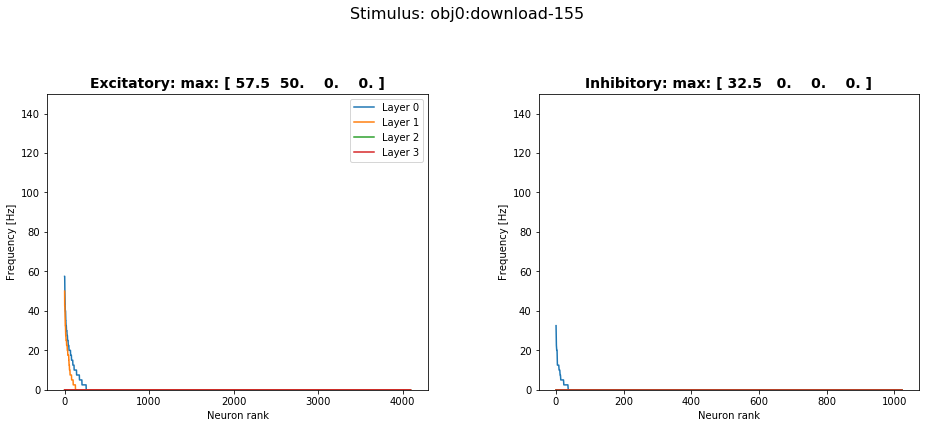

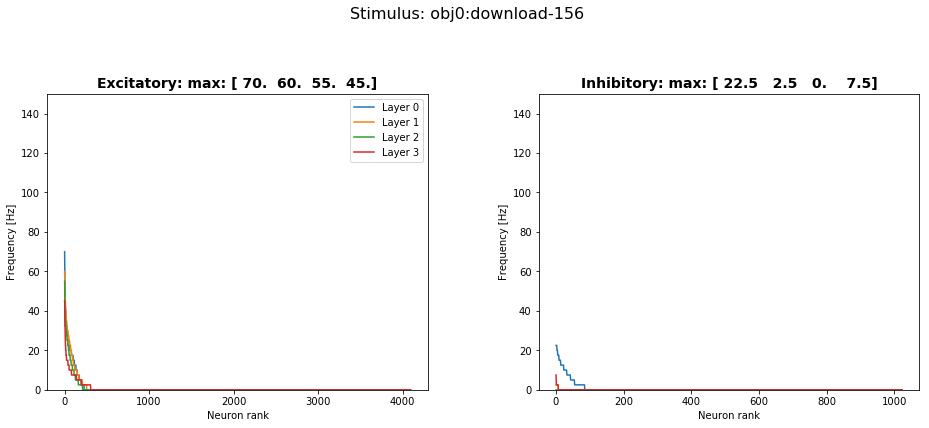

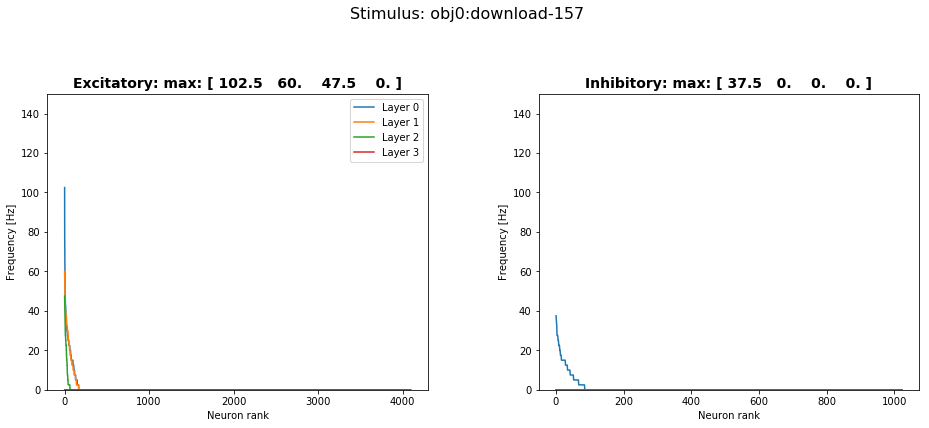

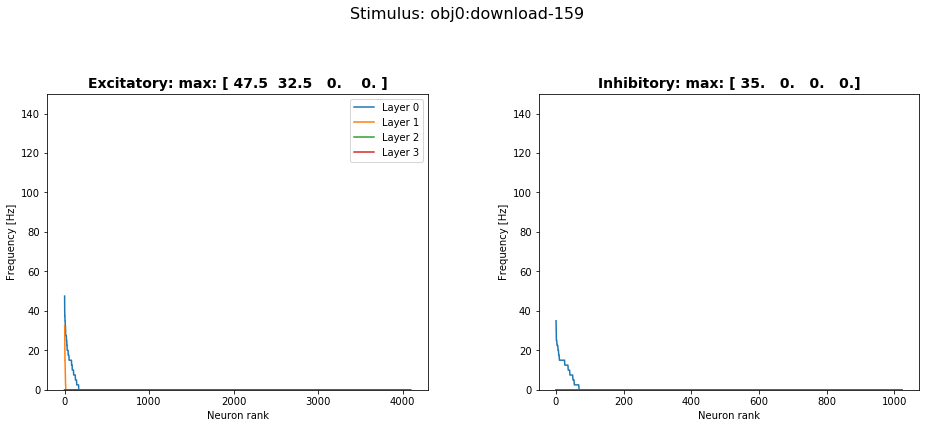

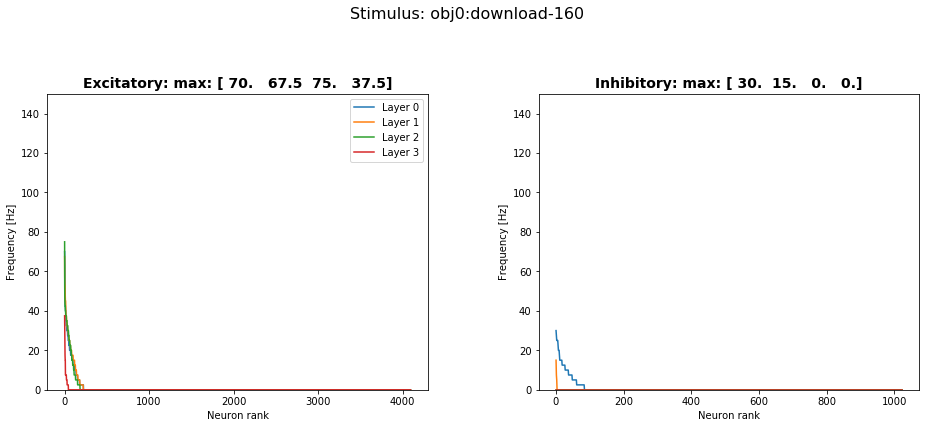

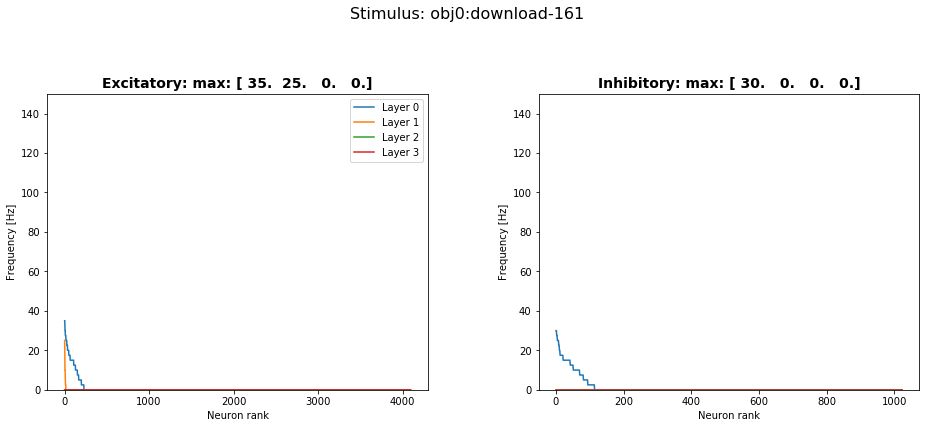

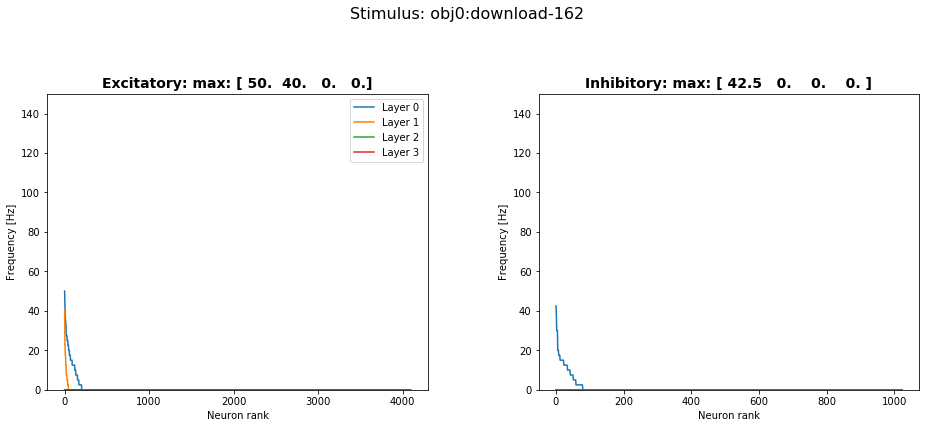

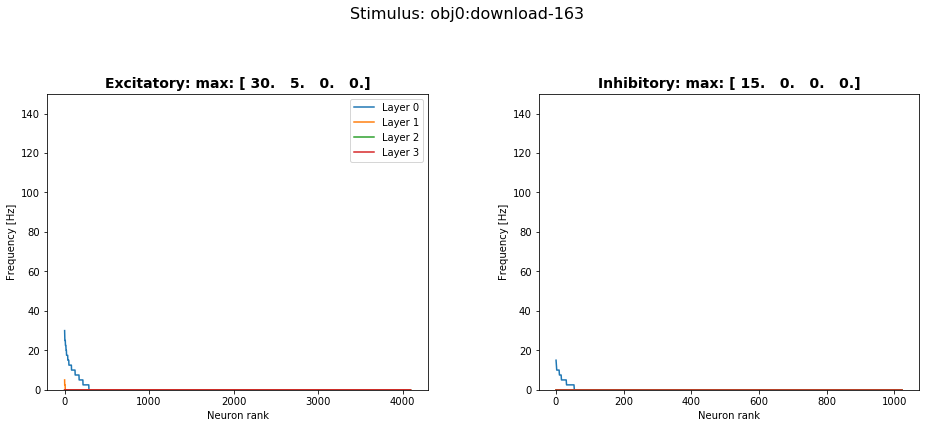

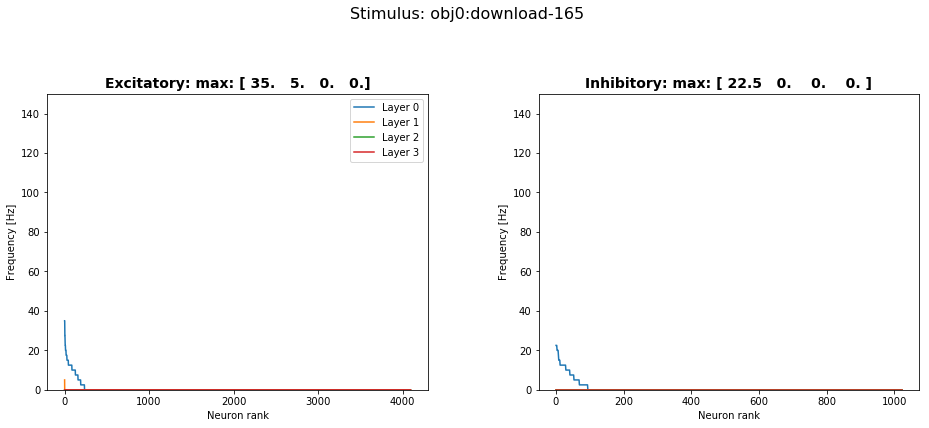

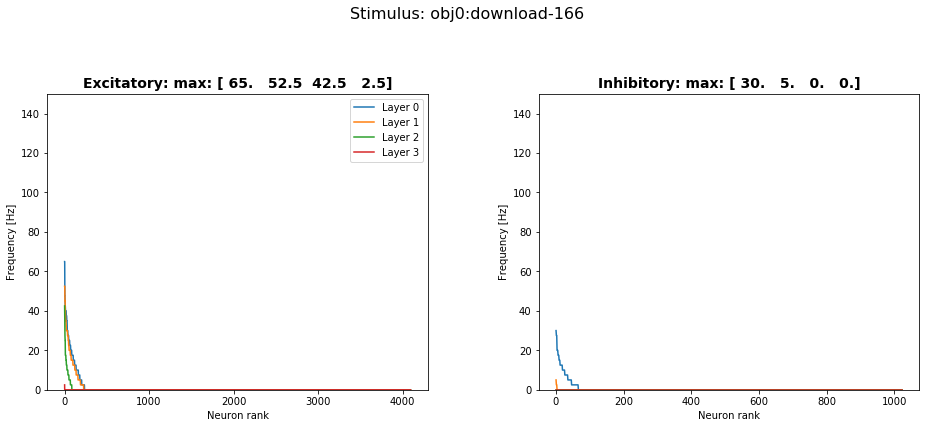

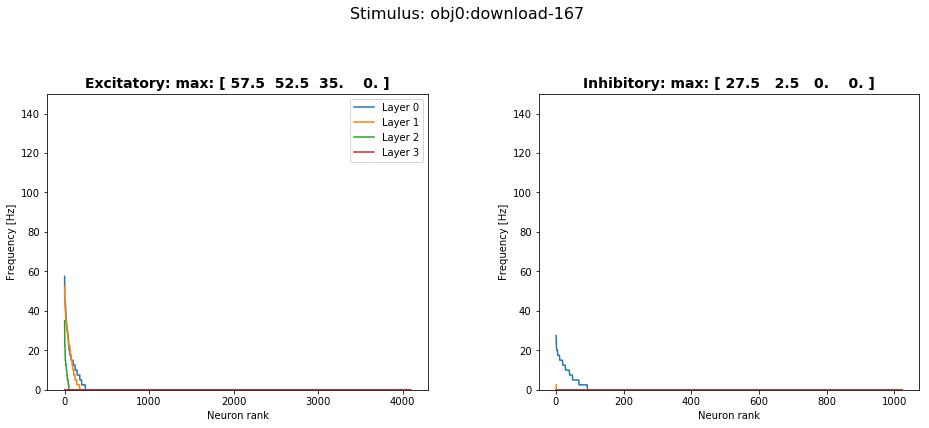

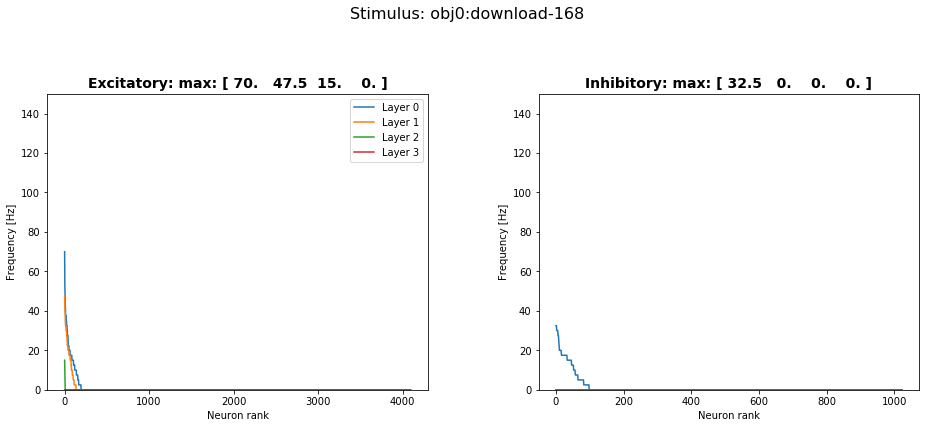

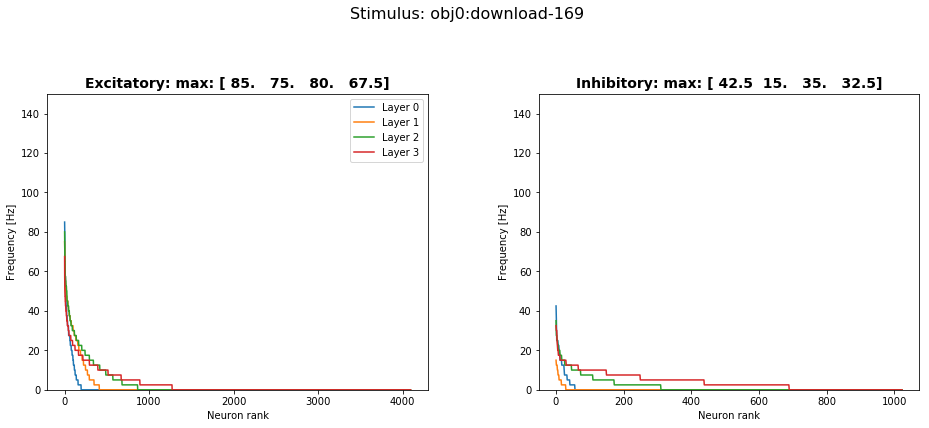

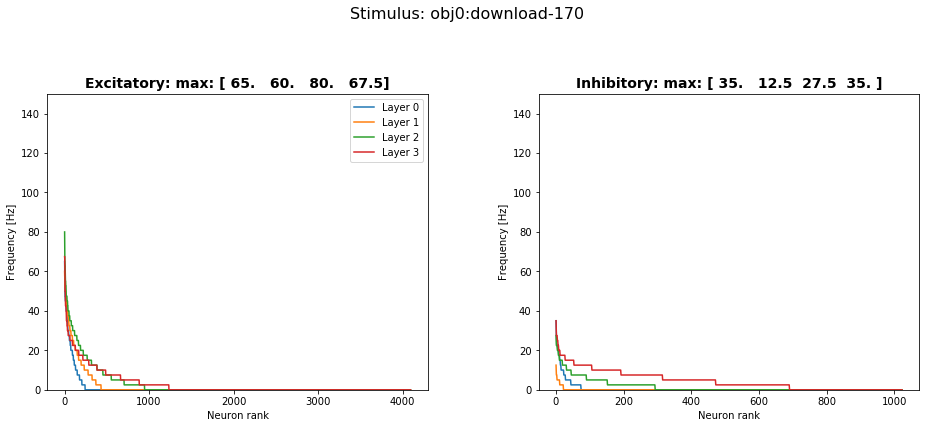

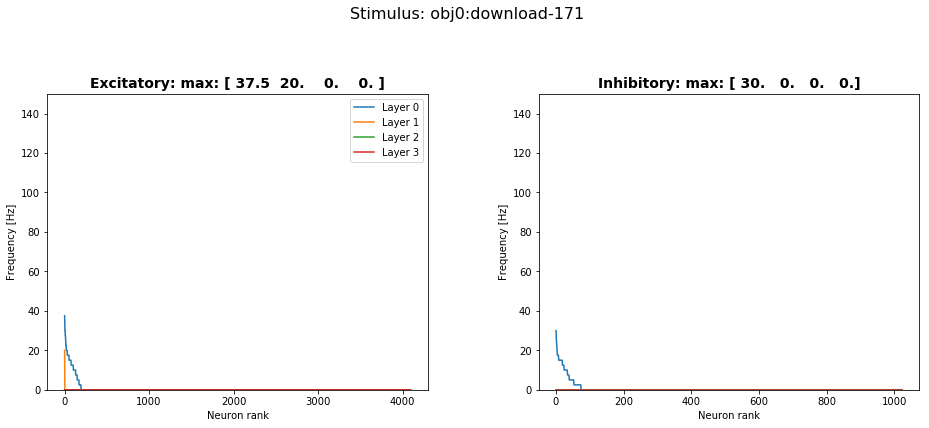

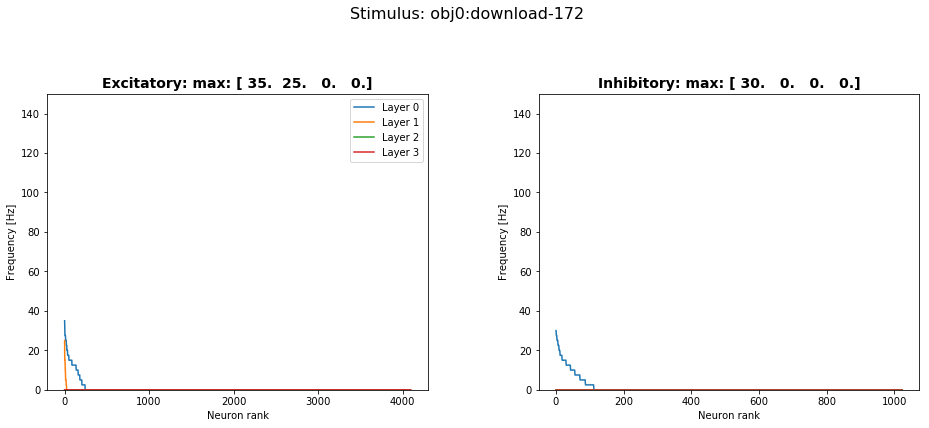

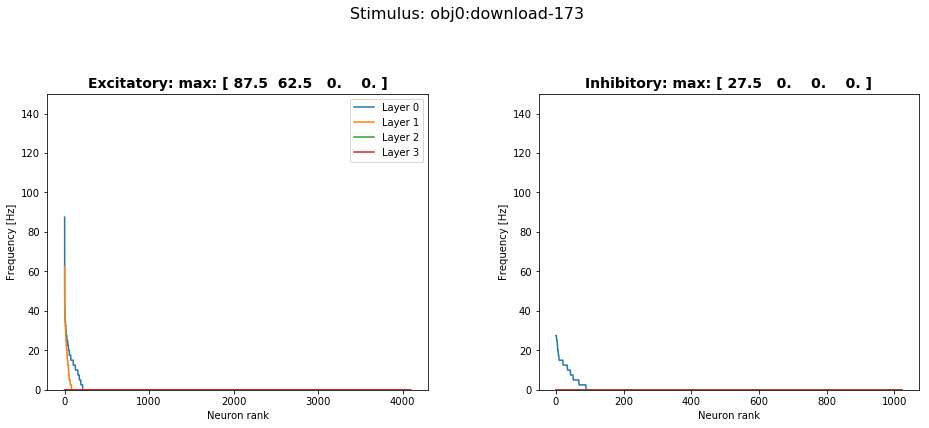

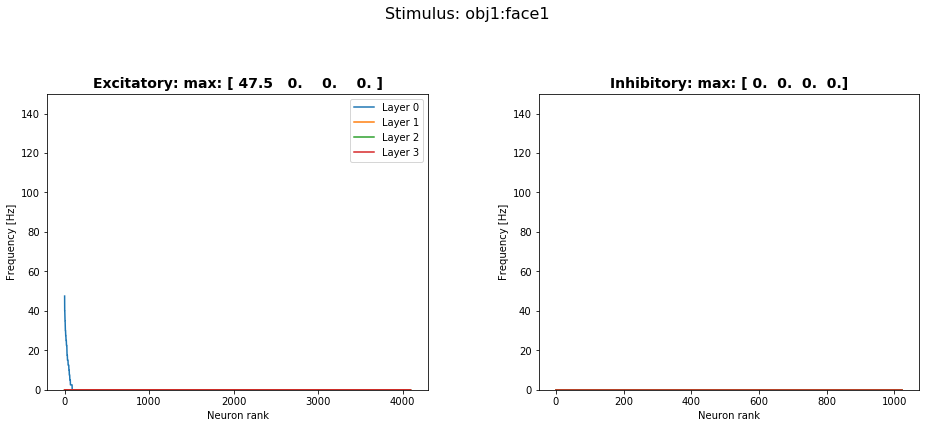

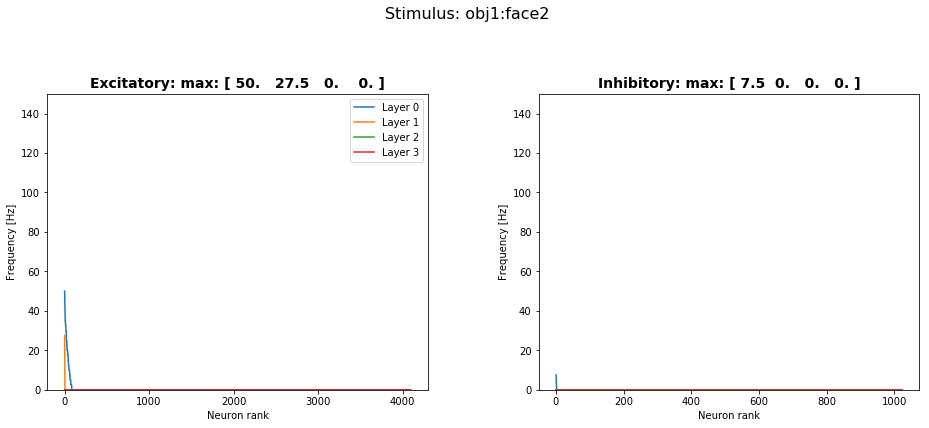

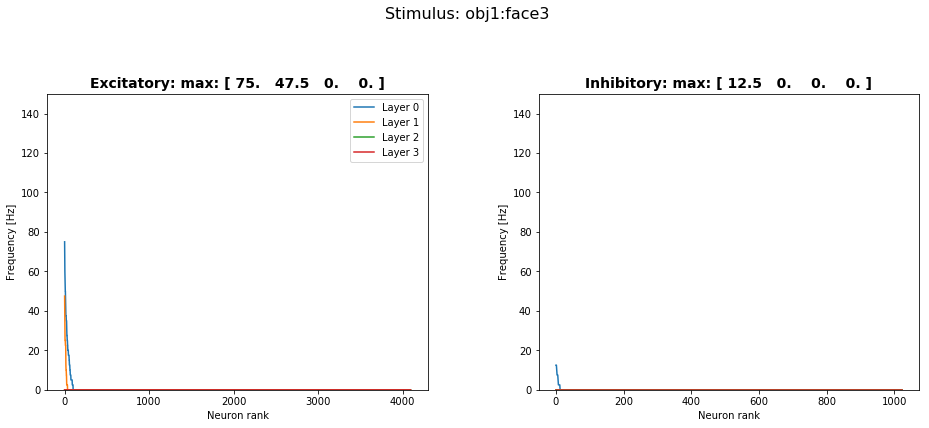

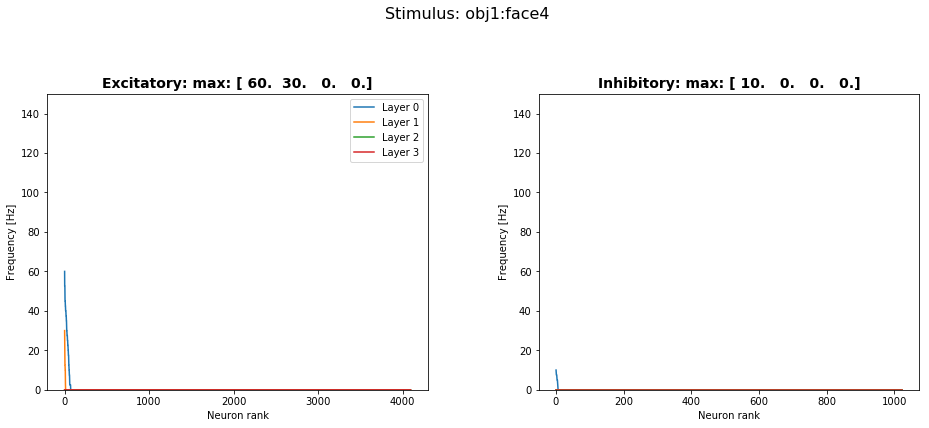

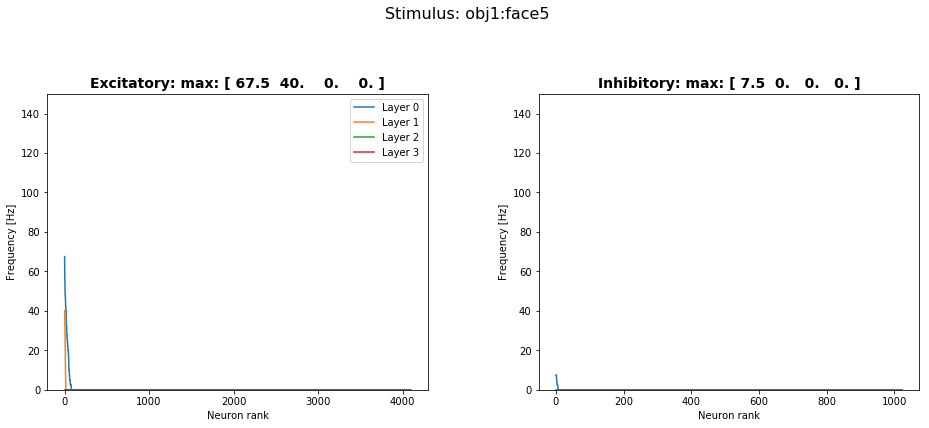

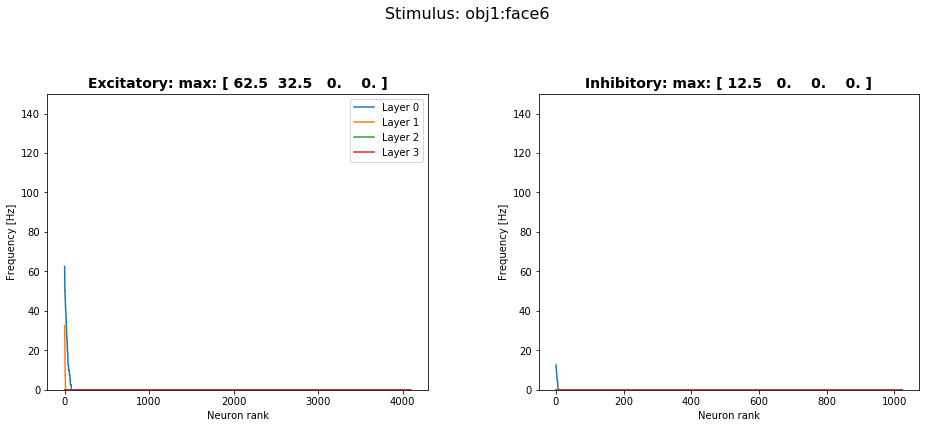

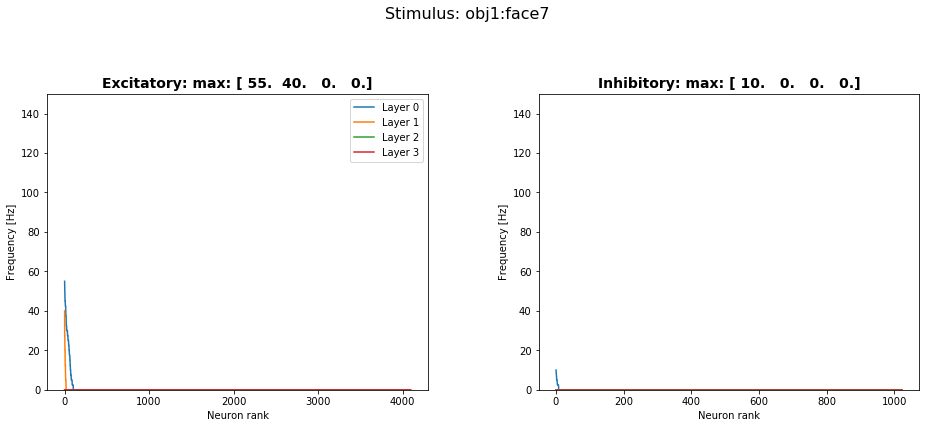

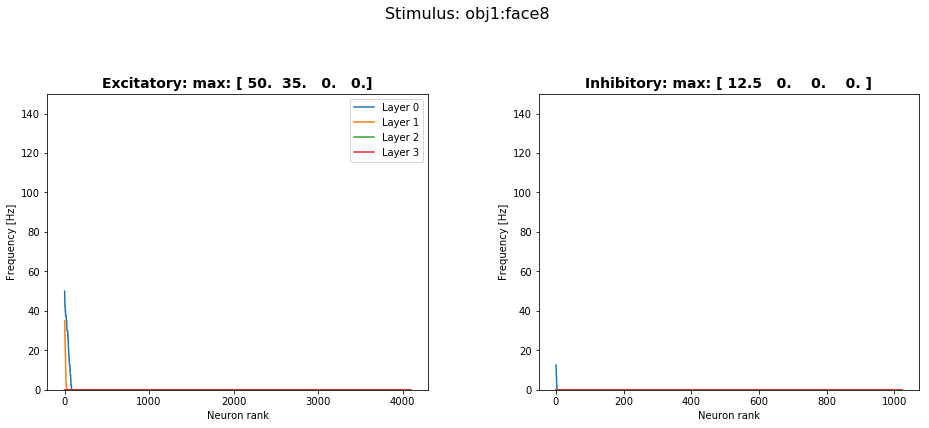

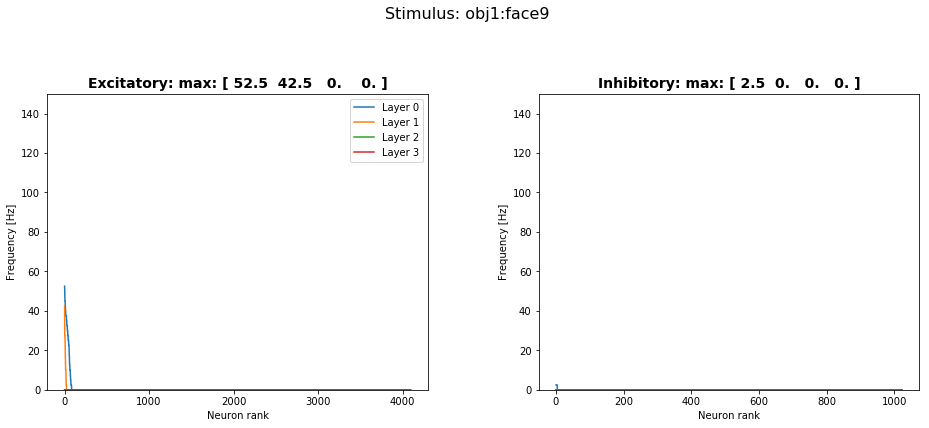

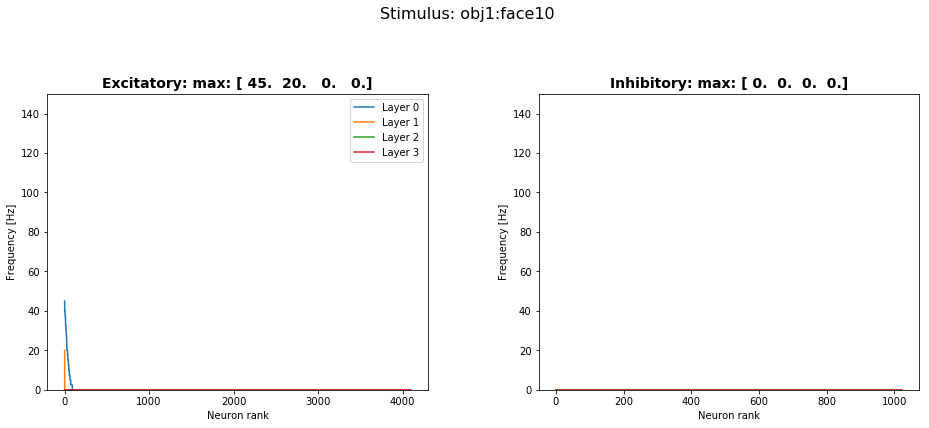

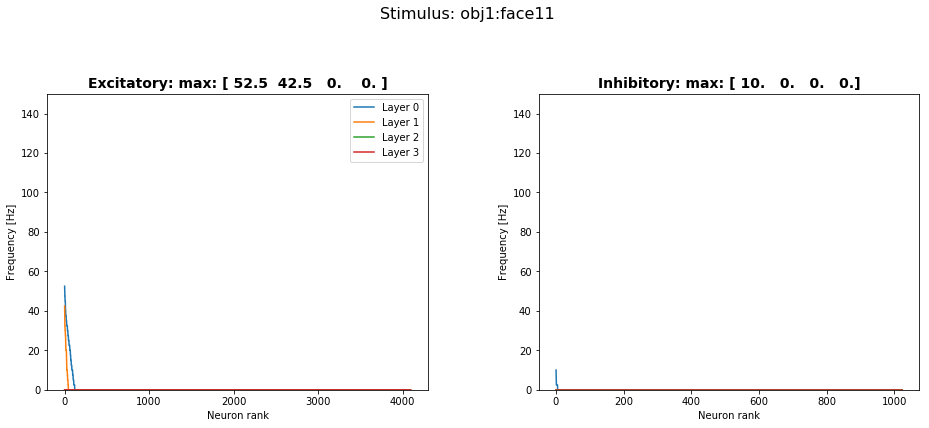

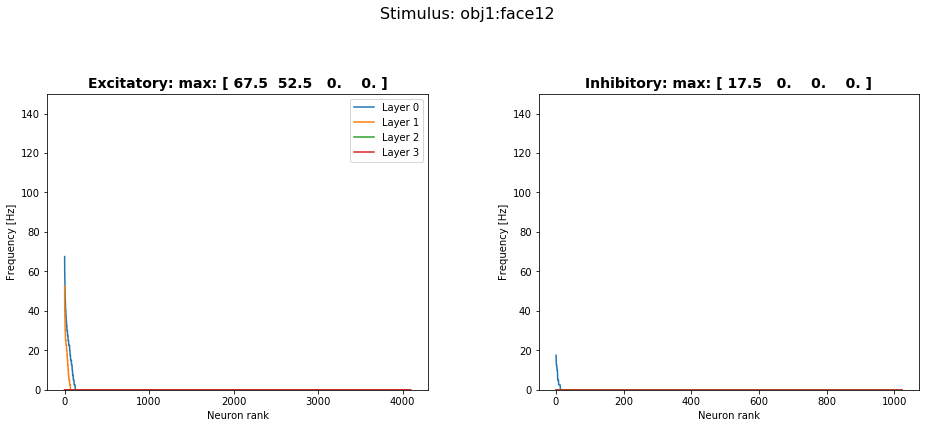

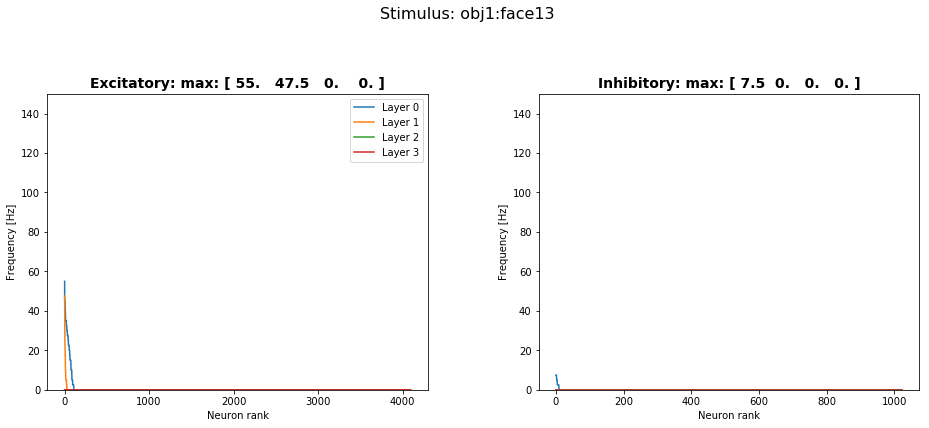

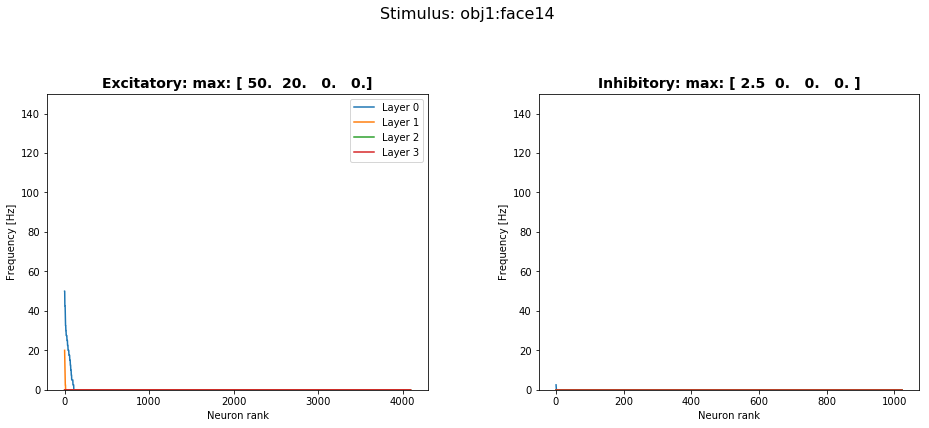

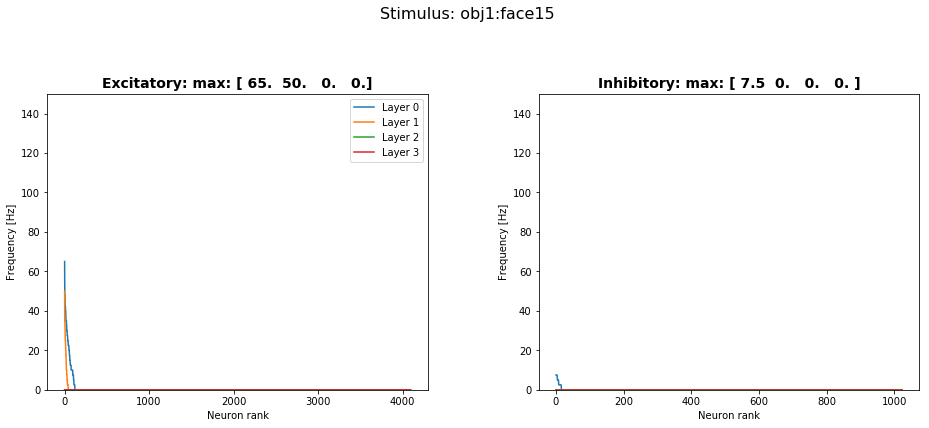

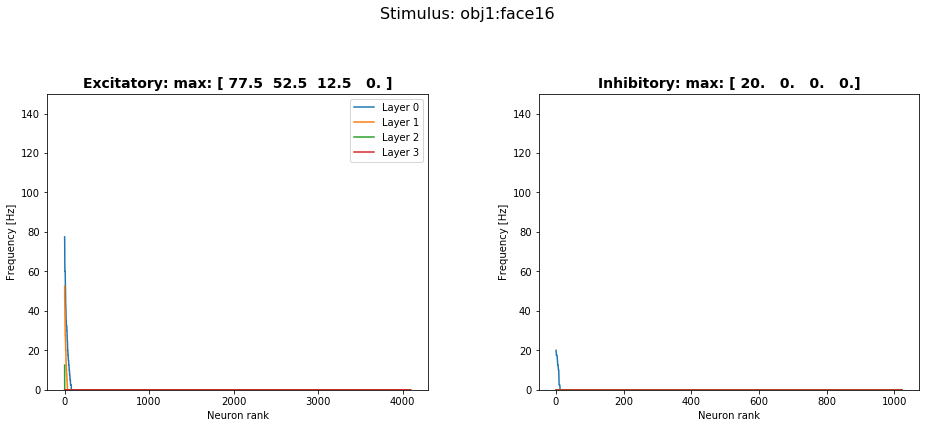

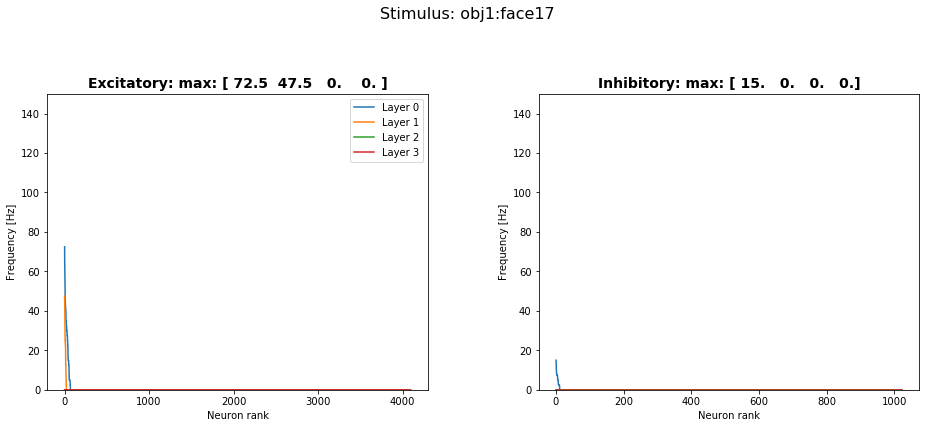

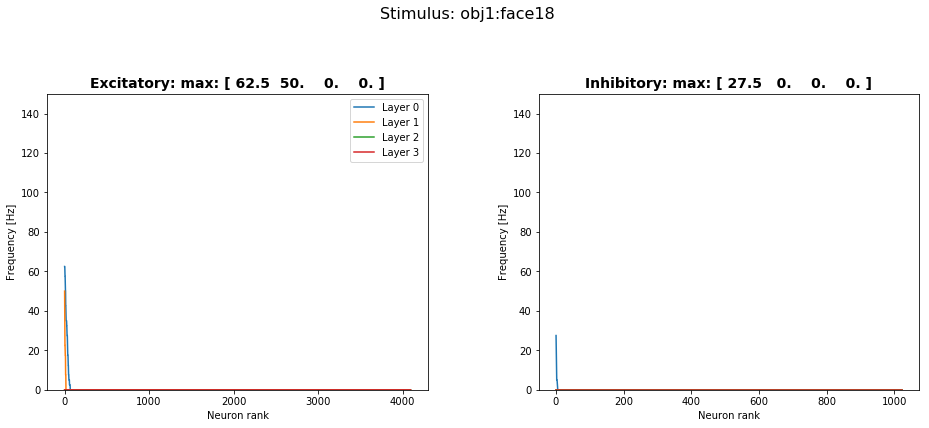

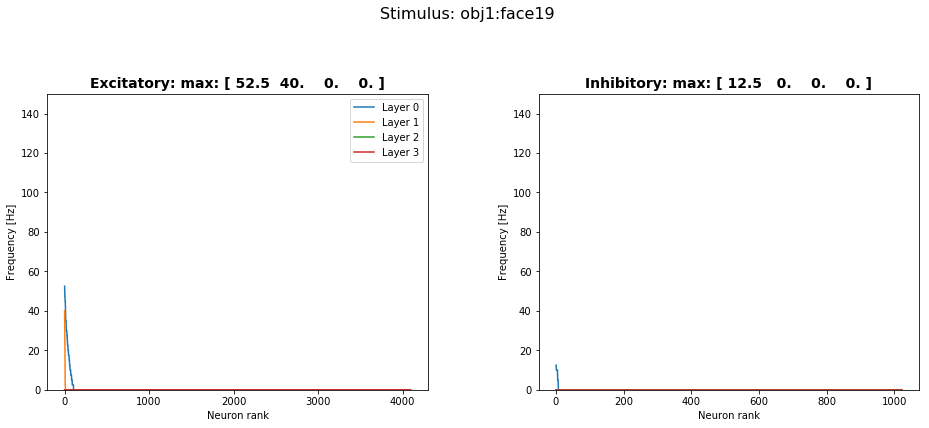

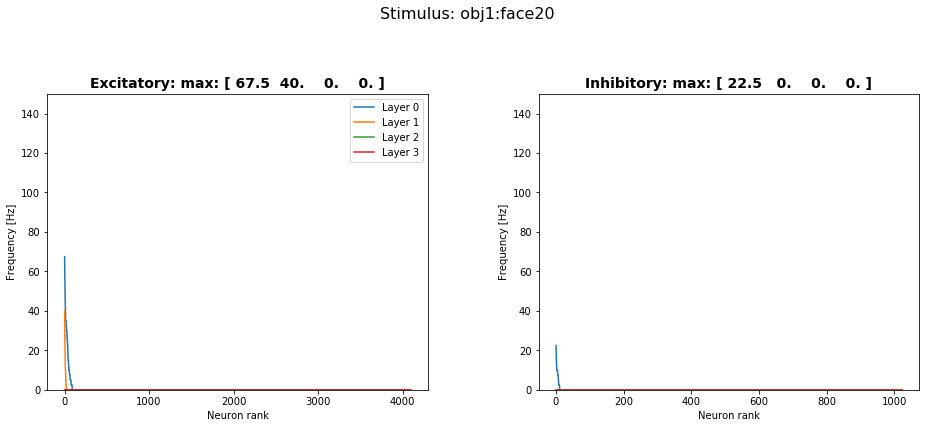

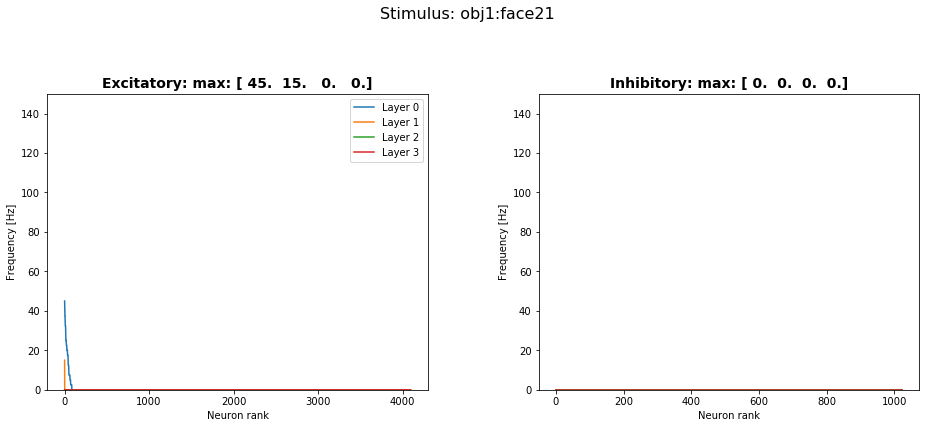

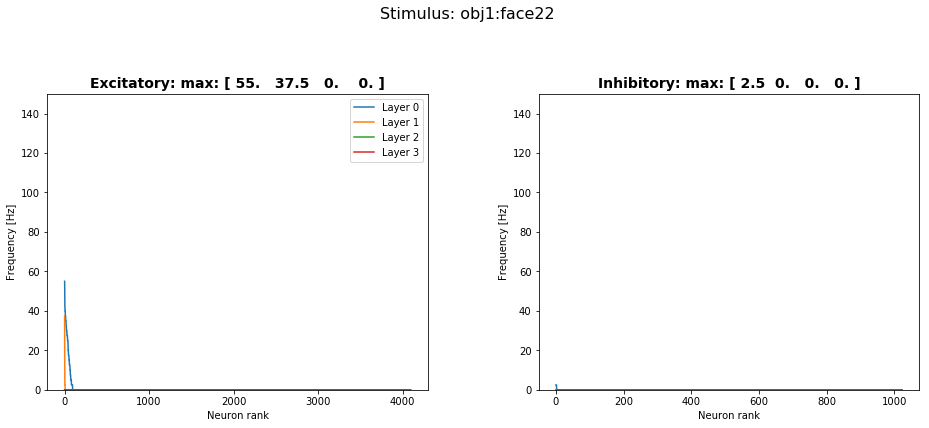

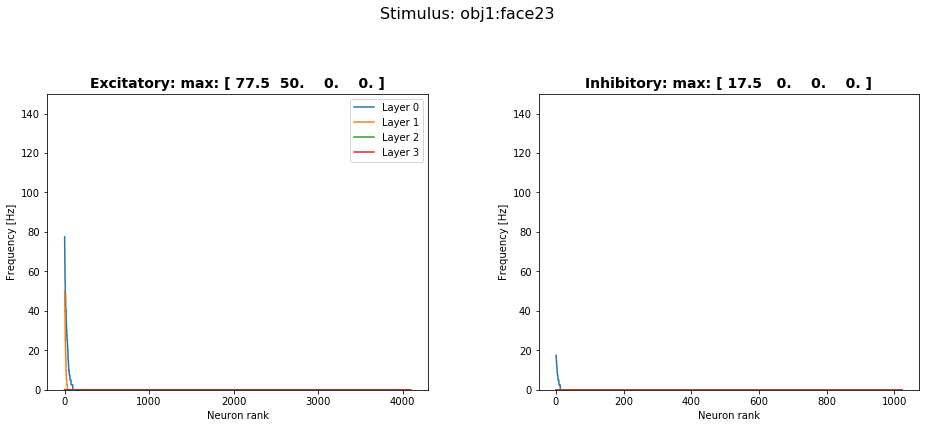

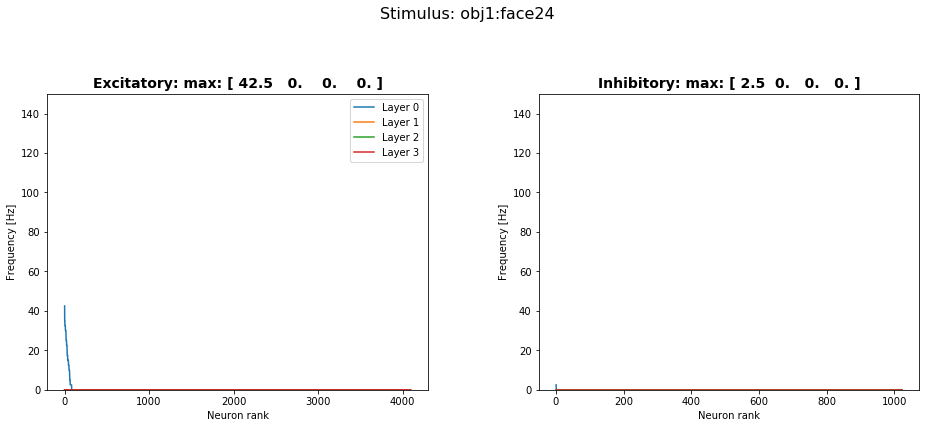

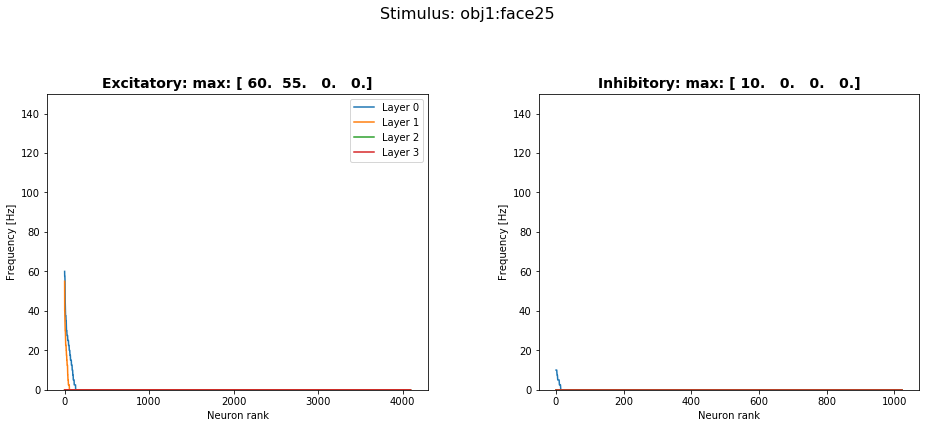

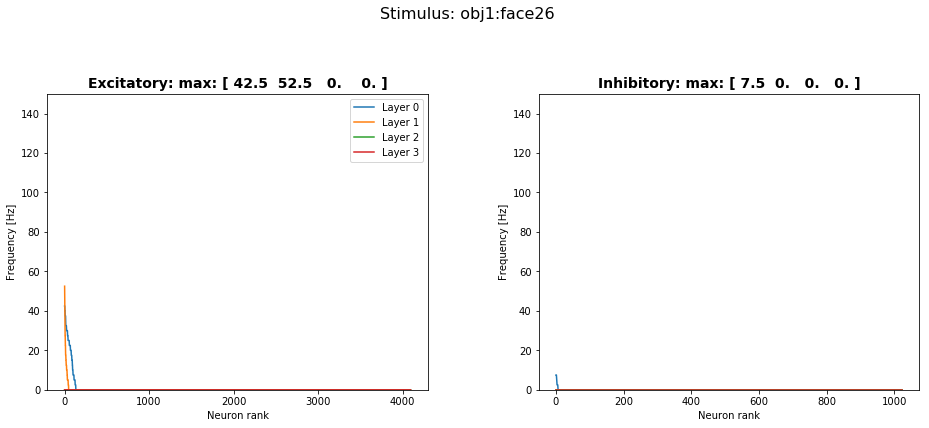

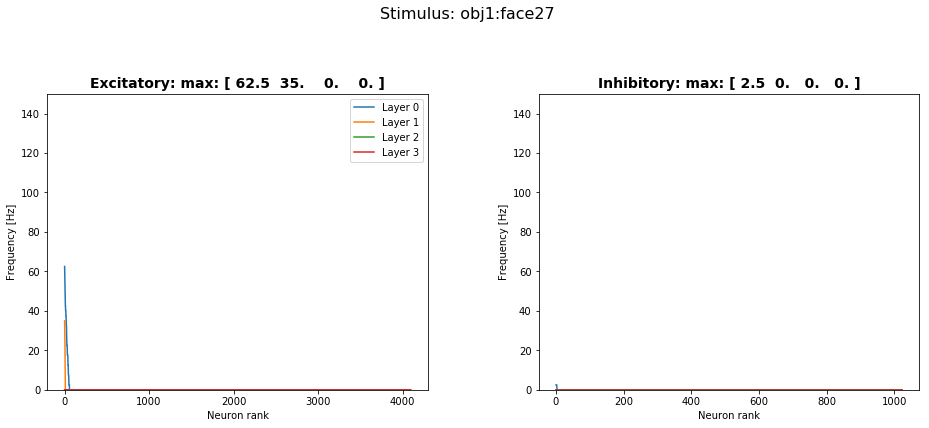

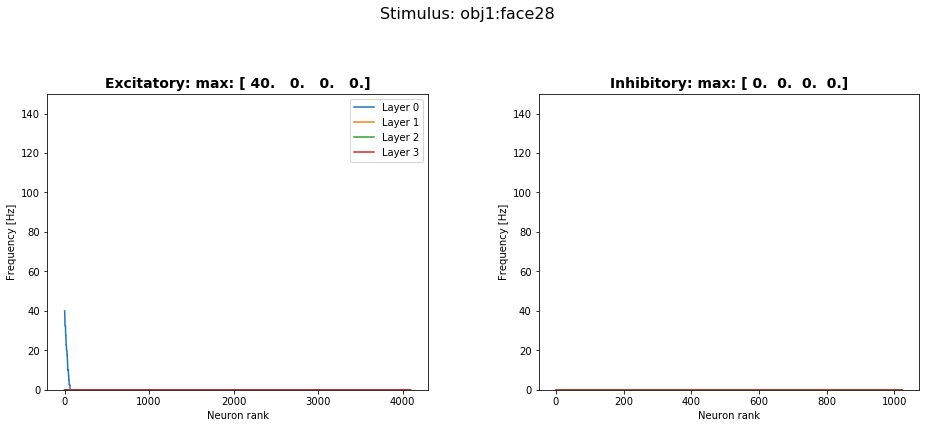

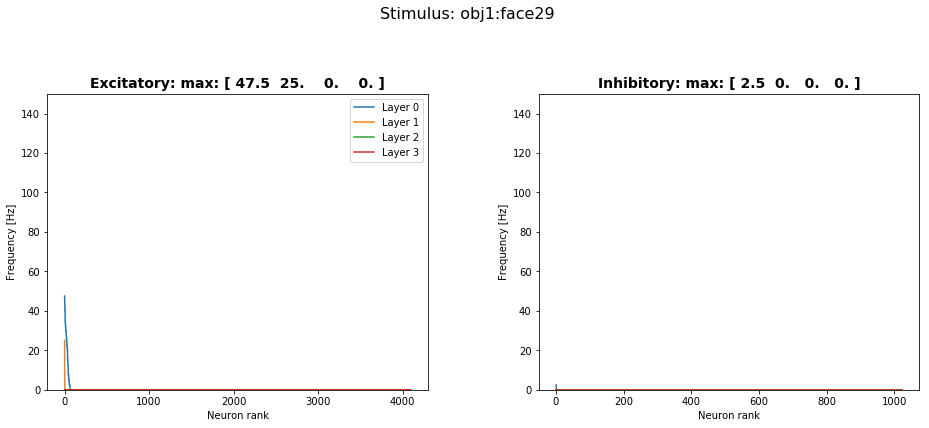

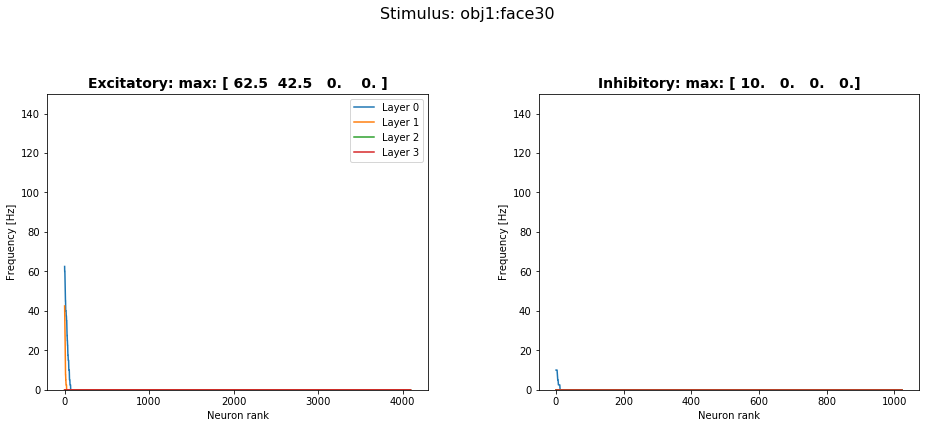

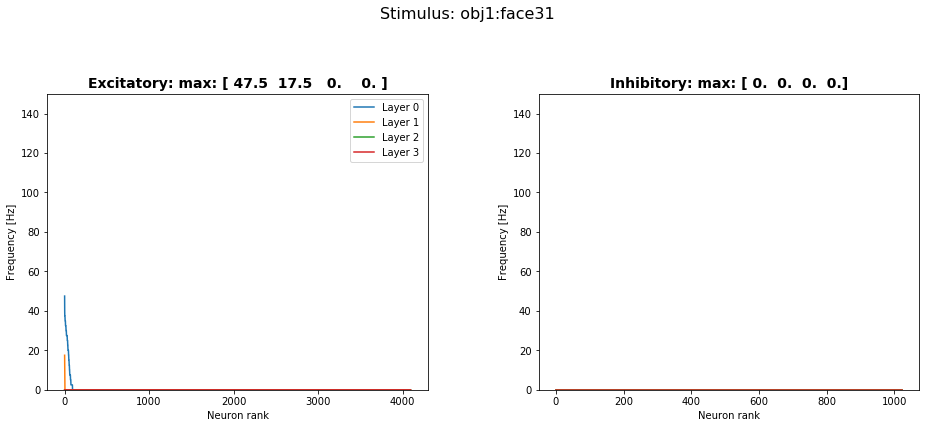

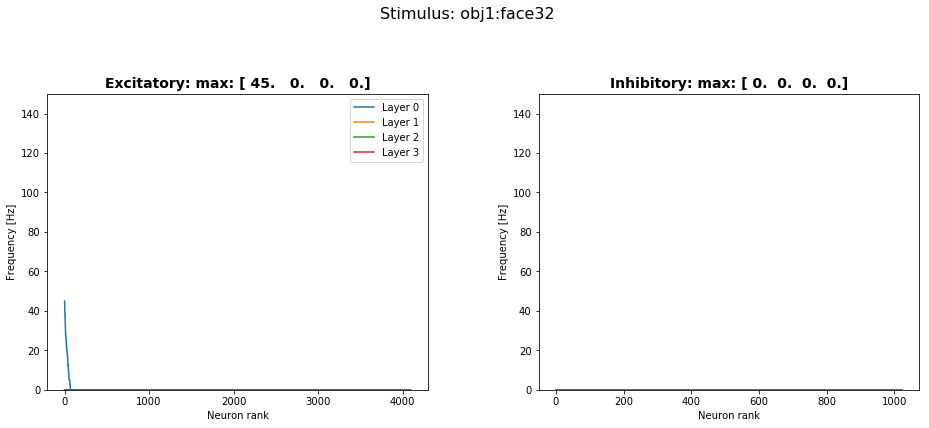

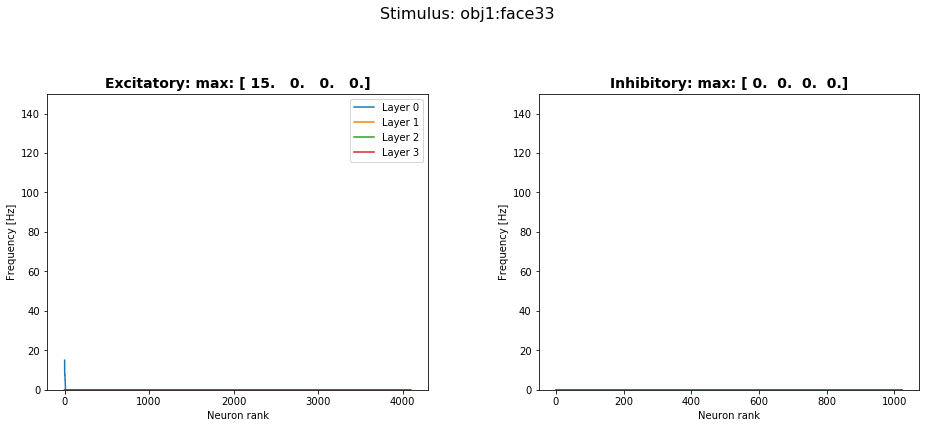

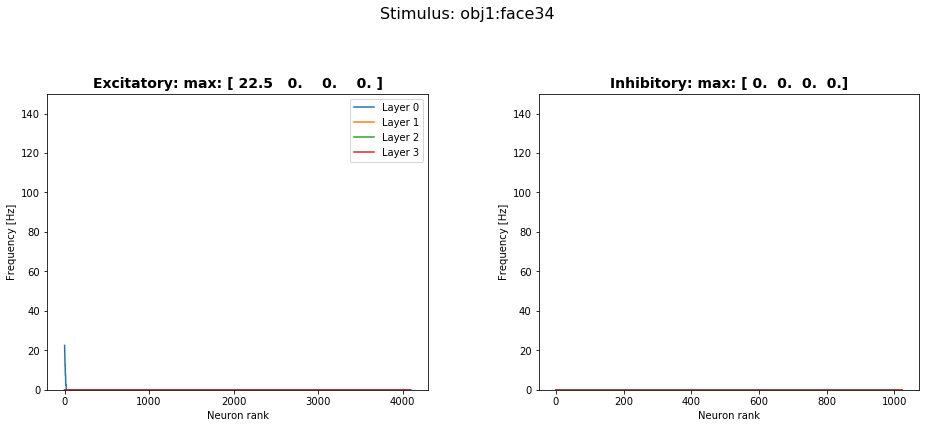

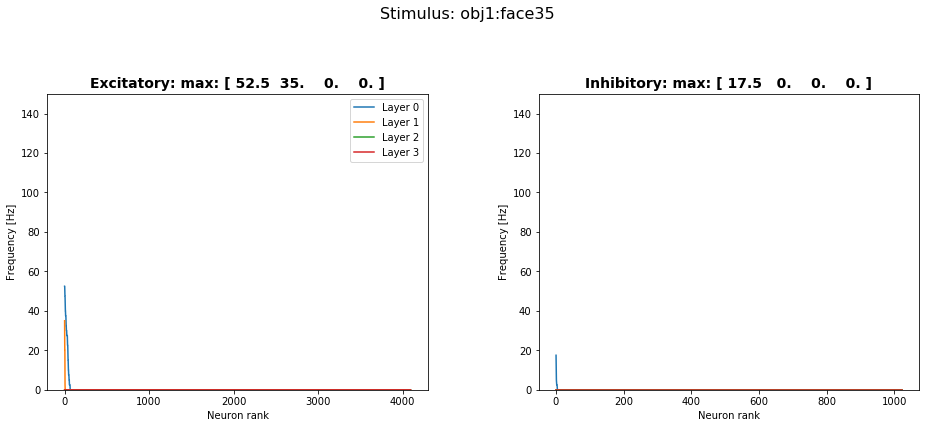

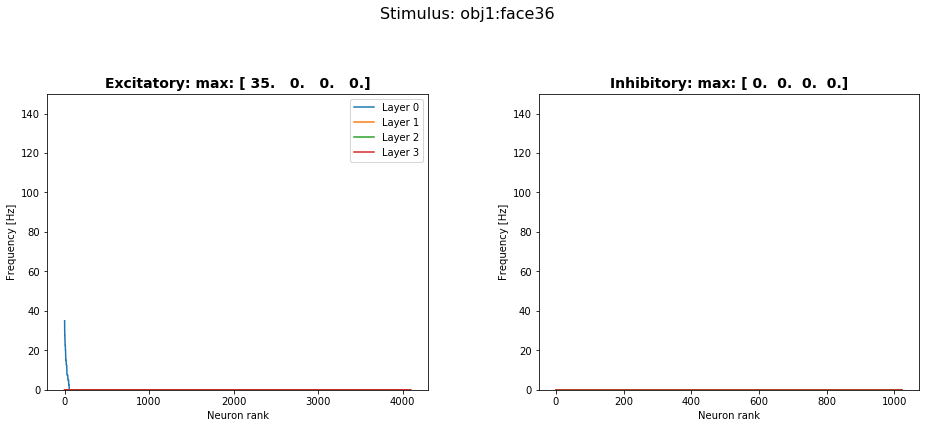

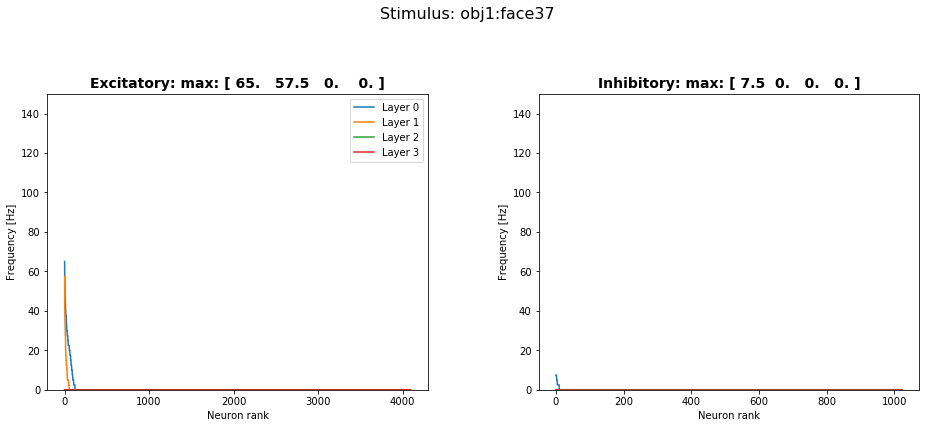

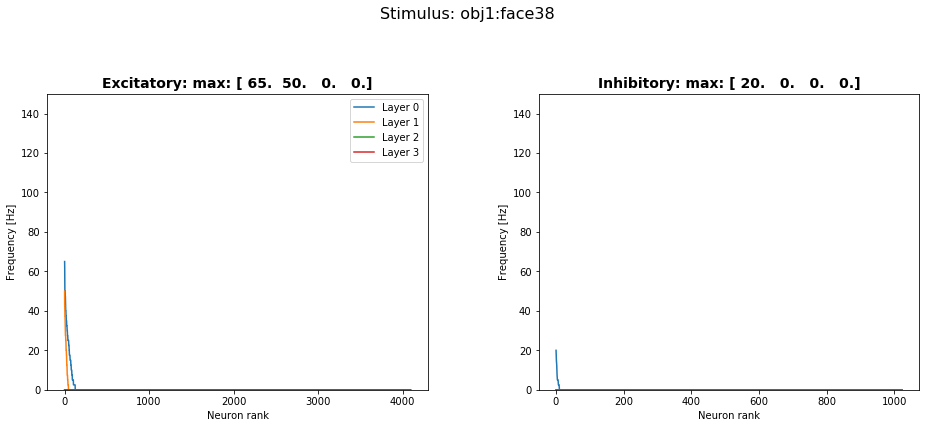

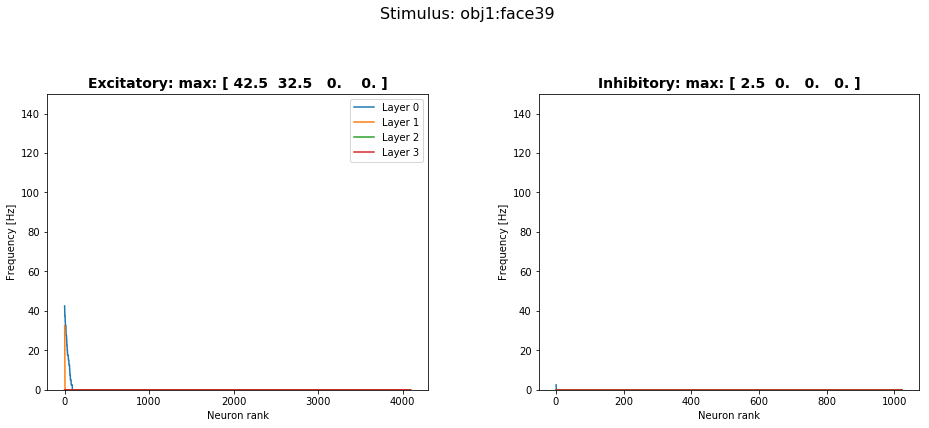

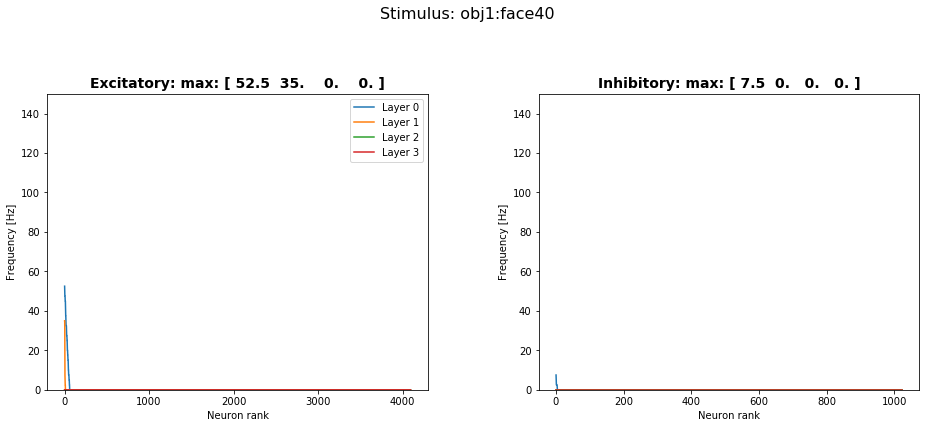

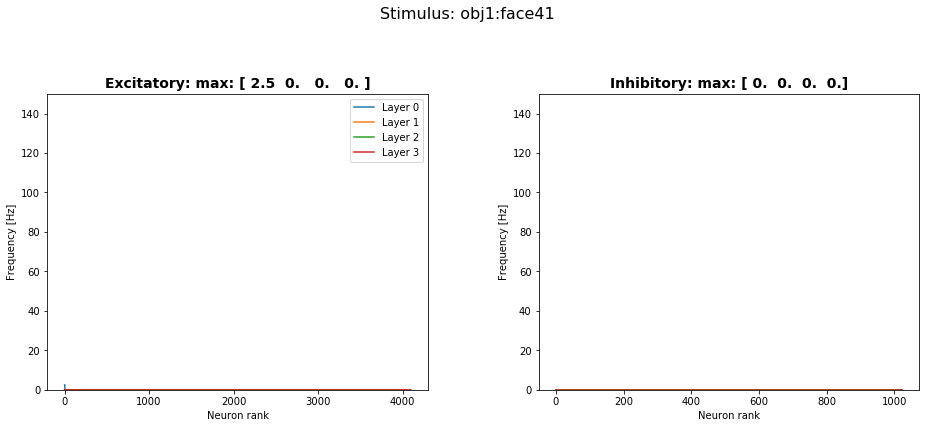

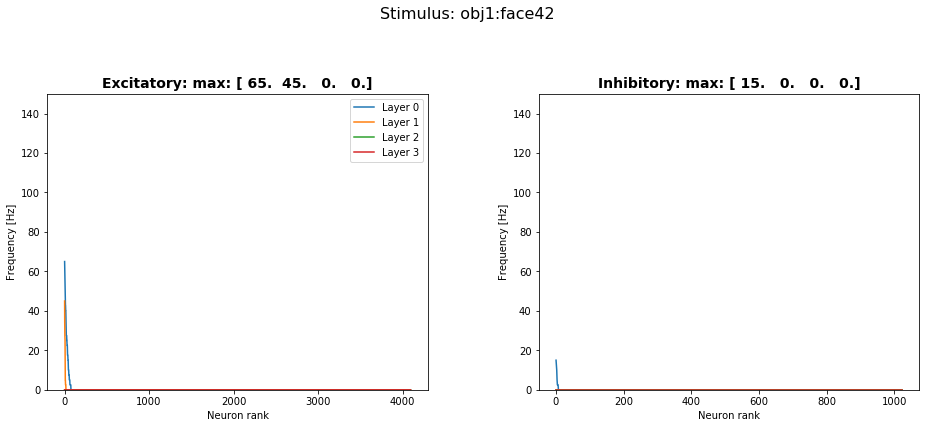

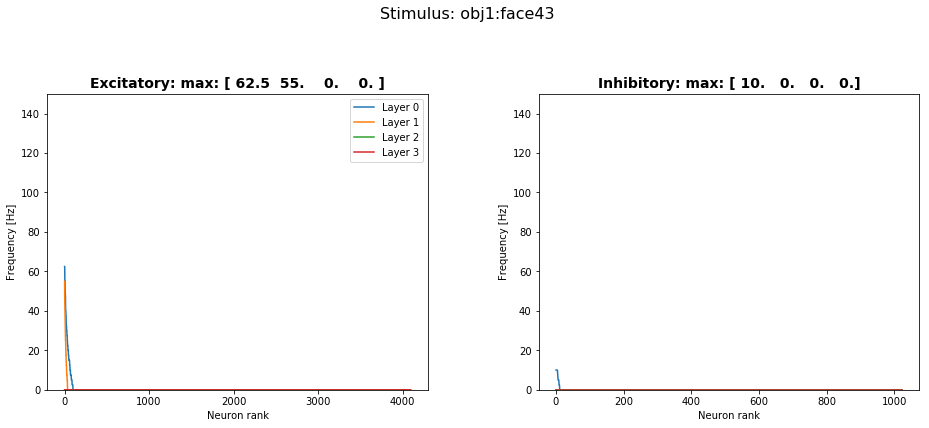

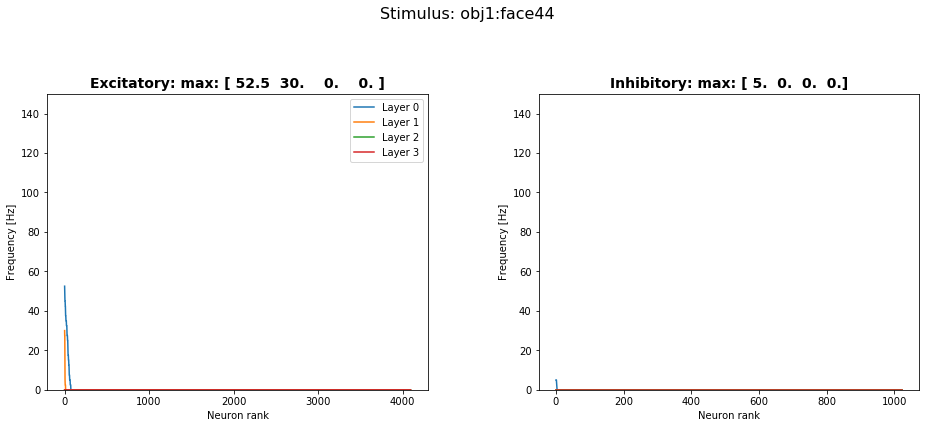

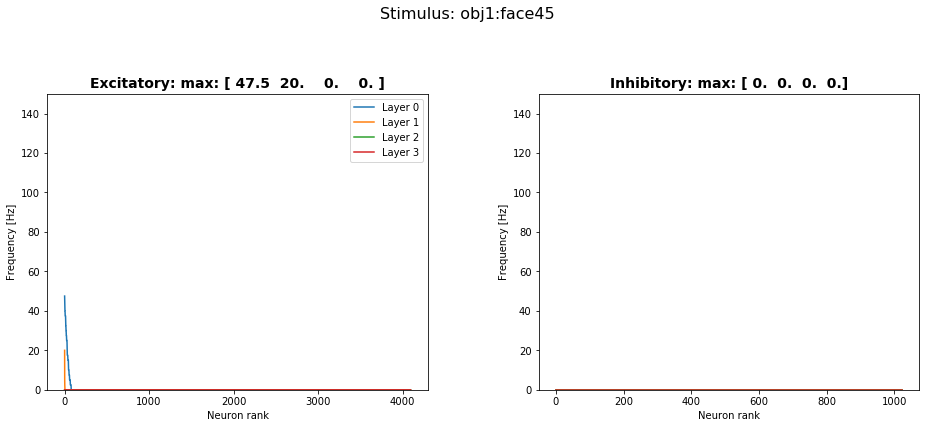

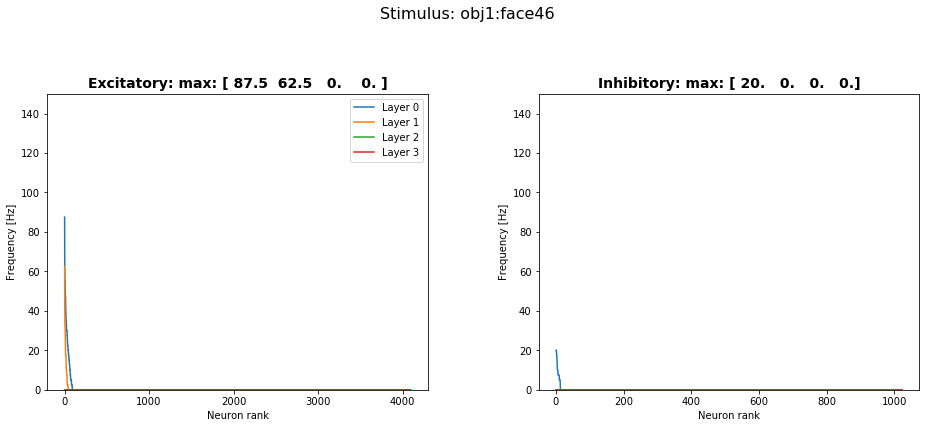

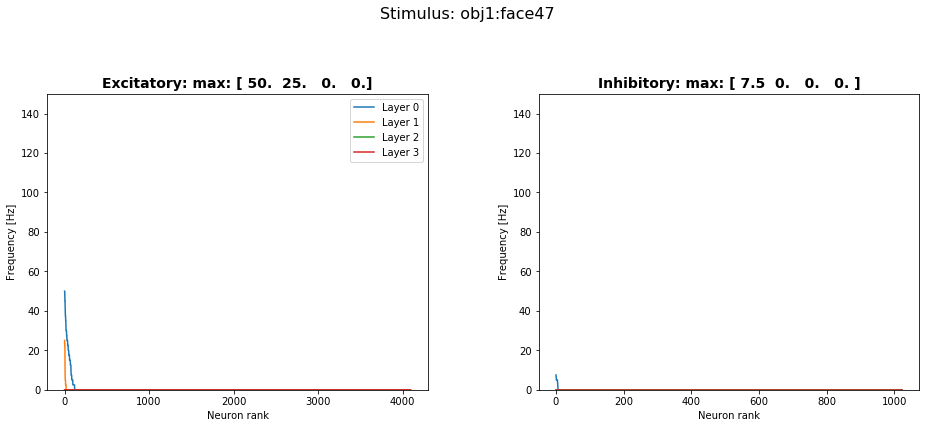

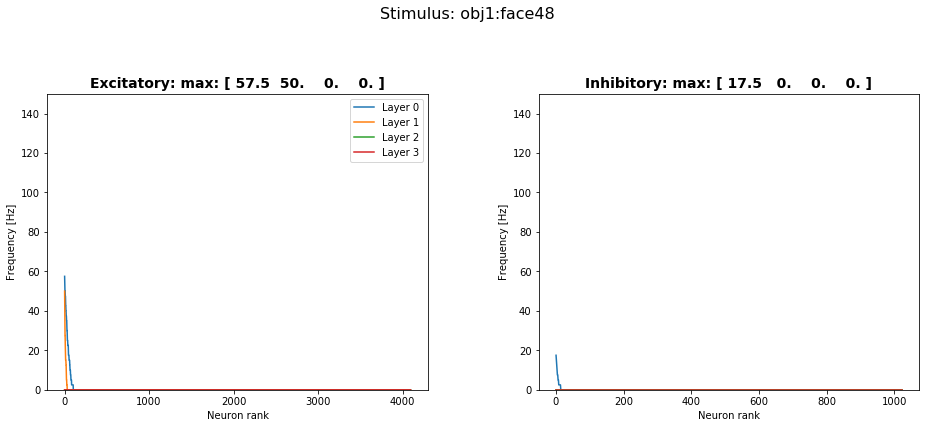

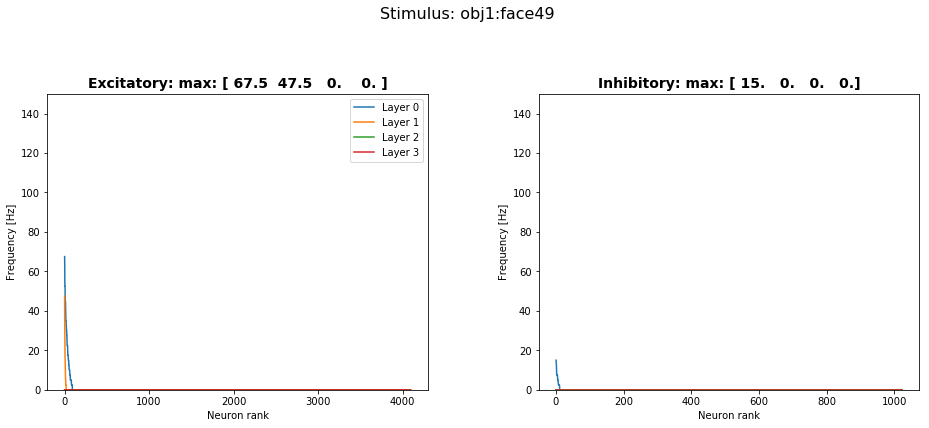

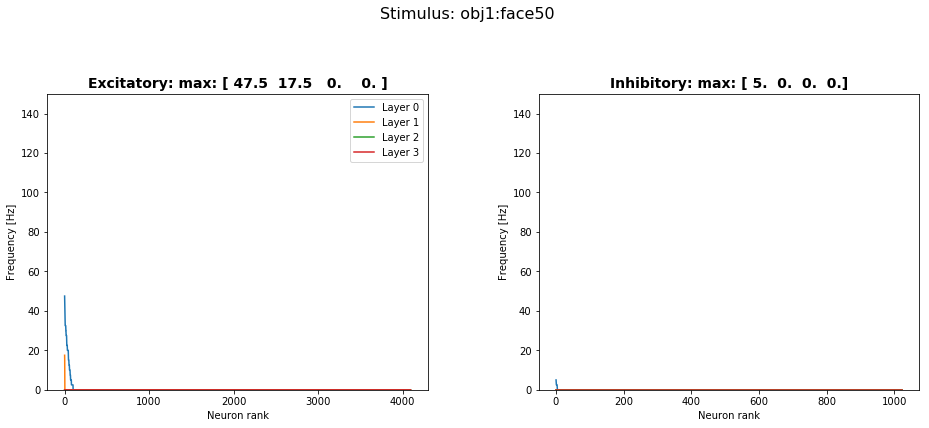

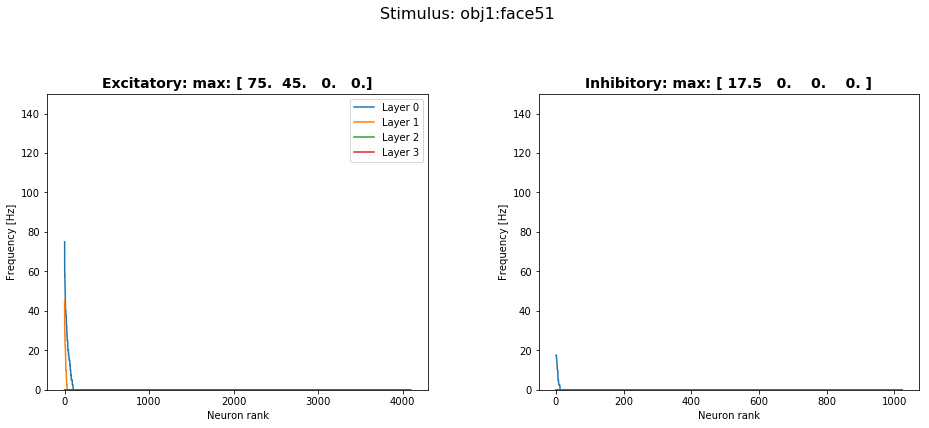

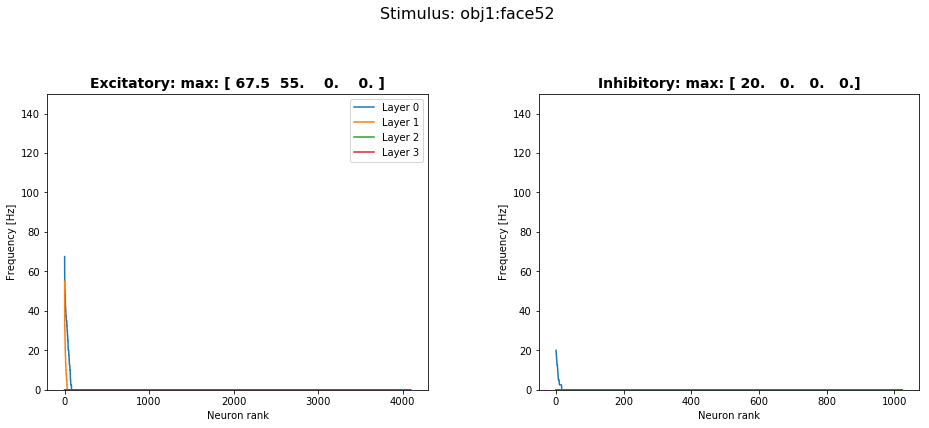

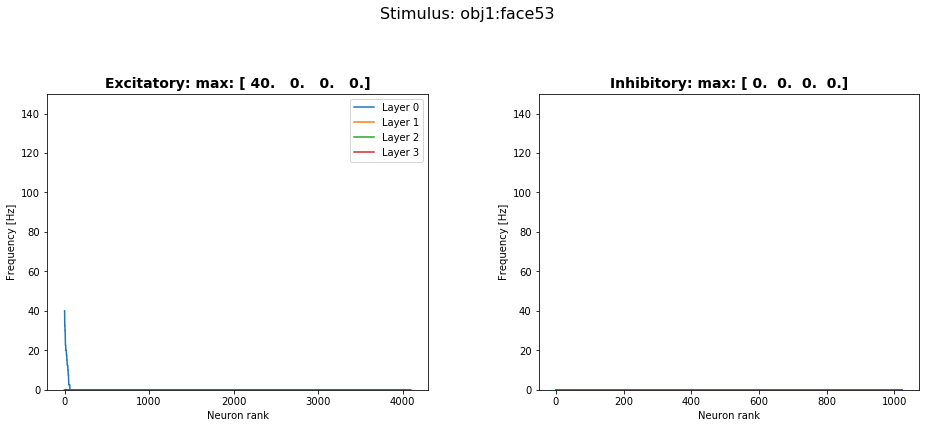

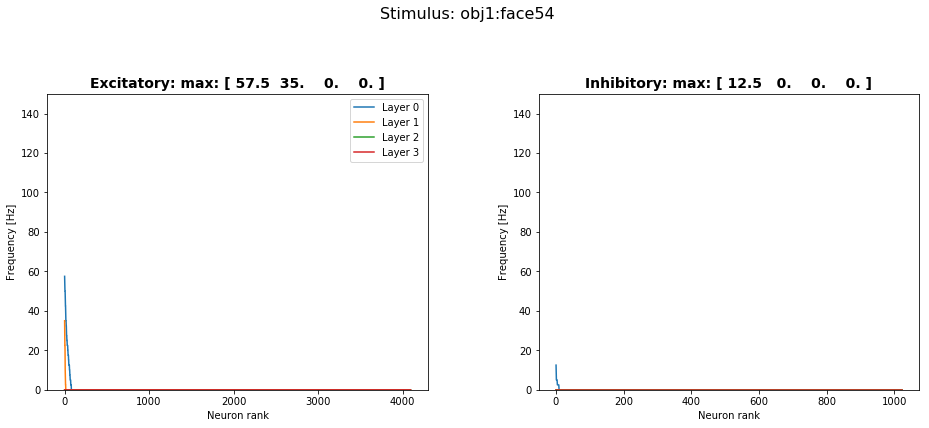

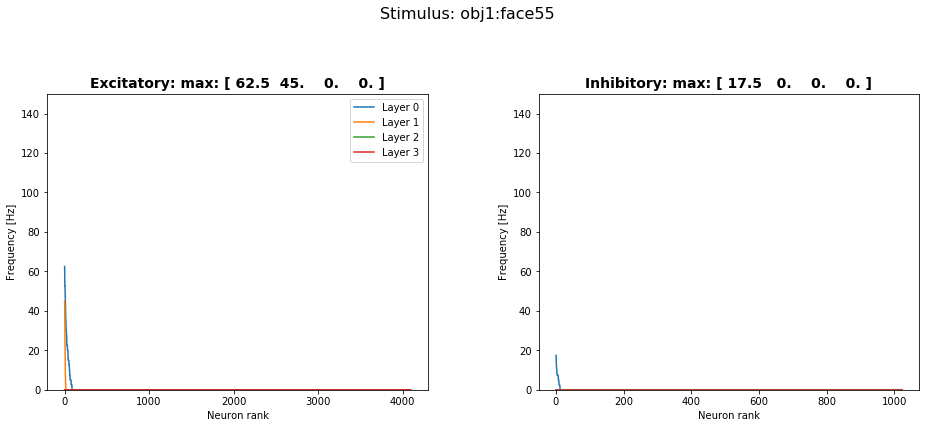

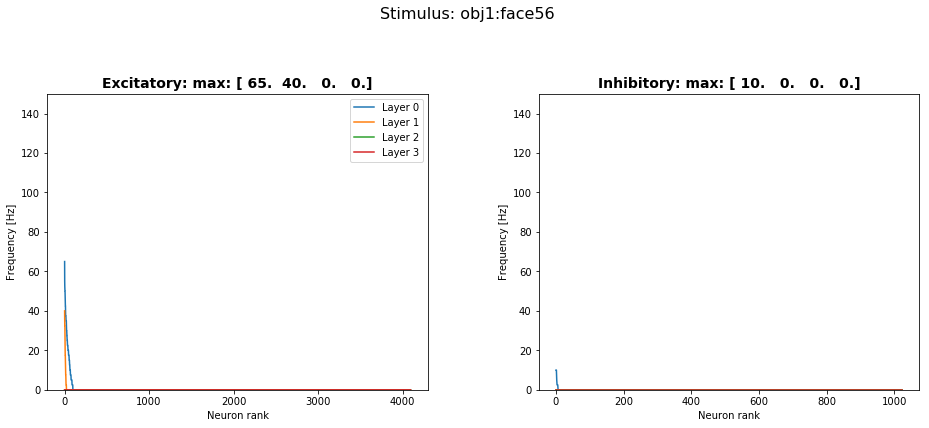

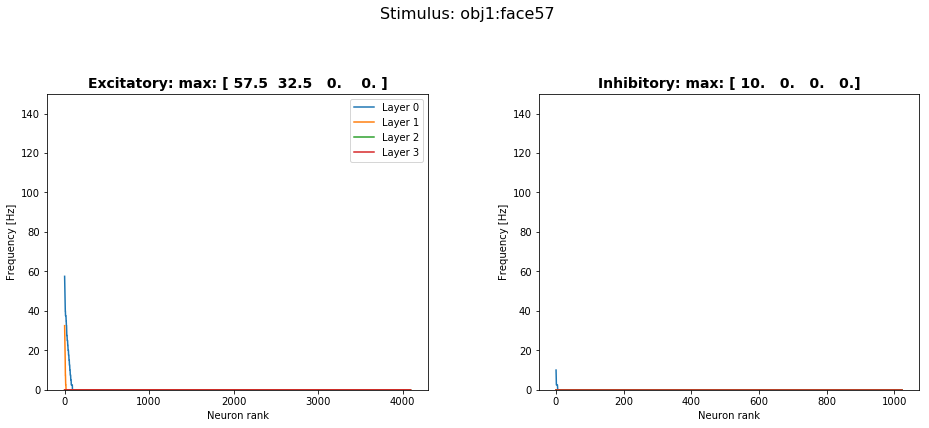

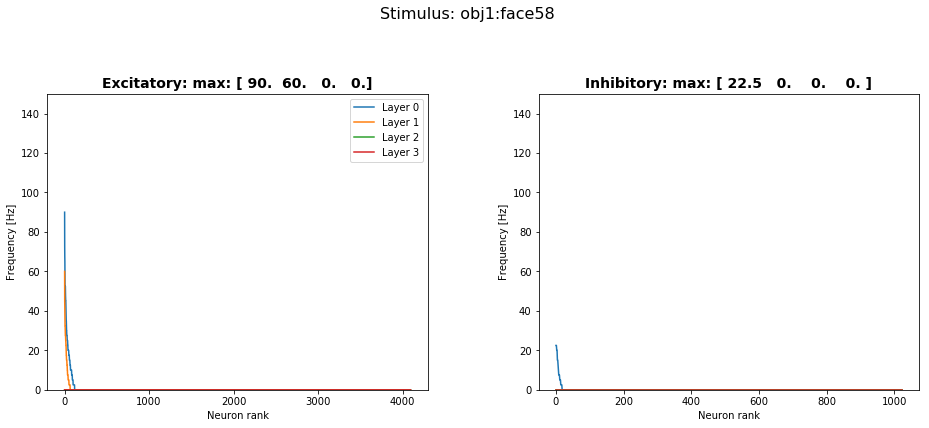

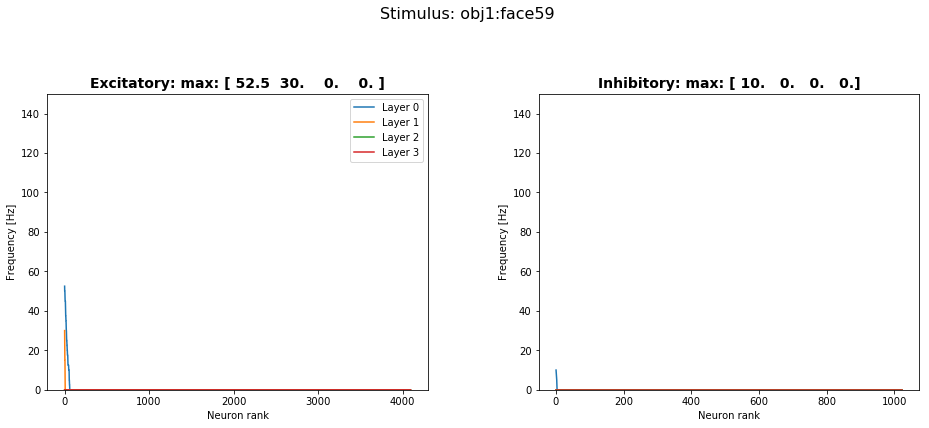

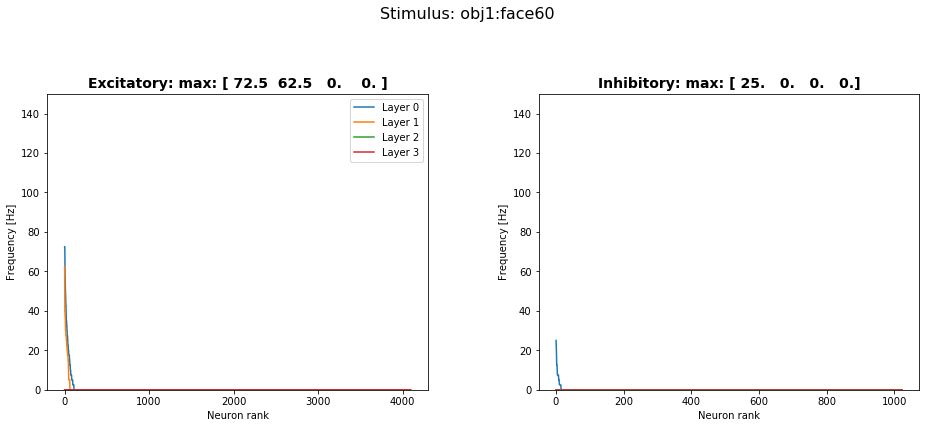

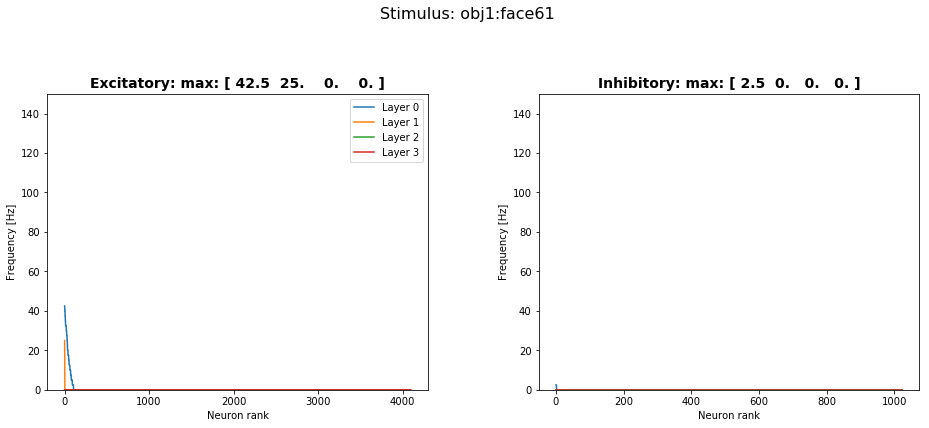

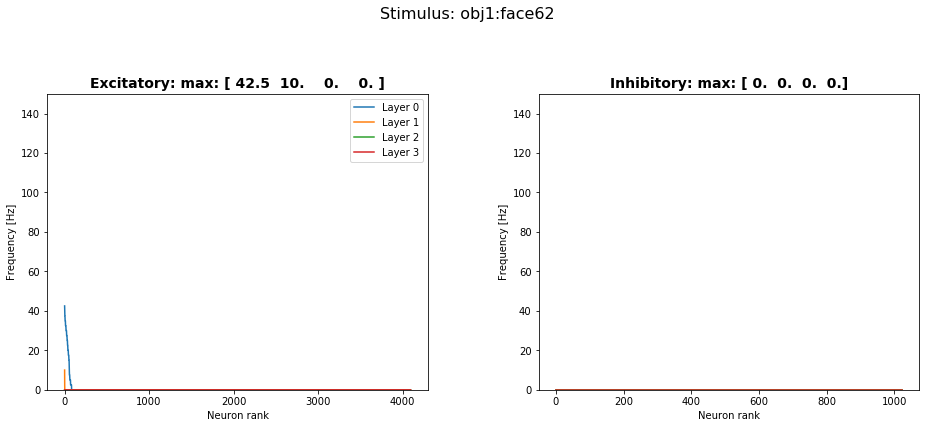

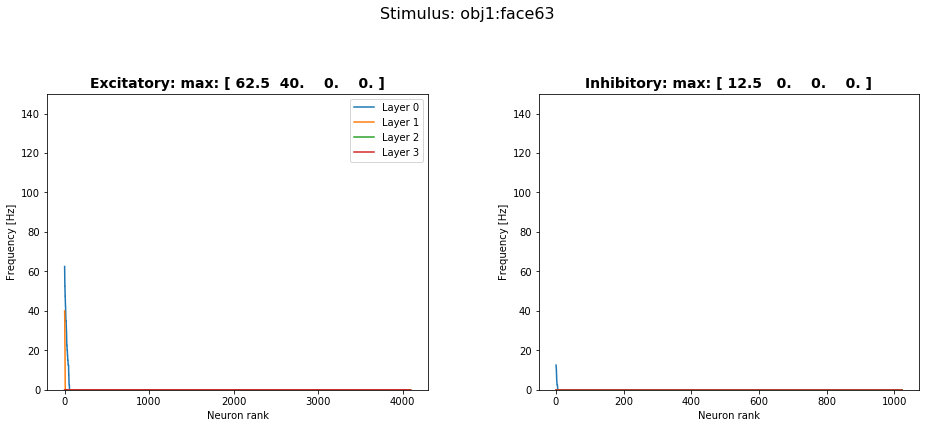

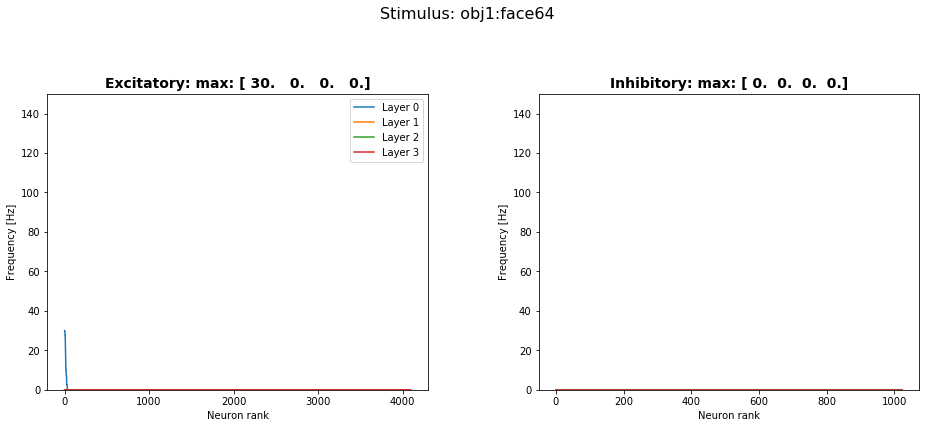

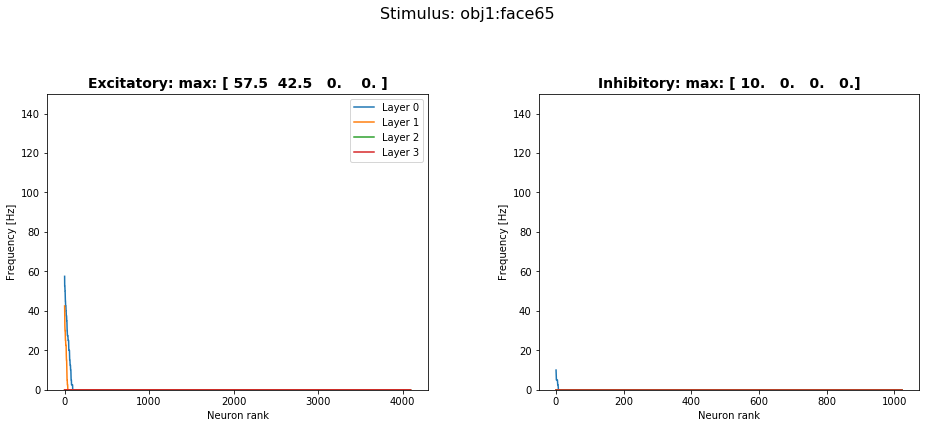

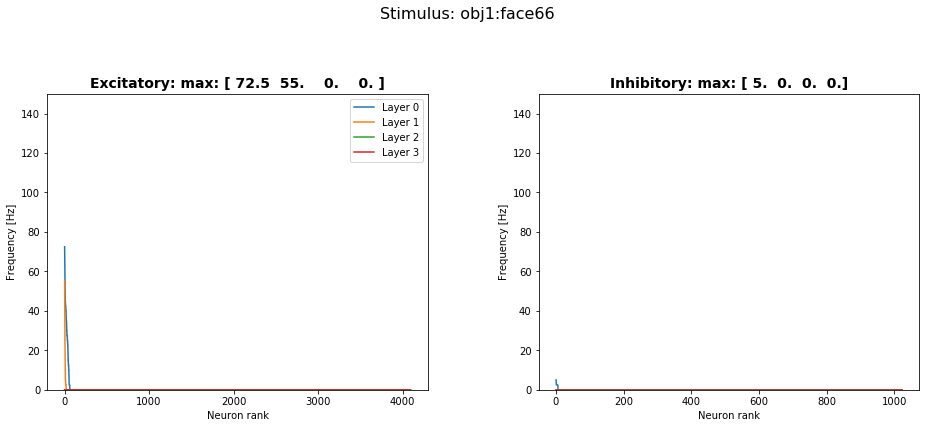

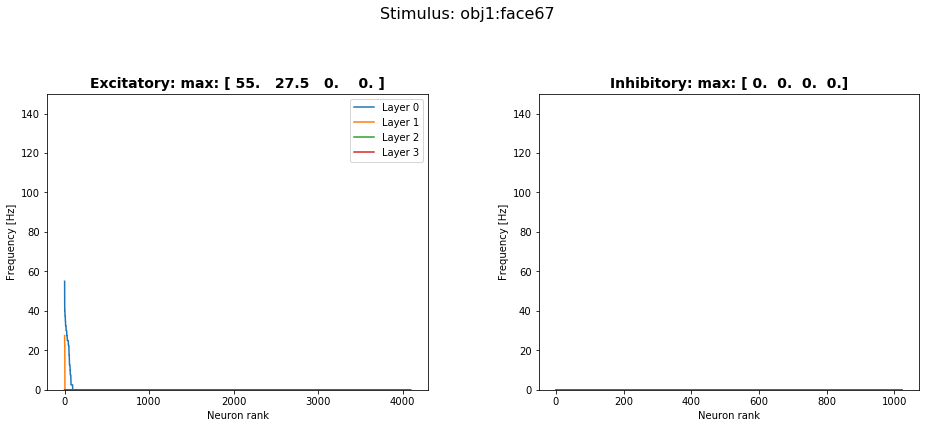

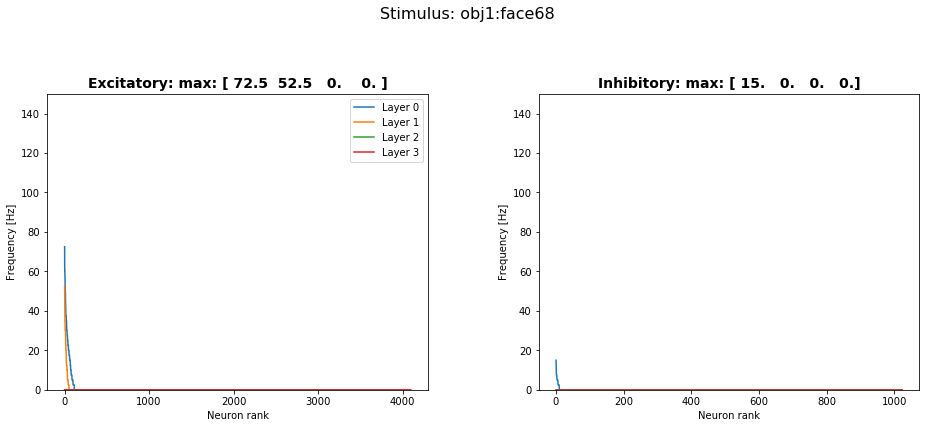

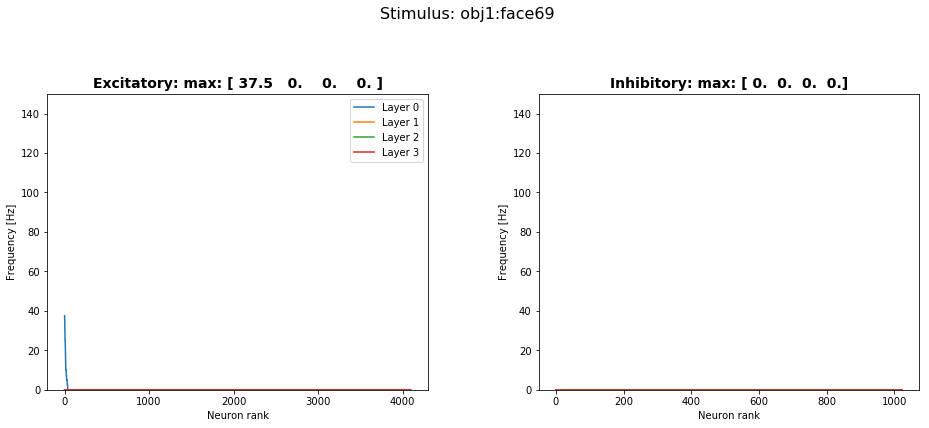

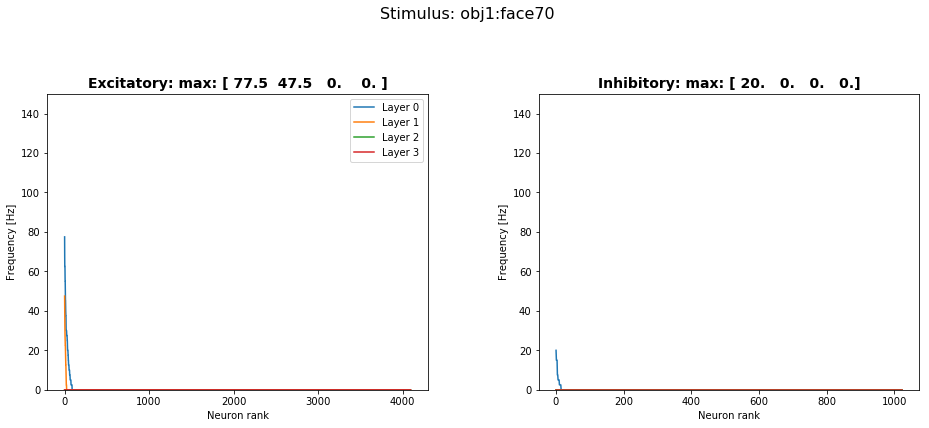

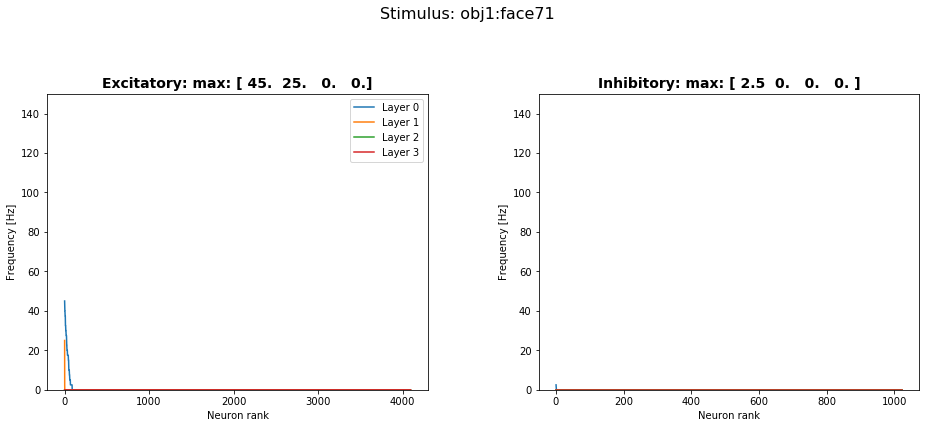

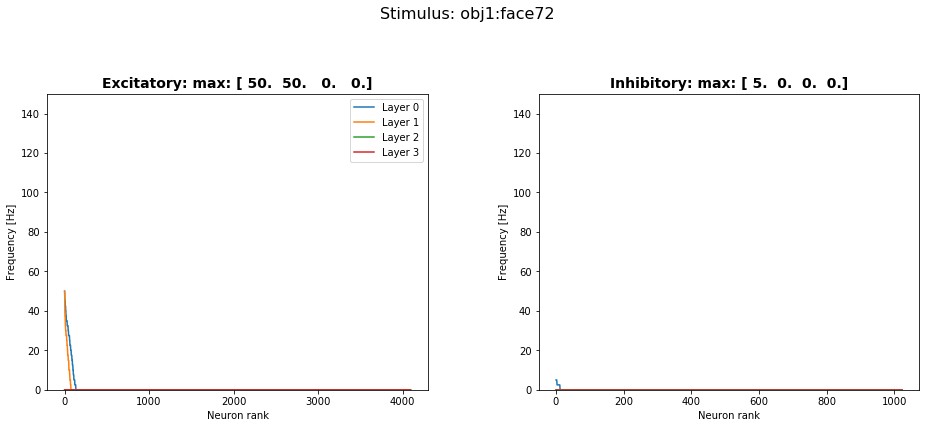

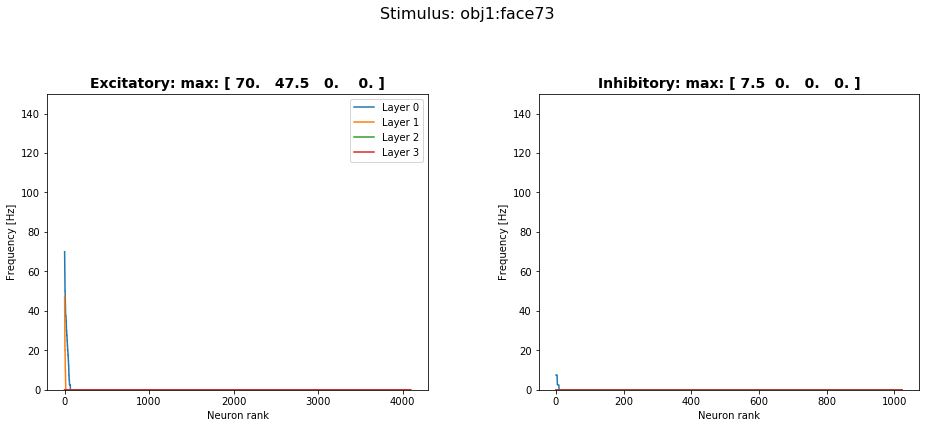

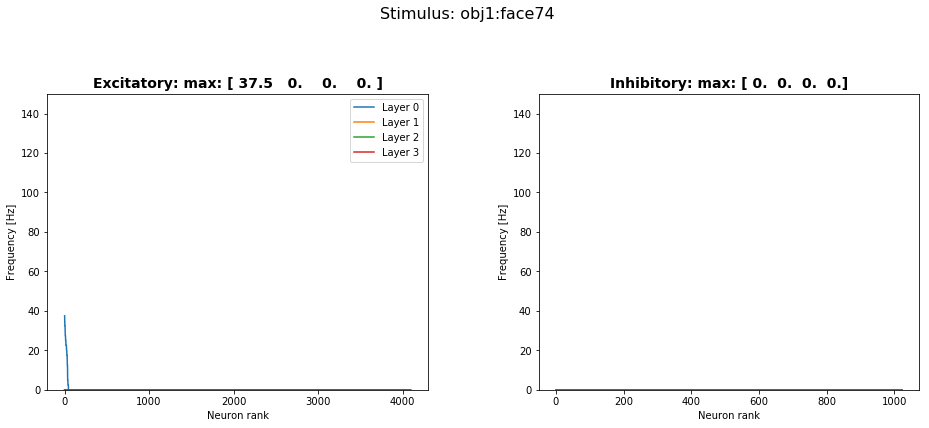

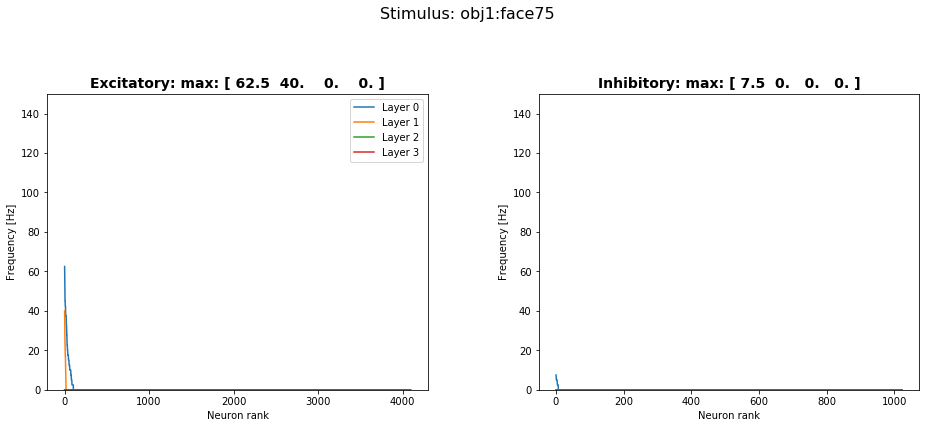

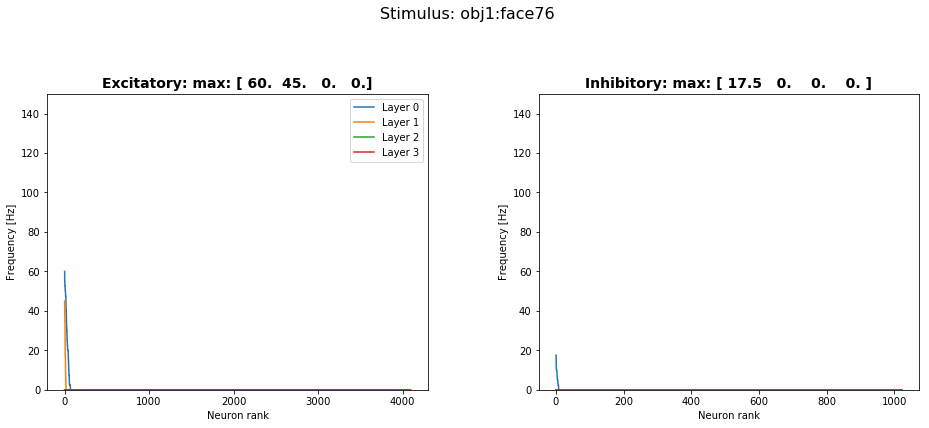

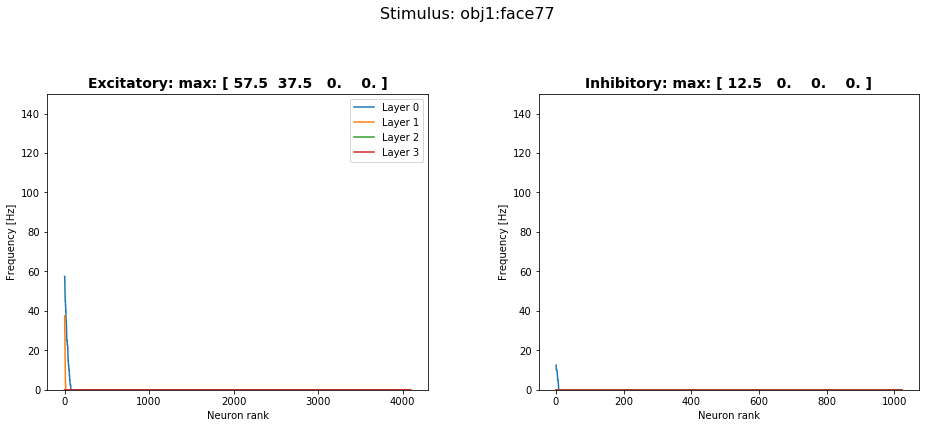

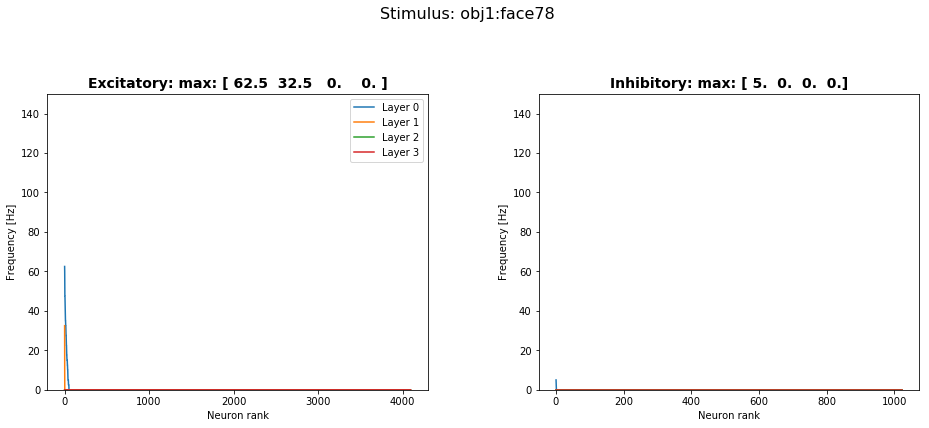

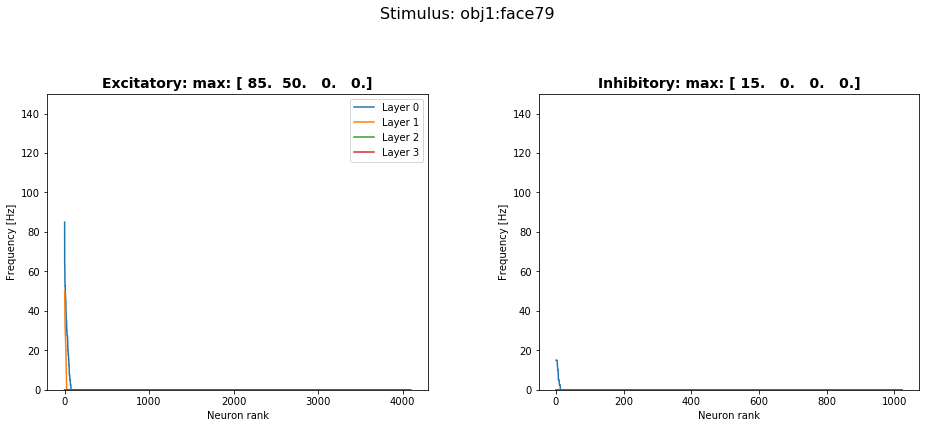

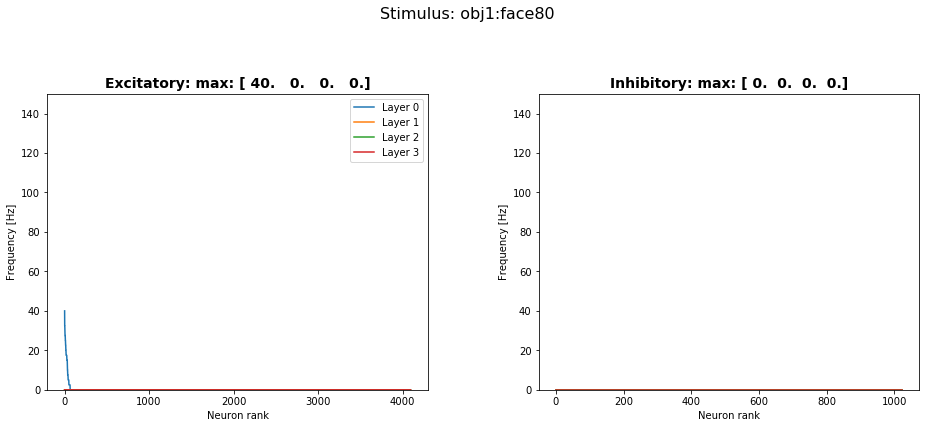

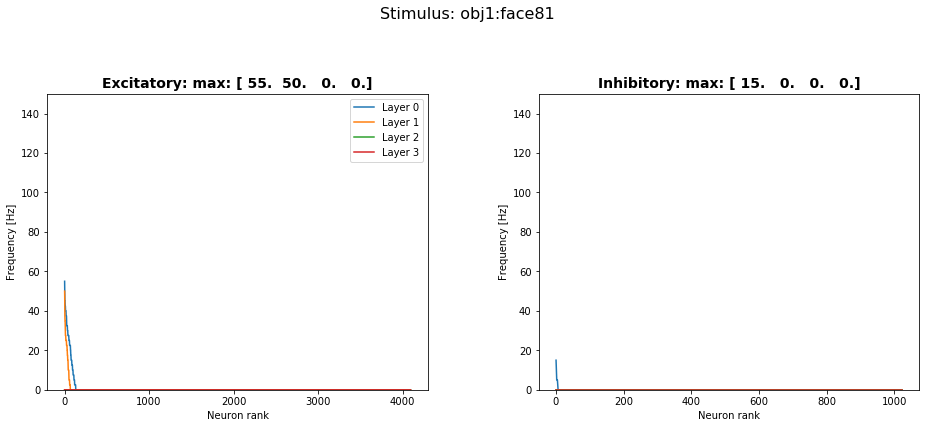

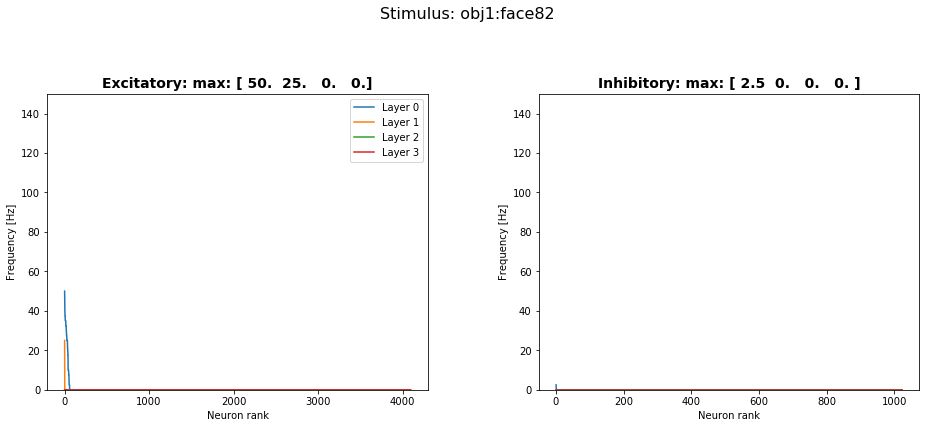

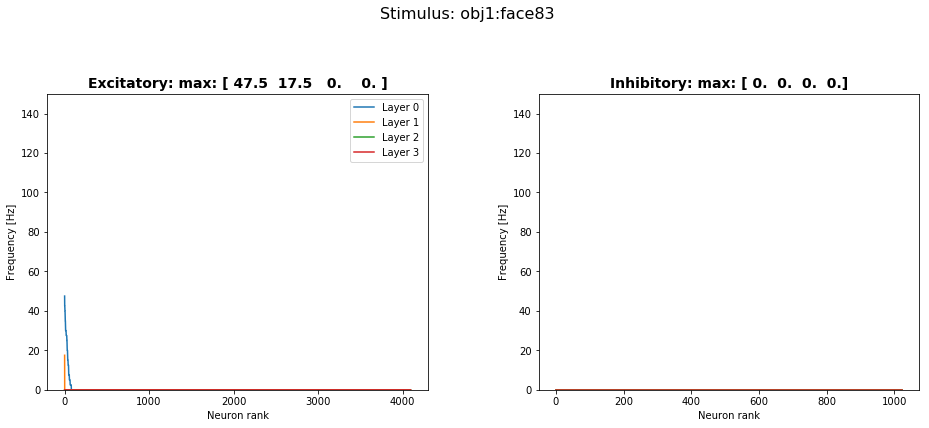

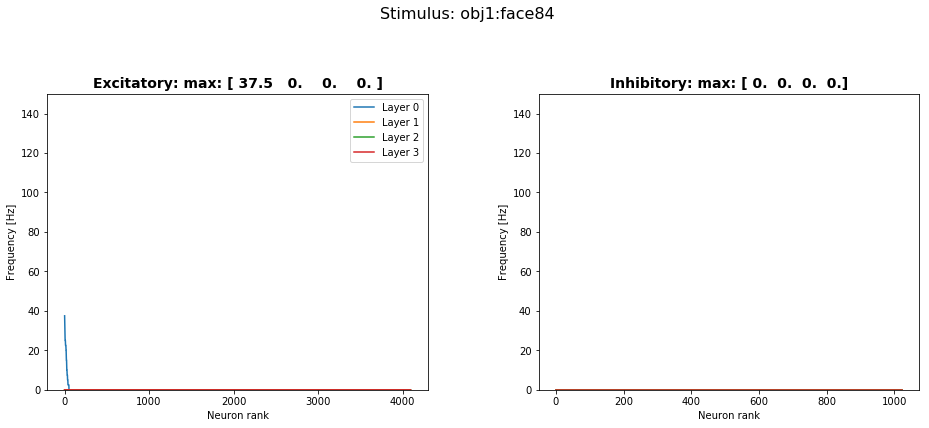

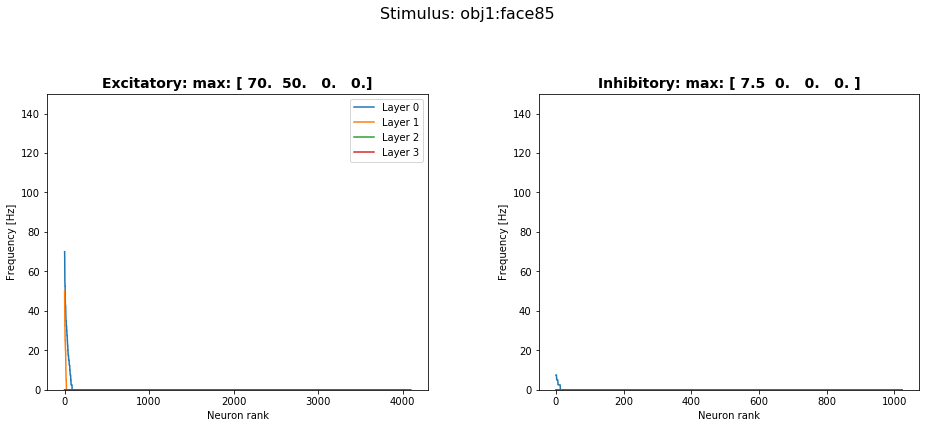

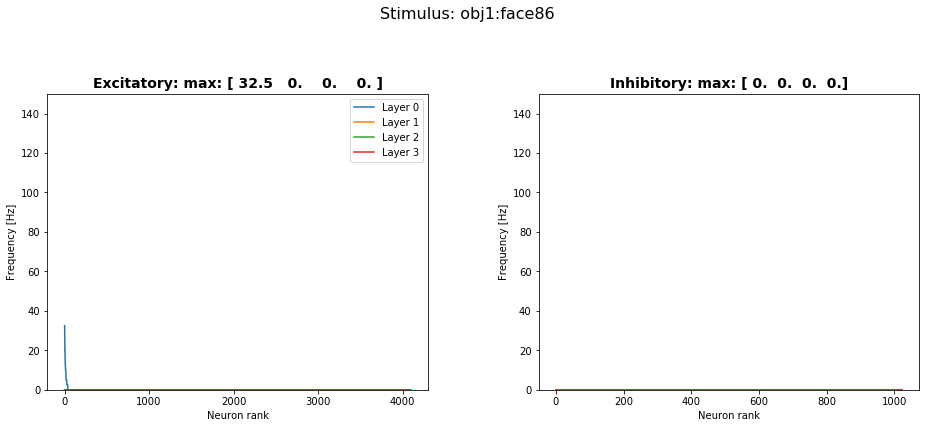

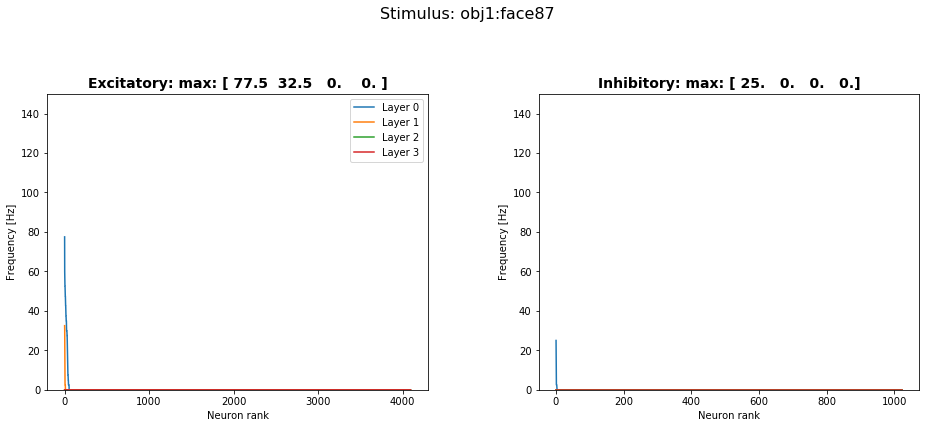

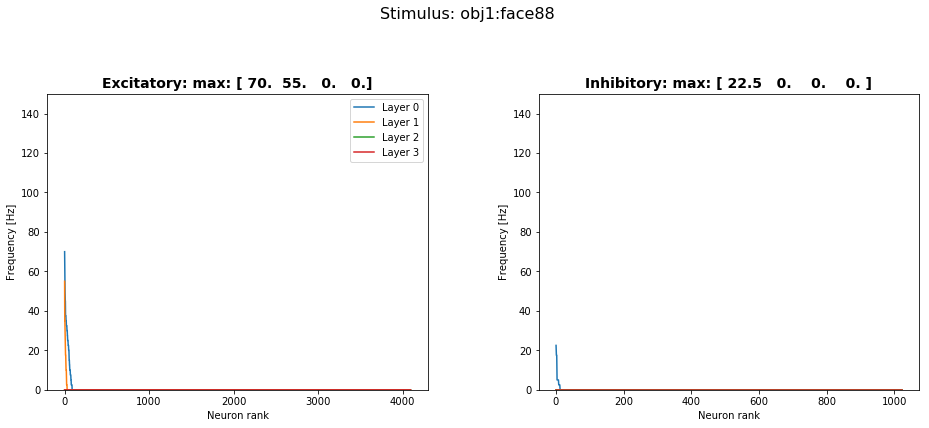

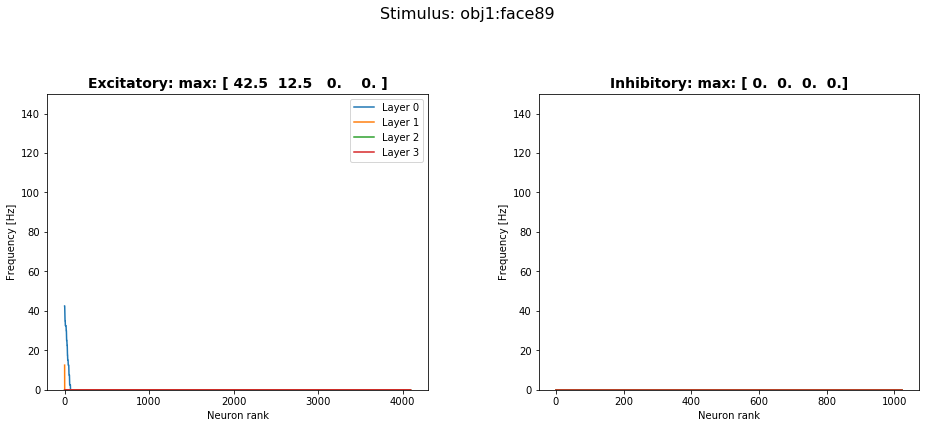

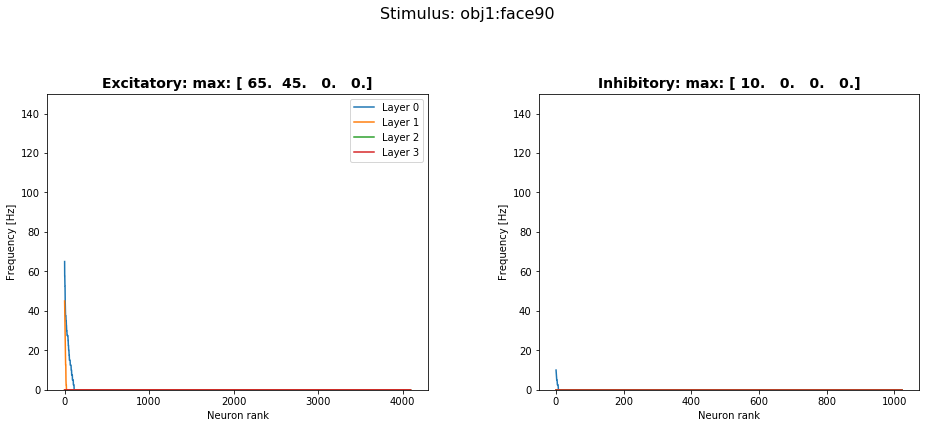

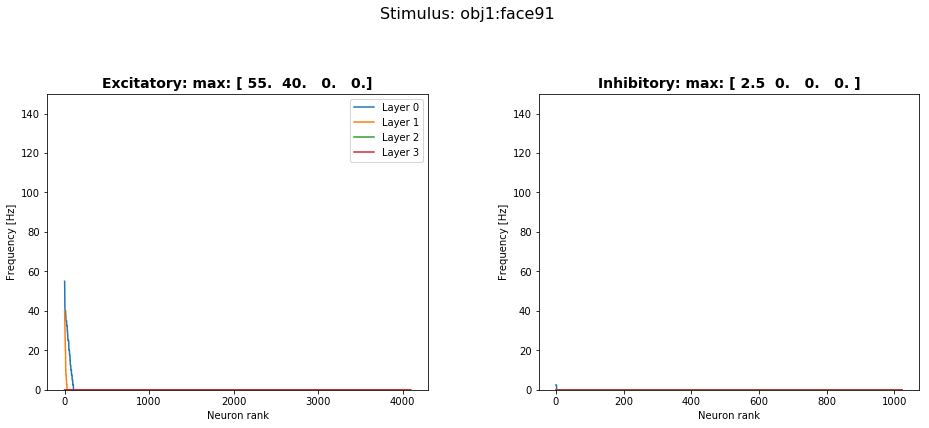

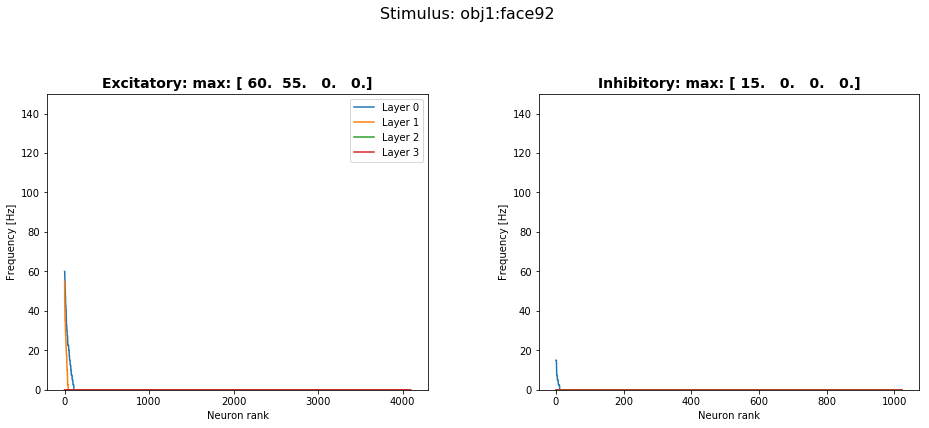

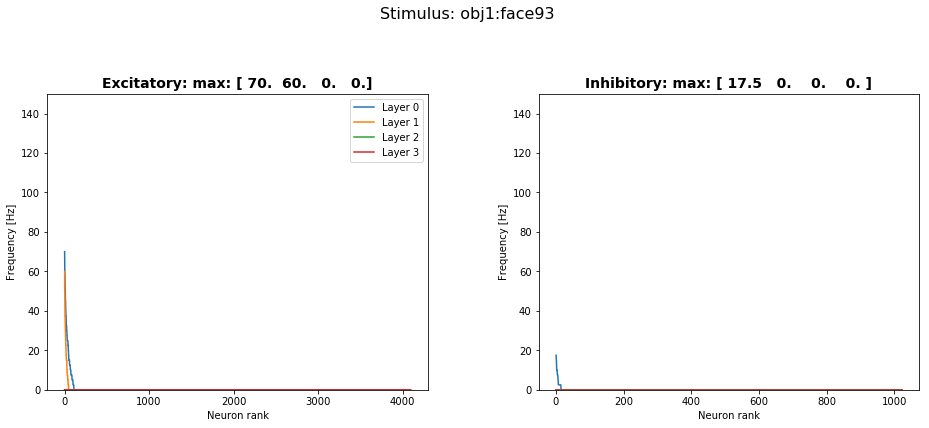

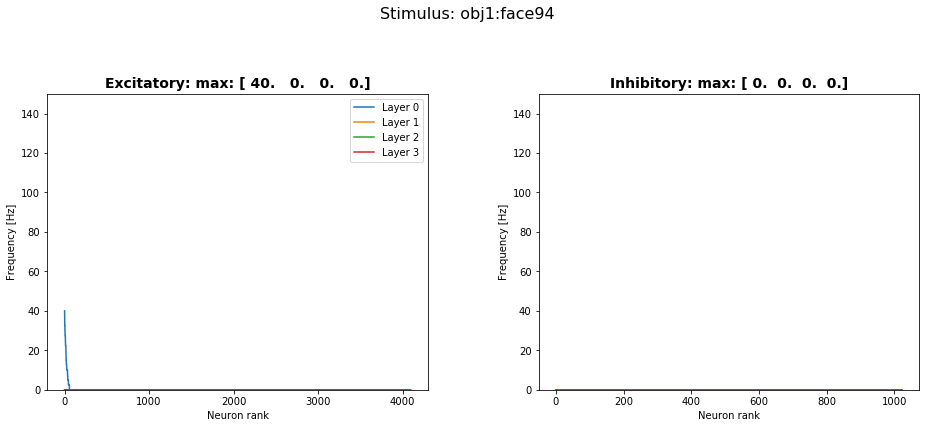

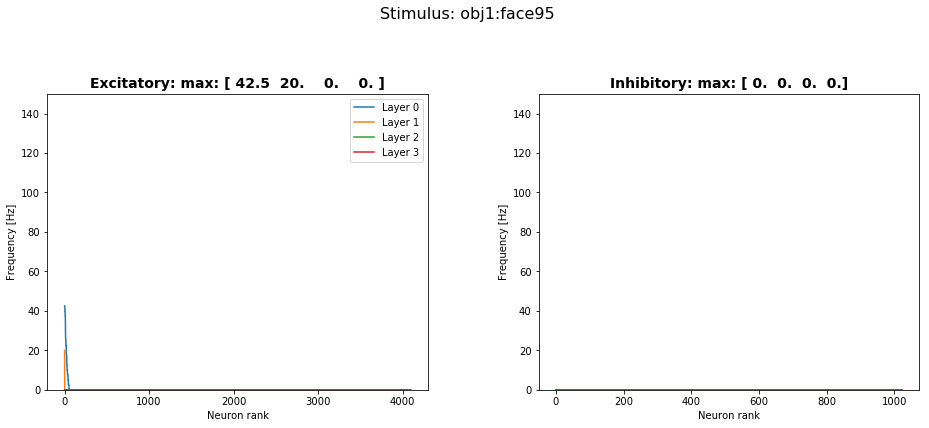

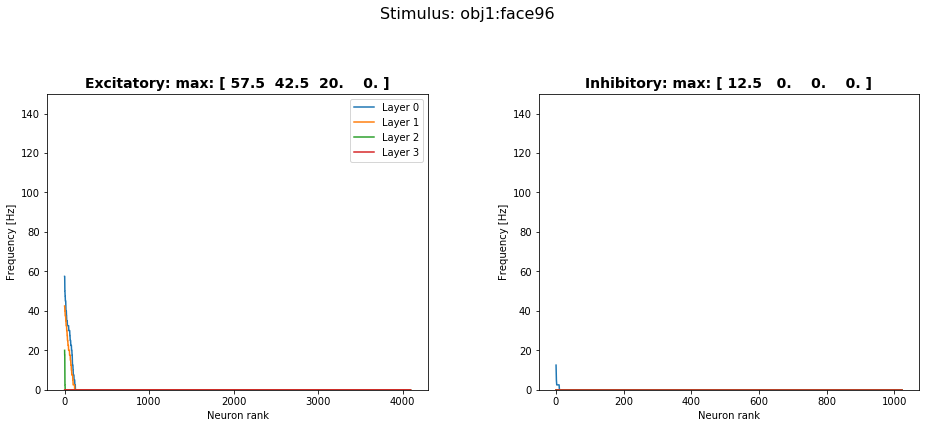

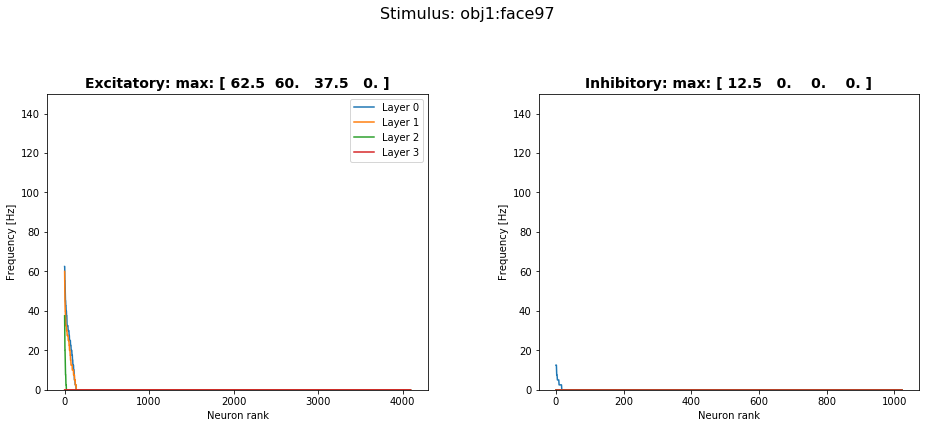

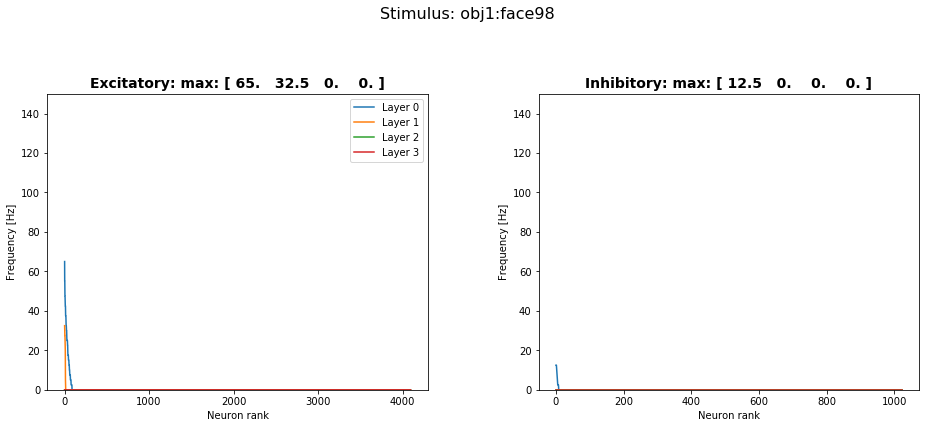

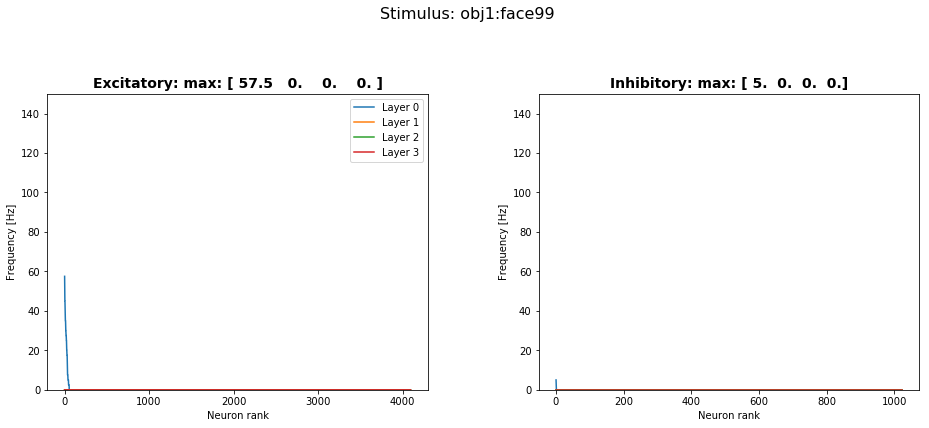

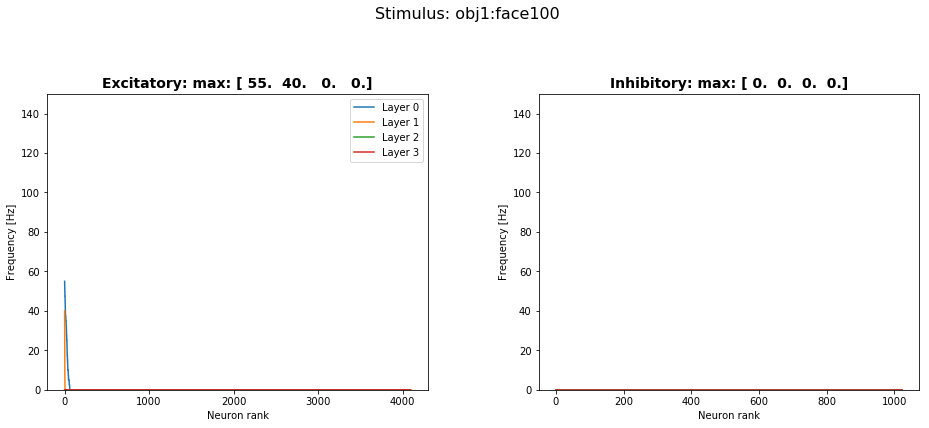

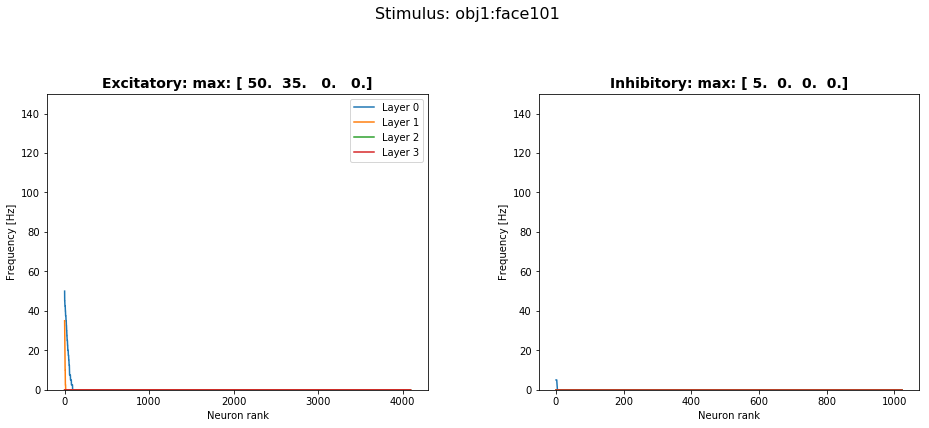

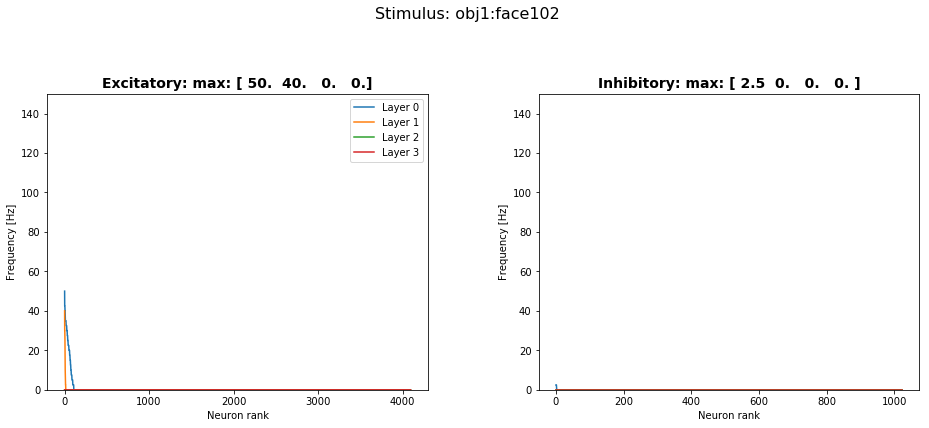

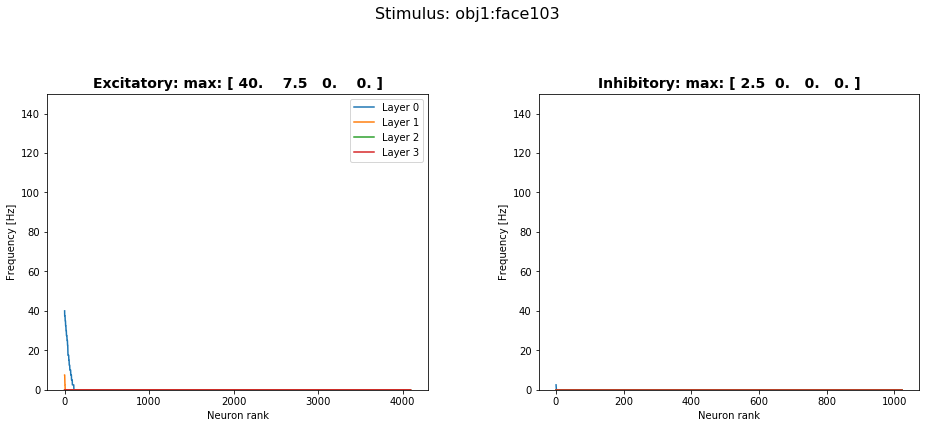

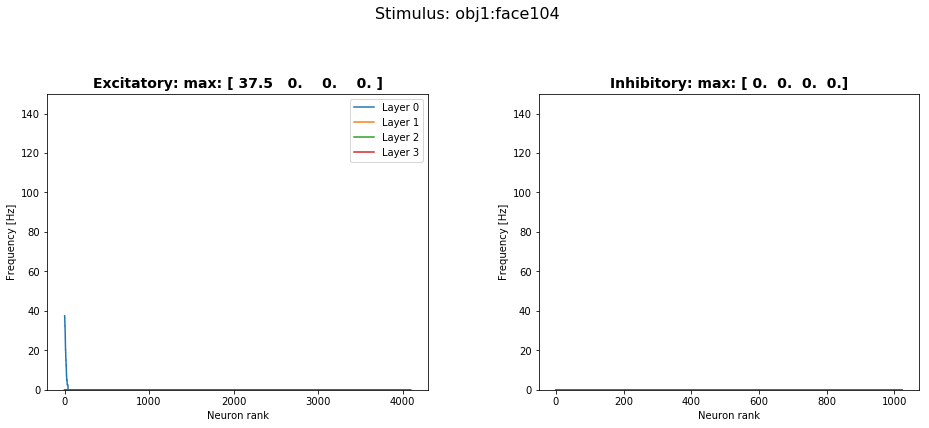

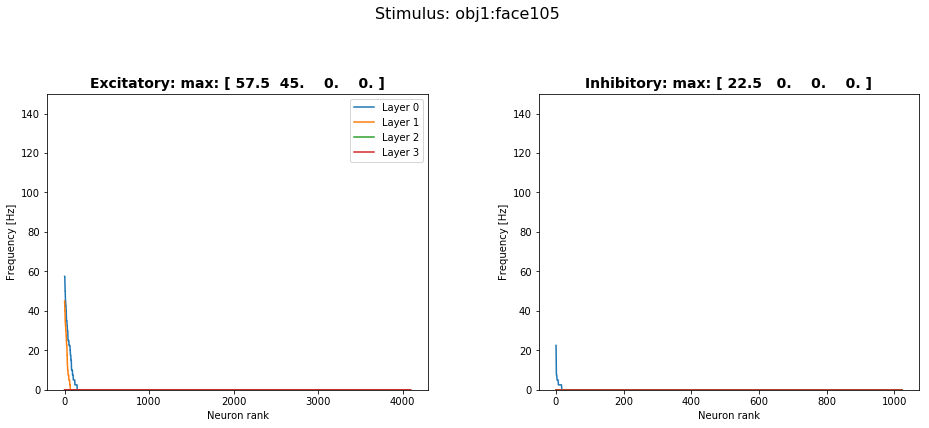

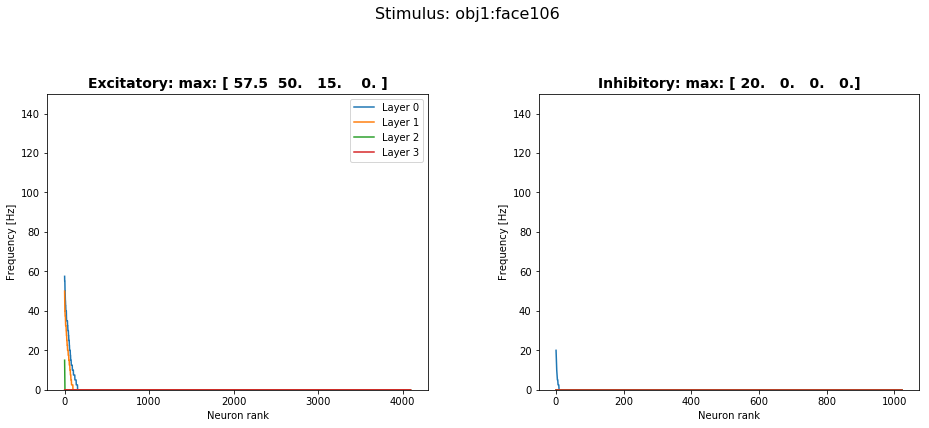

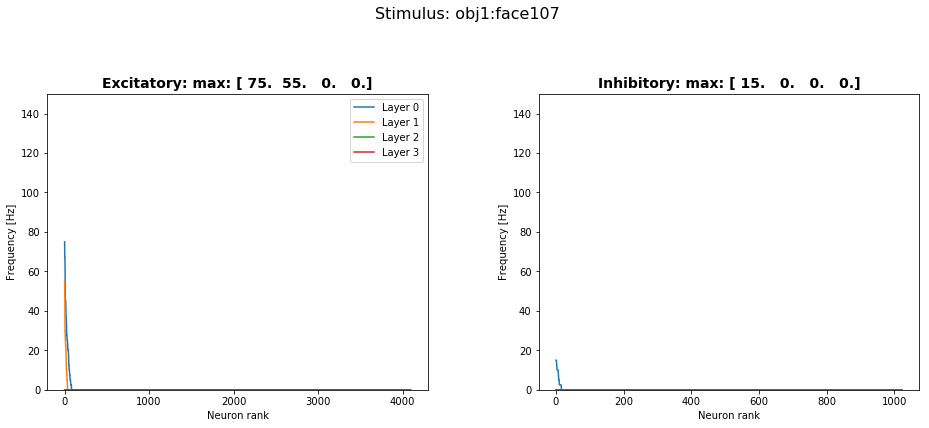

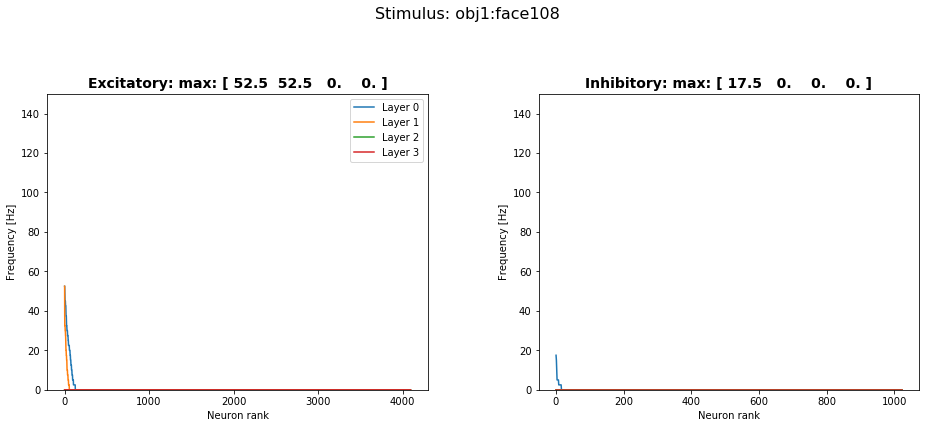

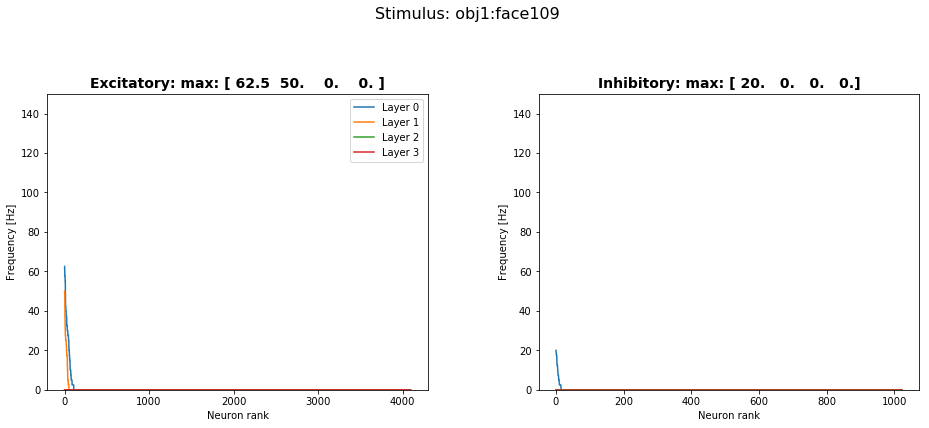

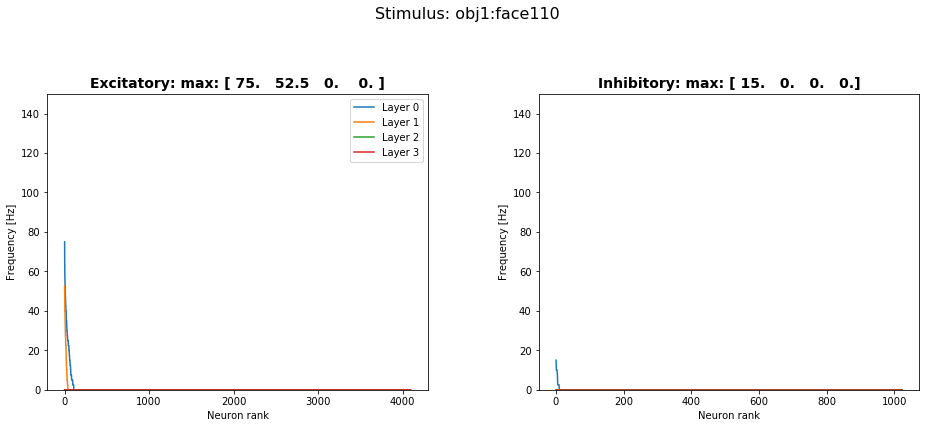

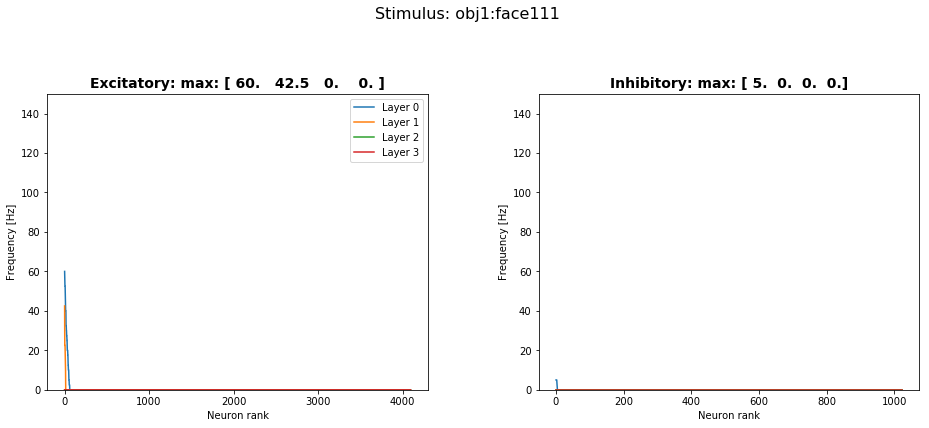

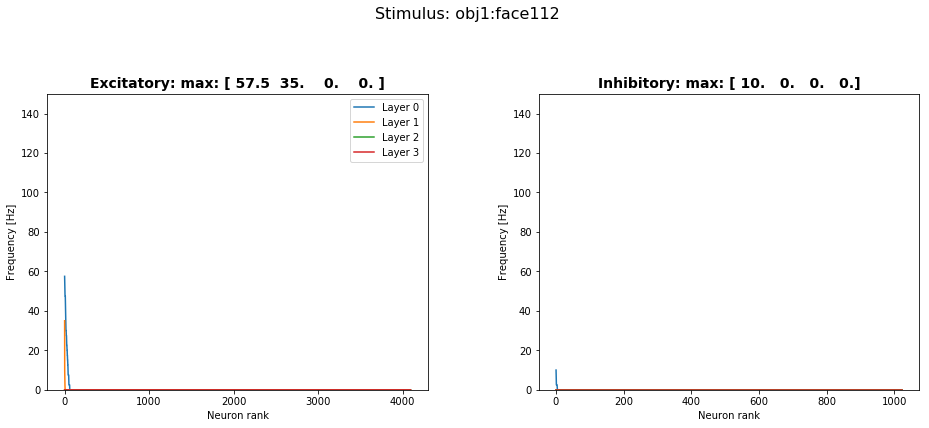

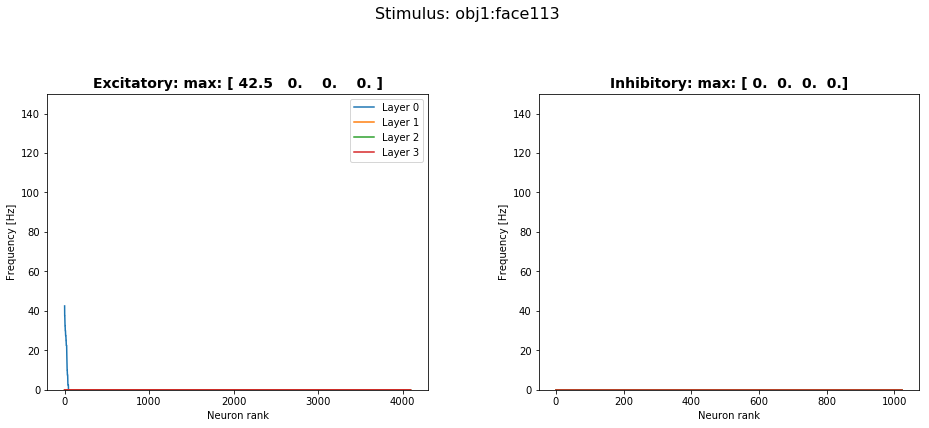

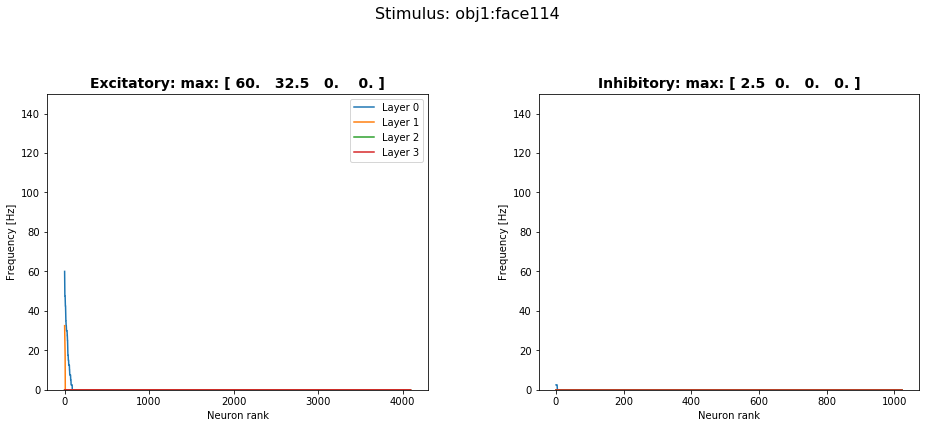

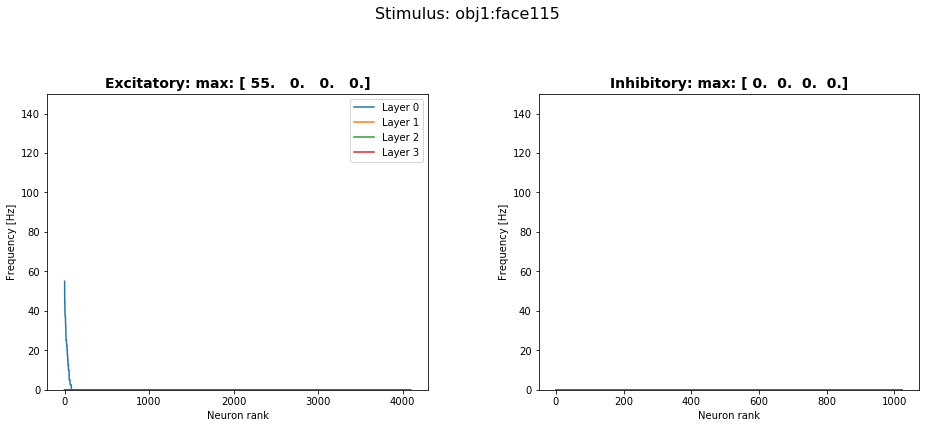

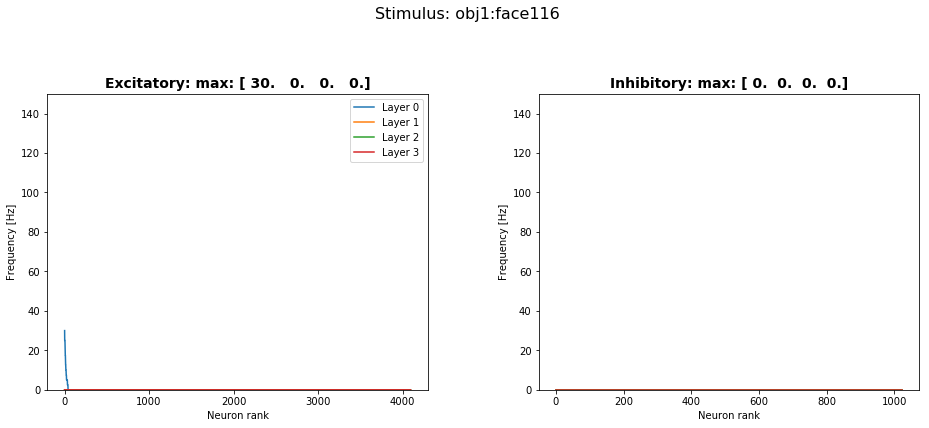

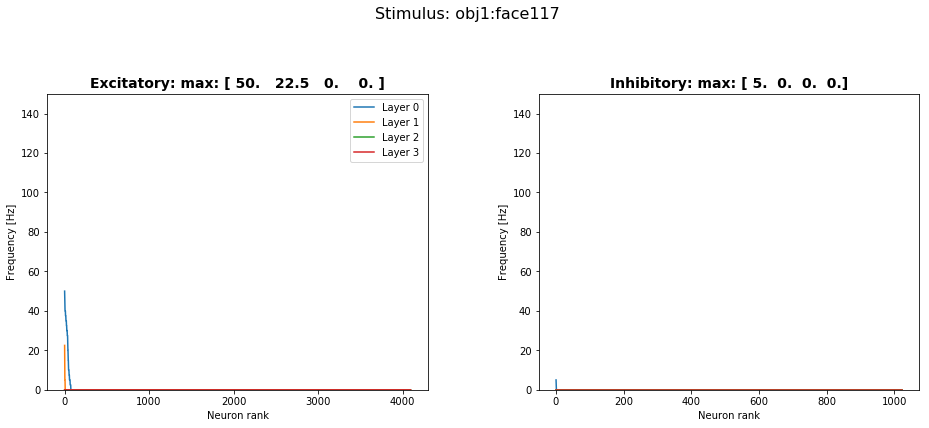

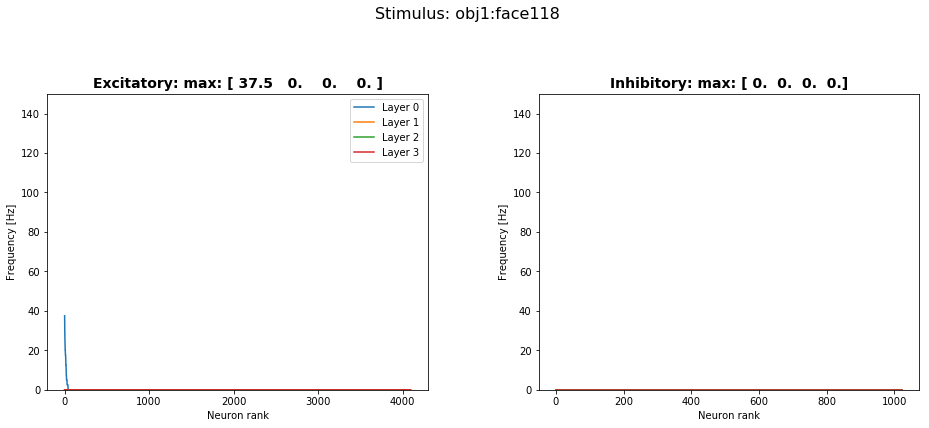

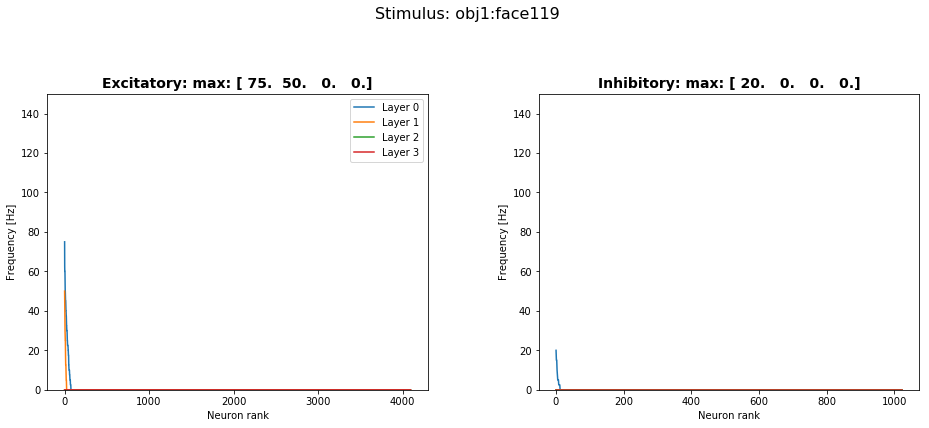

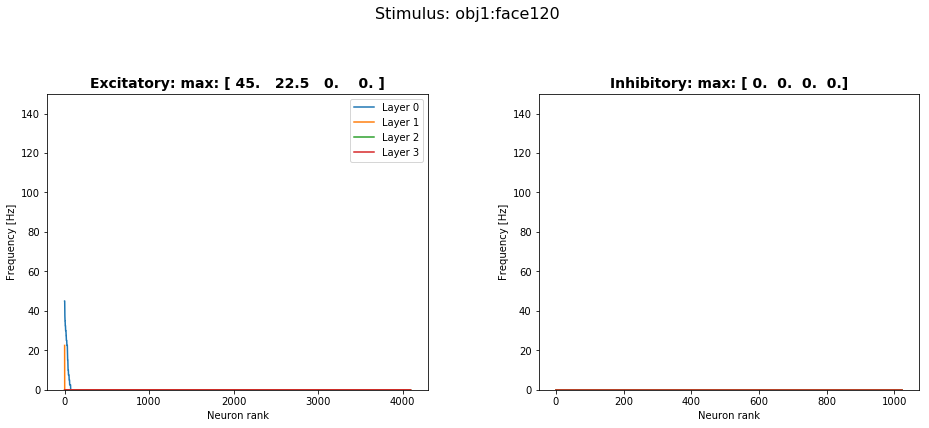

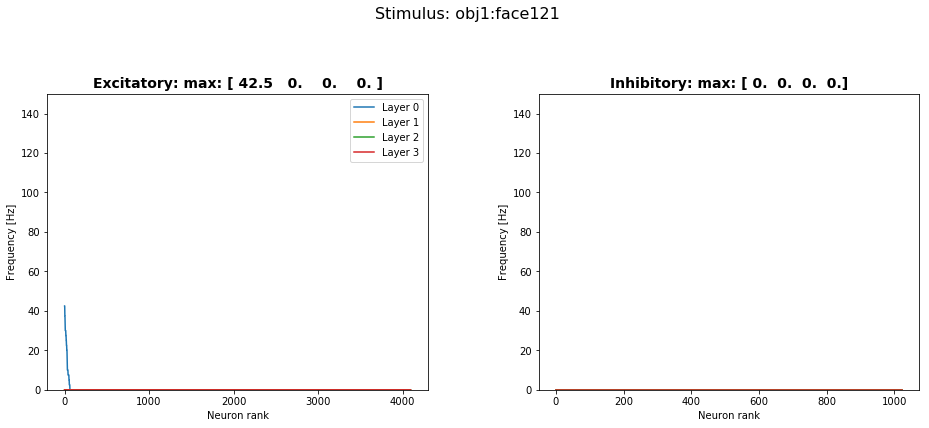

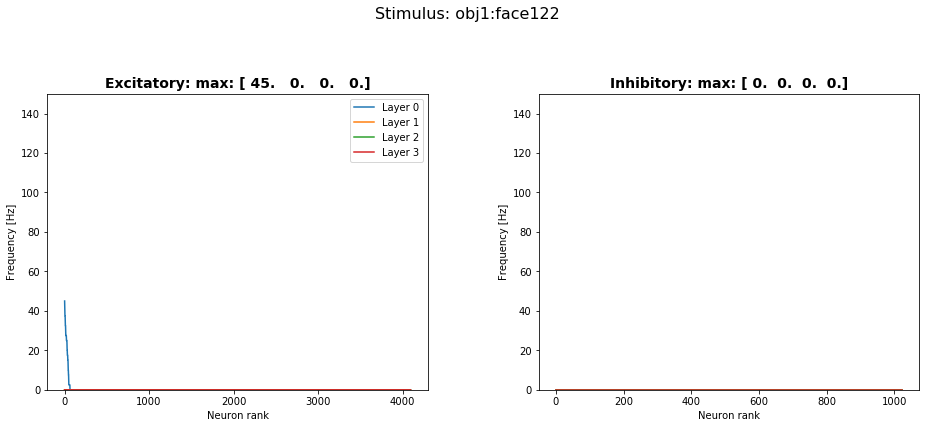

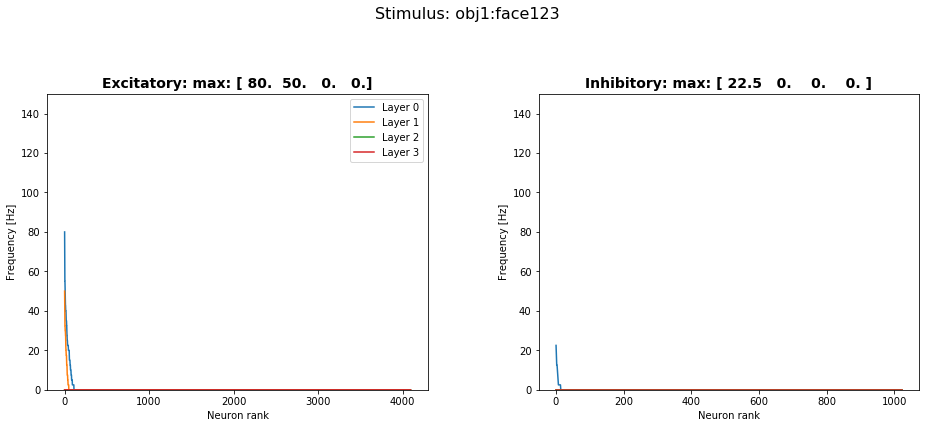

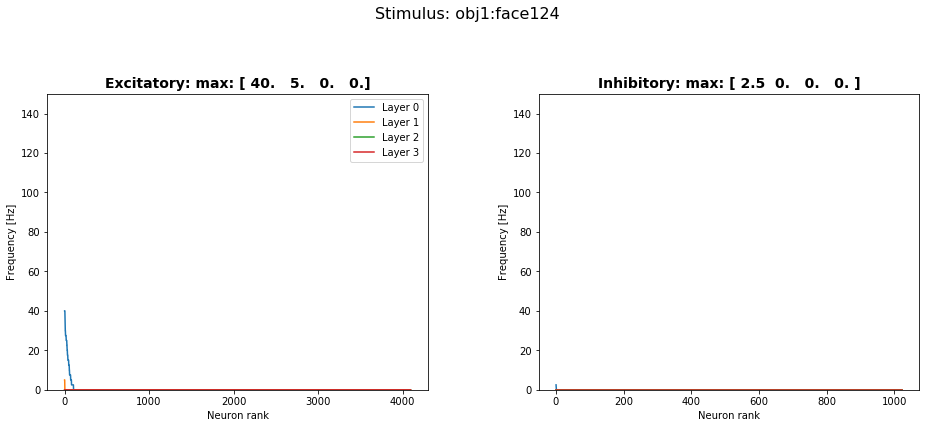

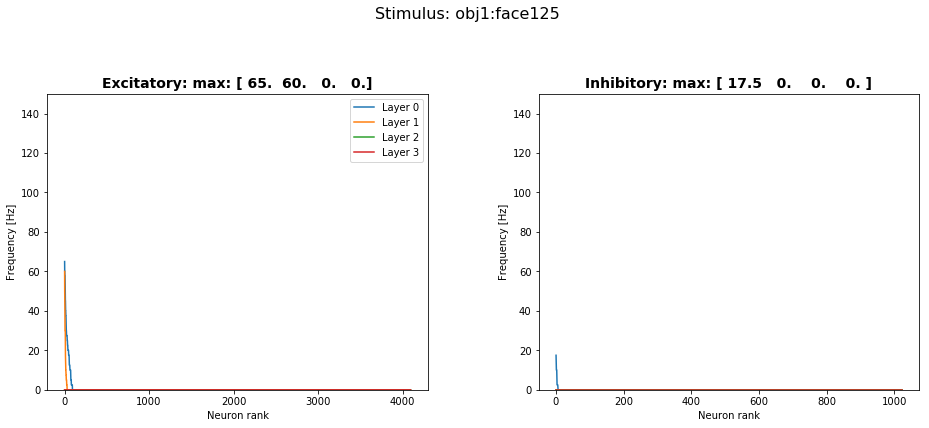

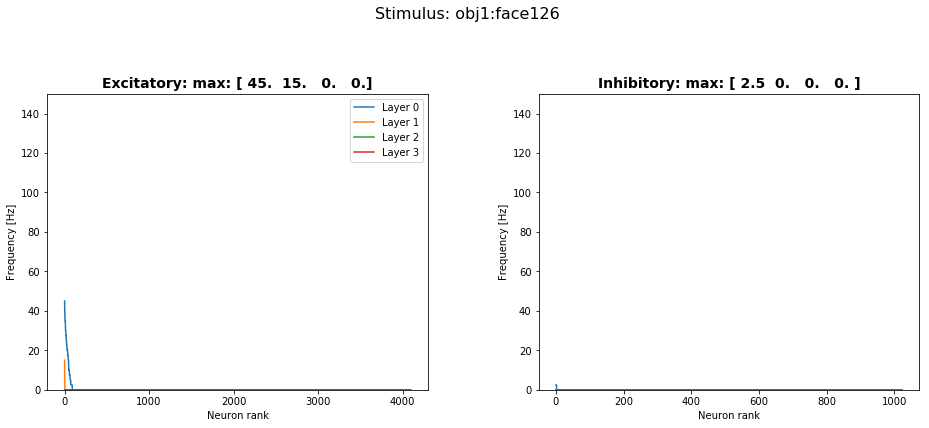

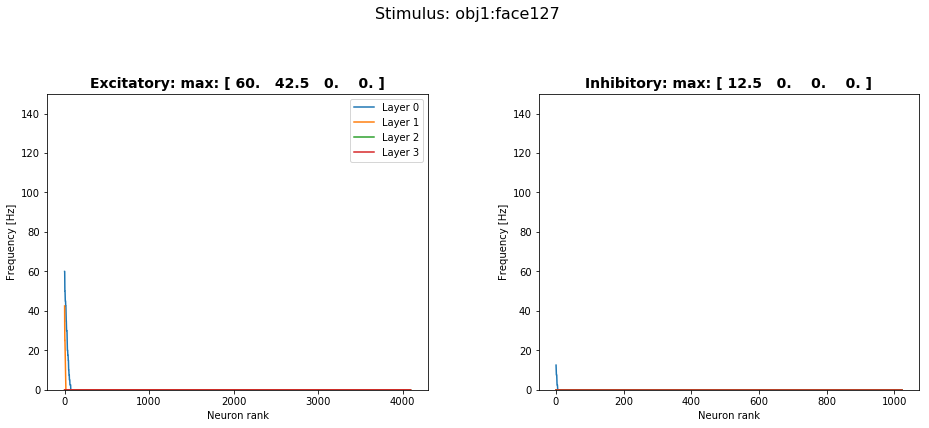

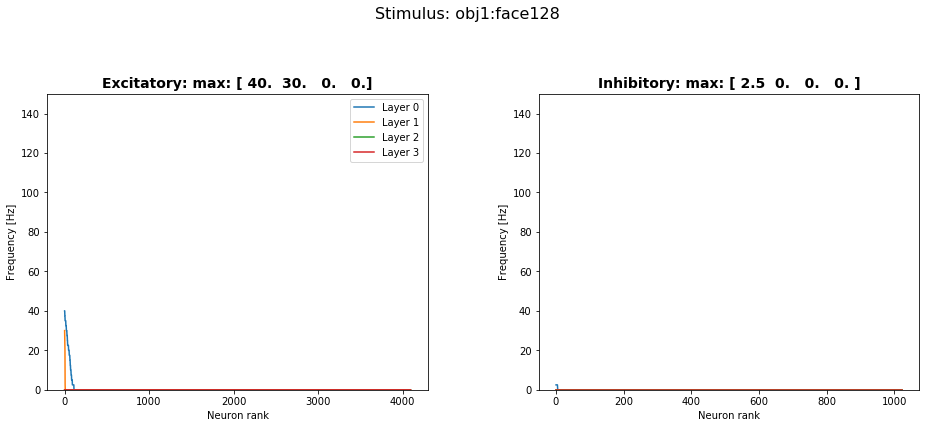

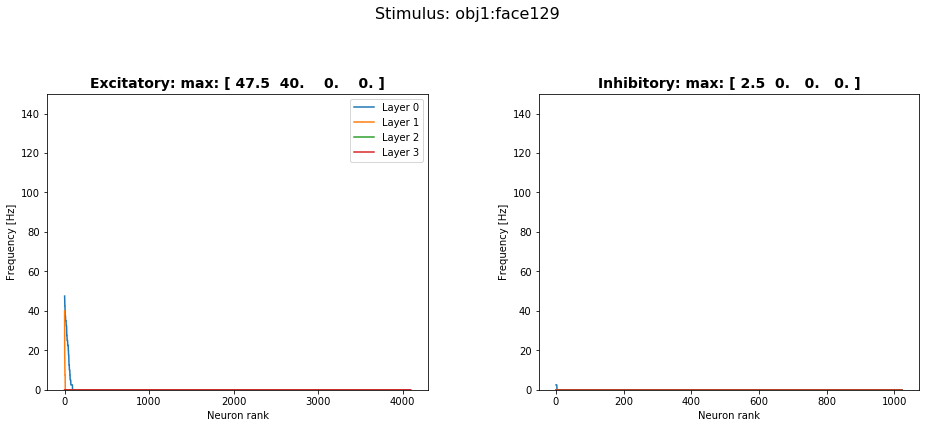

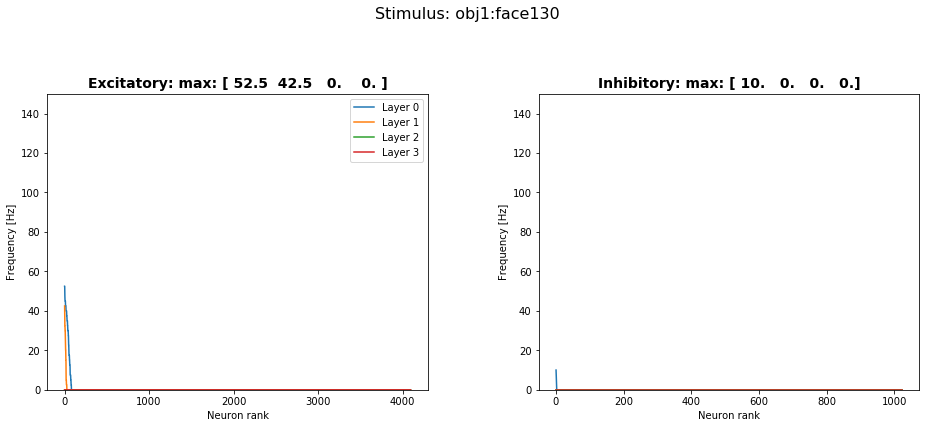

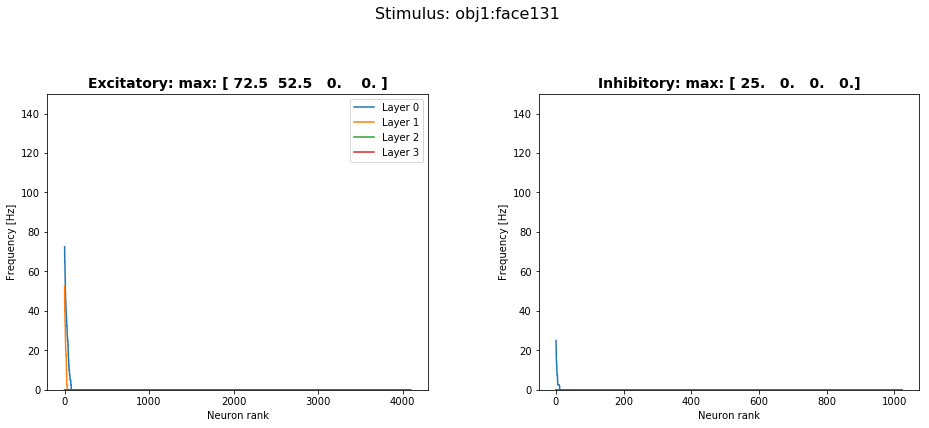

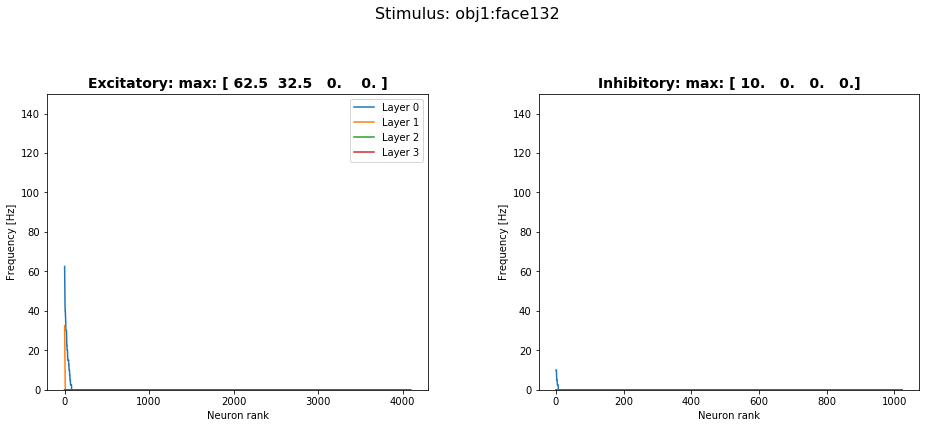

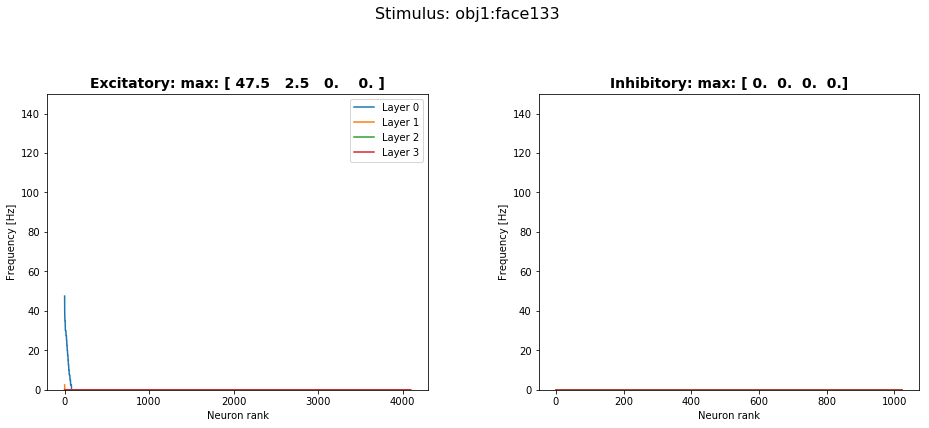

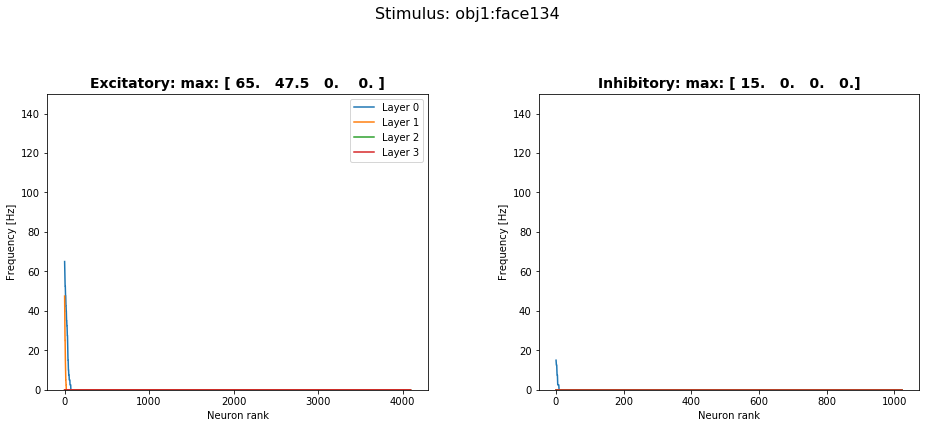

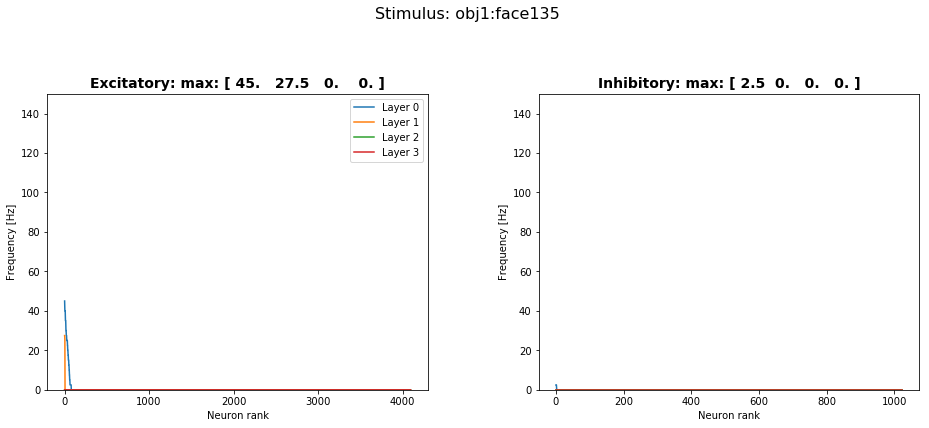

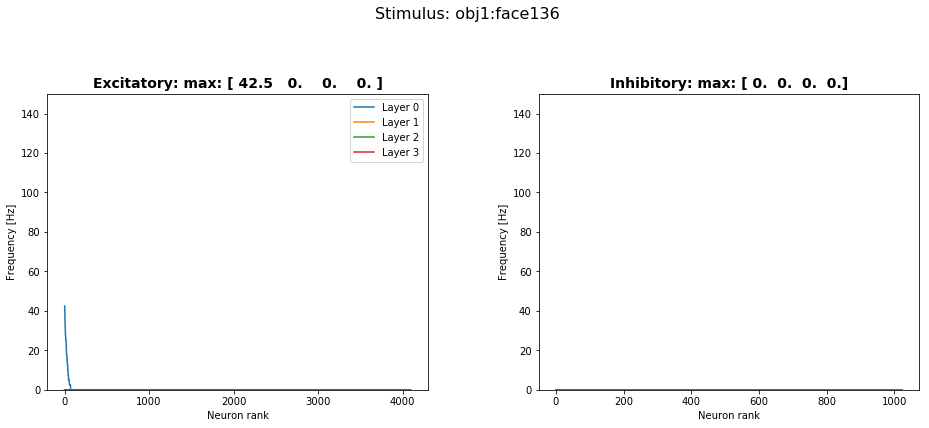

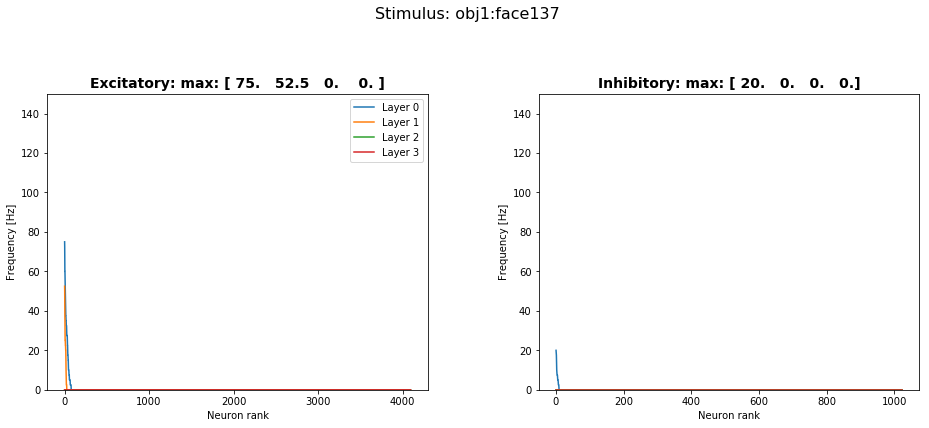

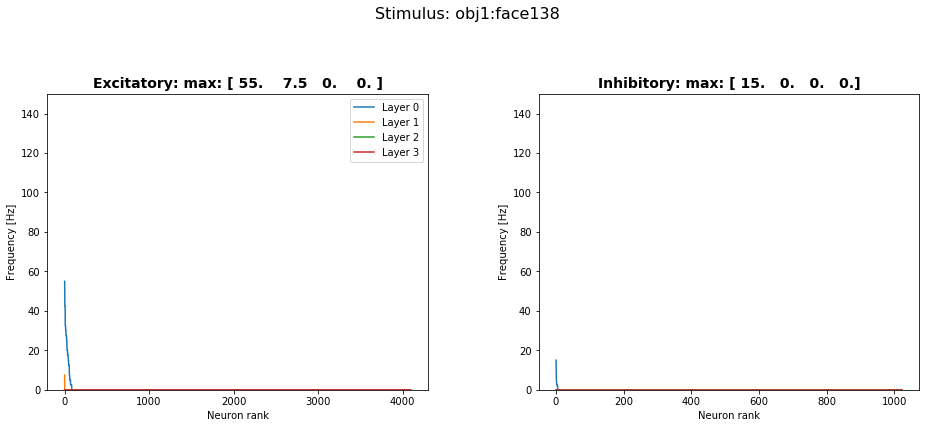

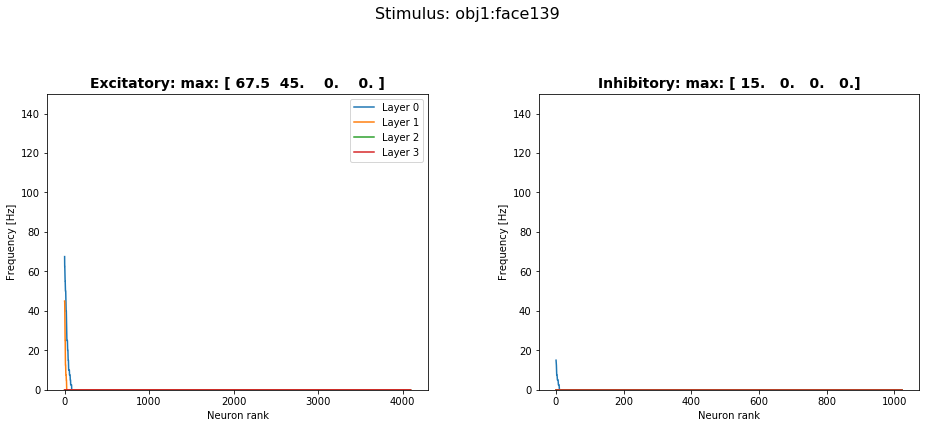

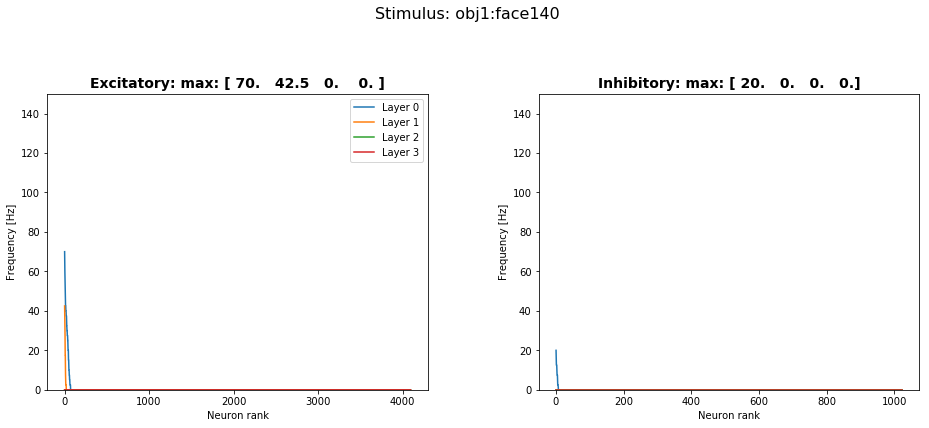

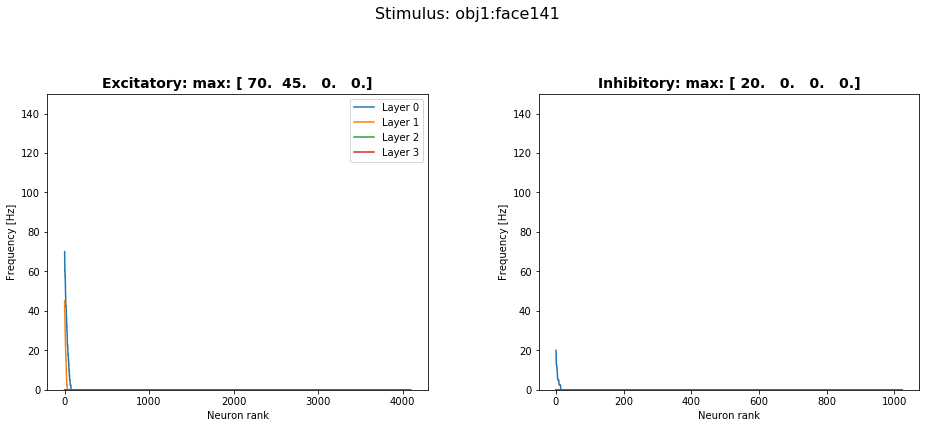

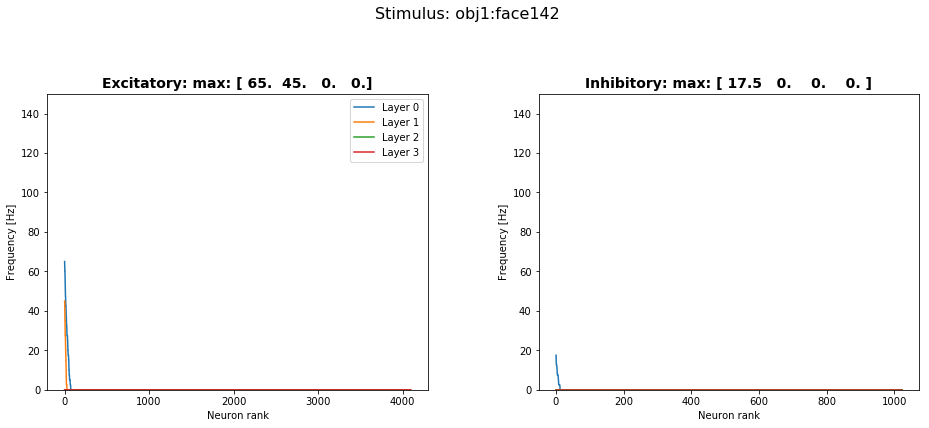

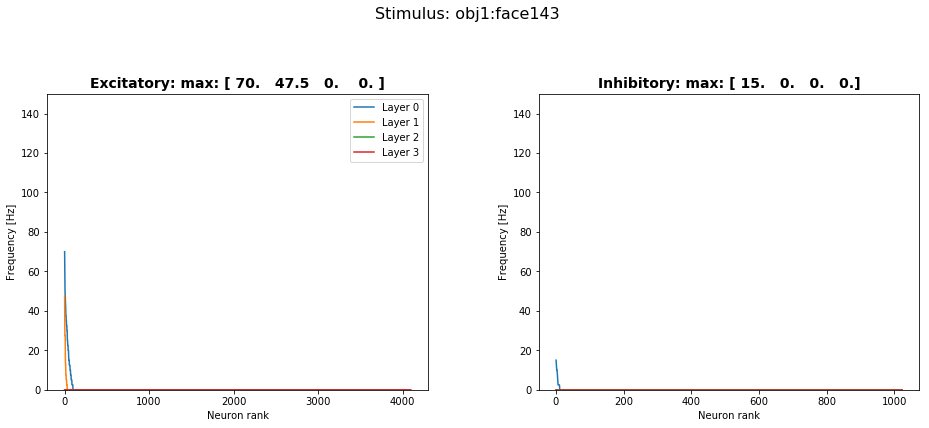

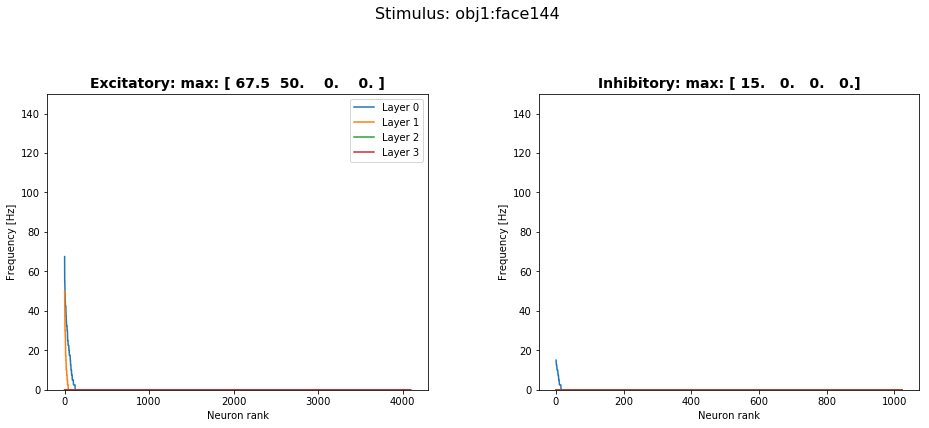

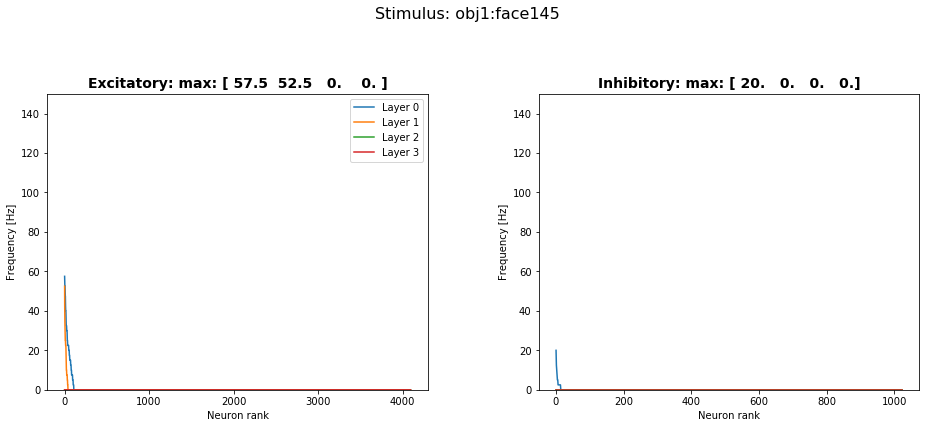

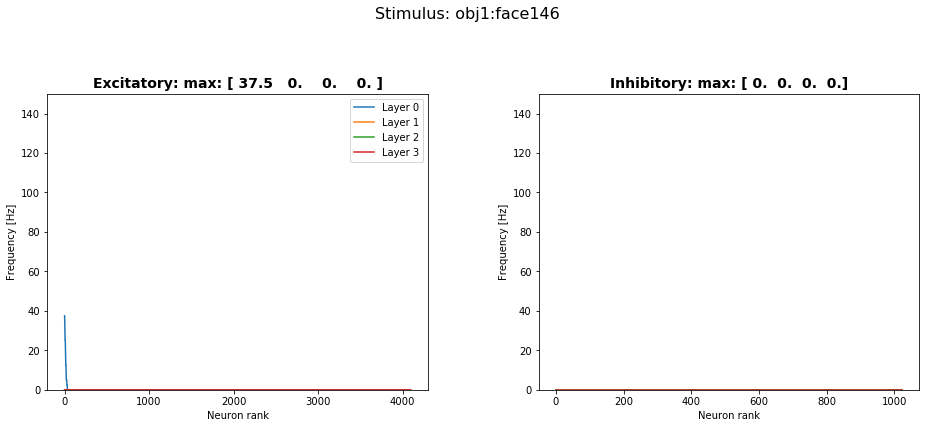

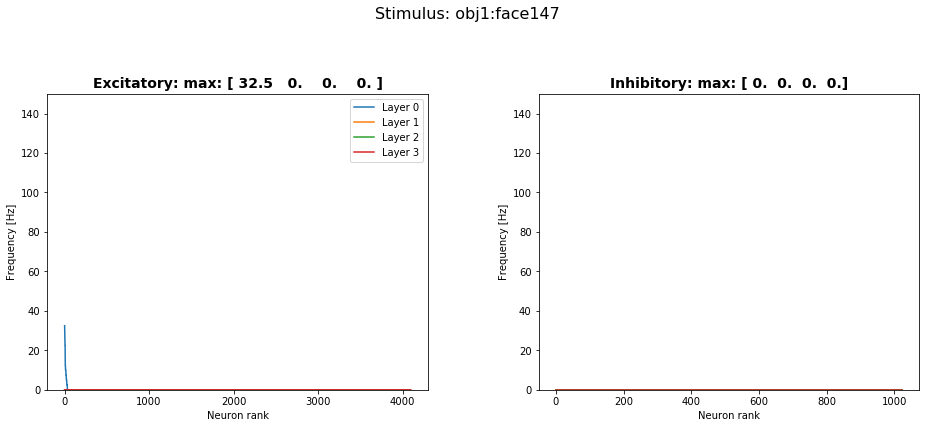

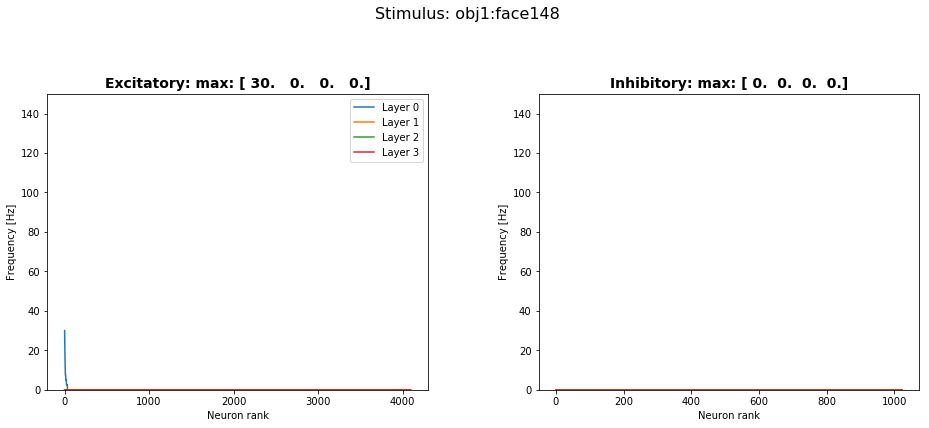

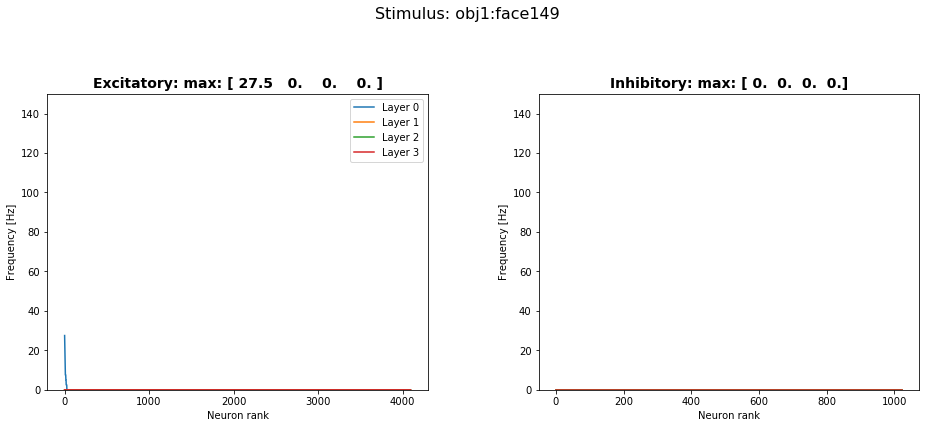

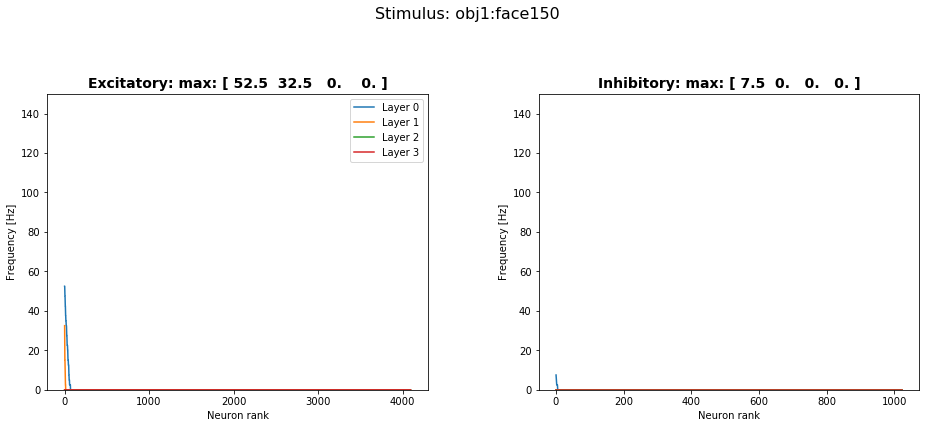

In [6]:
for i in range(len(extensions)):
    print(extensions[i])
    spikeplot.plot_fr_ranked(rates_subfolders[0][i], stimuli_names, percentage_to_plot=1)

spikeplot.plot_fr_histogram(rates_subfolders[0][0], stimuli_names, n_bins=50)

# Spatial Distribution

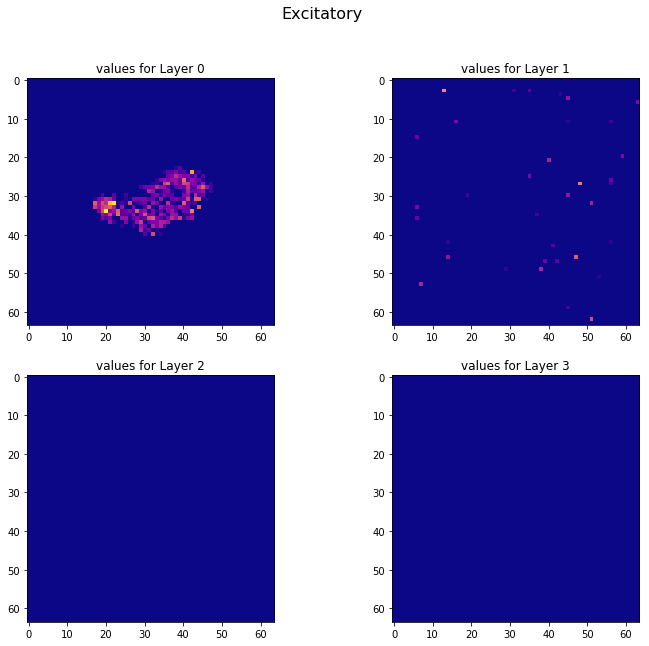

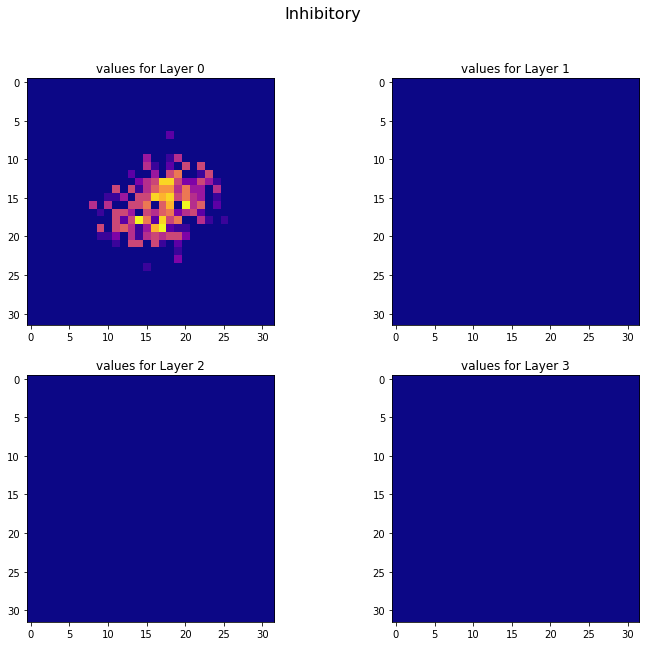

In [7]:
exc_rates, inh_rates = helper.nested_list_of_stimuli_2_np(rates_subfolders[0][0])

stim = 39

spikeplot.show_values_all_things(exc_rates[stim], "Excitatory")
spikeplot.show_values_all_things(inh_rates[stim], "Inhibitory")

## Animation of testing

In [8]:
time_course, exc_insta_fr, inh_insta_fr = firing.instant_FR_for_all_layers(spikes[0][0], network_architecture, 0.1)

In [6]:
exc_insta_fr.shape

(800, 4, 4096)

KeyError: 'ffmpeg'

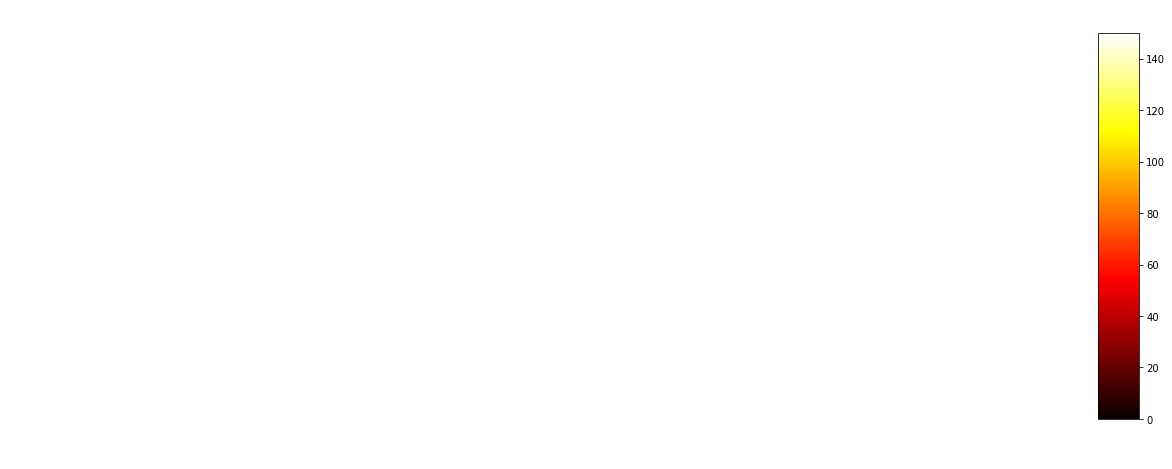

In [7]:
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='html5')

spikeplot.animate_neuron_value_development(exc_insta_fr, inh_insta_fr)